## FLIP ROBO TECHNOLOGIES, BENGALURU
### <b> Evaluation Project 2: Avacado Project </b>
<b><em> By: Satya Jyothi </em></b>

<b><em> Batch:  Internship 34  </em></b>

###  <b> Problem Statement:</b>
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
-	Date - The date of the observation
-	AveragePrice - the average price of a single avocado
-	type - conventional or organic
-	year - the year
-	Region - the city or region of the observation
-	Total Volume - Total number of avocados sold
-	4046 - Total number of avocados with PLU 4046 sold
-	4225 - Total number of avocados with PLU 4225 sold
-	4770 - Total number of avocados with PLU 4770 sold

#### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file.

### <U>Dataset Link<U>
-	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file
df=pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 18249
No. of Columns : 14


In [4]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

float64    9
object     3
int64      2
dtype: int64

#### Observations: ####
- **No. of int datatypes: 2**
- **No. of object datatypes: 3**
- **No. of float datatypes: 9**

In [5]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'year'], float64: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], object: ['Date', 'type', 'region']}

#### Observations: ####
- **There are int, float and object data types available in the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


#### Comment :
- **13 features are there in the data**
- **Unnamed: 0 column is not required hence it can be dropped**
- **"Date" data type is "object" which needs to be changed to datetime datatype**
- **"Region" and "type" has "object" data types**
- **Other variable are float & int datatypes**

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True) # Dropping column "Unnamed: 0" as it has no significance 

In [8]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [9]:
df['Date'].dtype

dtype('<M8[ns]')

In [10]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [11]:
# Sorting the columns based on the updated datatype
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['Date'], int64: ['year'], float64: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], object: ['type', 'region']}

# Data Integrity Check

### Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

In [12]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

#### Observations:
- **No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe**

### Duplicate Values Check

In [13]:
df.duplicated().sum()

0

In [14]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

#### Observations: 
- **No duplicate values present in the dataframe**

### Start with Enlisting Value counts & Sub-categories of different categorial features available
- **This is done to understand further different categories and to find any non-interpretable categories**

In [15]:
df_categorical=['type', 'region']

for i in df_categorical:
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    print('\033[1m'+i,'"Values Count"'+'\033[0m')
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts())[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*100)

type "Values Count"


Value  Count  % Count
0  conventional   9126     50.0
1       organic   9123     50.0

region "Values Count"


Value  Count  % Count
0                Albany    338      1.9
1            Sacramento    338      1.9
2             Northeast    338      1.9
3    NorthernNewEngland    338      1.9
4               Orlando    338      1.9
5          Philadelphia    338      1.9
6         PhoenixTucson    338      1.9
7            Pittsburgh    338      1.9
8                Plains    338      1.9
9              Portland    338      1.9
10    RaleighGreensboro    338      1.9
11      RichmondNorfolk    338      1.9
12              Roanoke    338      1.9
13             SanDiego    338      1.9
14              Atlanta    338      1.9
15         SanFrancisco    338      1.9
16              Seattle    338      1.9
17        SouthCarolina    338      1.9
18         SouthCentral    338      1.9
19            Southeast    338      1.9
20              Spokane    338      1.9
21              StLouis    338      1.9
22             Syracuse    338      1.9
23                Tampa    338      1.9
24              TotalUS    338      1.9
25                 West    338      1.9
26              NewYork    338      1.9
27     NewOrleansMobile    338      1.9
28            Nashville    338      1.9
29             Midsouth    338      1.9
30  BaltimoreWashington    338      1.9
31                Boise    338      1.9
32               Boston    338      1.9
33     BuffaloRochester    338      1.9
34           California    338      1.9
35            Charlotte    338      1.9
36              Chicago    338      1.9
37     CincinnatiDayton    338      1.9
38             Columbus    338      1.9
39        DallasFtWorth    338      1.9
40               Denver    338      1.9
41              Detroit    338      1.9
42          GrandRapids    338      1.9
43           GreatLakes    338      1.9
44   HarrisburgScranton    338      1.9
45  HartfordSpringfield    338      1.9
46              Houston    338      1.9
47         Indianapolis    338      1.9
48         Jacksonville    338      1.9
49             LasVegas    338      1.9
50           LosAngeles    338      1.9
51           Louisville    338      1.9
52    MiamiFtLauderdale    338      1.9
53     WestTexNewMexico    335      1.8

#### Observation:
- **There are two types of fruits and 53 countries in the dataset**

### Null Values Check

In [16]:
df.isnull().sum().sum() # Checking the sum of null values for all columns

0

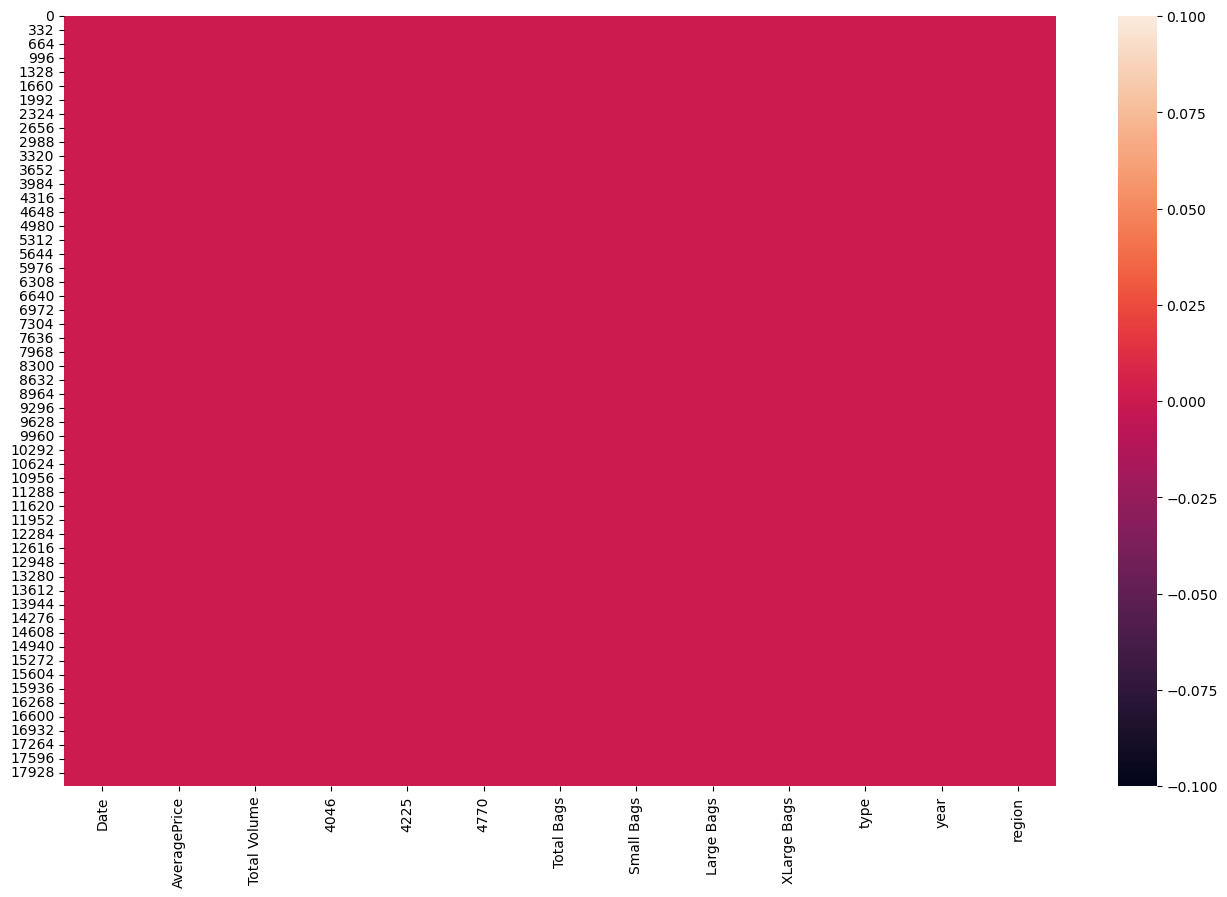

In [17]:
# Heatmap plot with null values
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [18]:
#Finding the percentage of data missing from the dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
null_values=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null=null_values.sort_values(by=["% Missing data"],ascending=False)
df_null=df_null.reset_index(drop=False)
df_null

Missing Values


index       Data Type  Missing Values  % Missing data
0           Date  datetime64[ns]               0             0.0
1   AveragePrice         float64               0             0.0
2   Total Volume         float64               0             0.0
3           4046         float64               0             0.0
4           4225         float64               0             0.0
5           4770         float64               0             0.0
6     Total Bags         float64               0             0.0
7     Small Bags         float64               0             0.0
8     Large Bags         float64               0             0.0
9    XLarge Bags         float64               0             0.0
10          type          object               0             0.0
11          year           int64               0             0.0
12        region          object               0             0.0

#### Observation:
- **There are no missing values in the dataset**

# Segregating columns based on data type for better EDA

In [19]:
df.head(3)

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany

In [20]:
# Splitting the date column into Year,Month and Day for better EDA
df['Year']=df['Date'].dt.year
df['Month']= df['Date'].dt.month
df['Day']= df['Date'].dt.day
df.drop(columns=['year'], inplace=True)  # Dropping existing "year" column as it is duplicate
df.head(3)

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  region  \
0     8696.87     8603.62       93.25          0.0  conventional  Albany   
1     9505.56     9408.07       97.49          0.0  conventional  Albany   
2     8145.35     8042.21      103.14          0.0  conventional  Albany   

   Year  Month  Day  
0  2015     12   27  
1  2015     12   20  
2  2015     12   13

In [21]:
# Converting Datetime datatypes to int
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Day']=df['Day'].astype(int)

In [22]:
df1=df.copy()

In [23]:
# Sorting the columns based on the datatype
df1.columns.to_series().groupby(df1.dtypes).groups

{datetime64[ns]: ['Date'], int32: ['Year', 'Month', 'Day'], float64: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], object: ['type', 'region']}

In [24]:
# Creating Datframe for numeric features
df_numerical=df1.drop(['Date','type','region','Year', 'Month', 'Day'], axis=1)

In [25]:
df_numerical.head(2)

AveragePrice  Total Volume     4046      4225   4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85  48.16     8696.87   
1          1.35      54876.98   674.28  44638.81  58.33     9505.56   

   Small Bags  Large Bags  XLarge Bags  
0     8603.62       93.25          0.0  
1     9408.07       97.49          0.0

In [26]:
# Creating Datframe for categorical features
df_categorical=df1[['type', 'region']].copy()
df_categorical.head(2)

type  region
0  conventional  Albany
1  conventional  Albany

# Statistical Summary

In [27]:
# Statistical summary for numerical data
df_numerical.describe().T

count           mean           std    min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01   0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06  84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06   0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06   0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05   0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05   0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05   0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05   0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04   0.00      0.00   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65

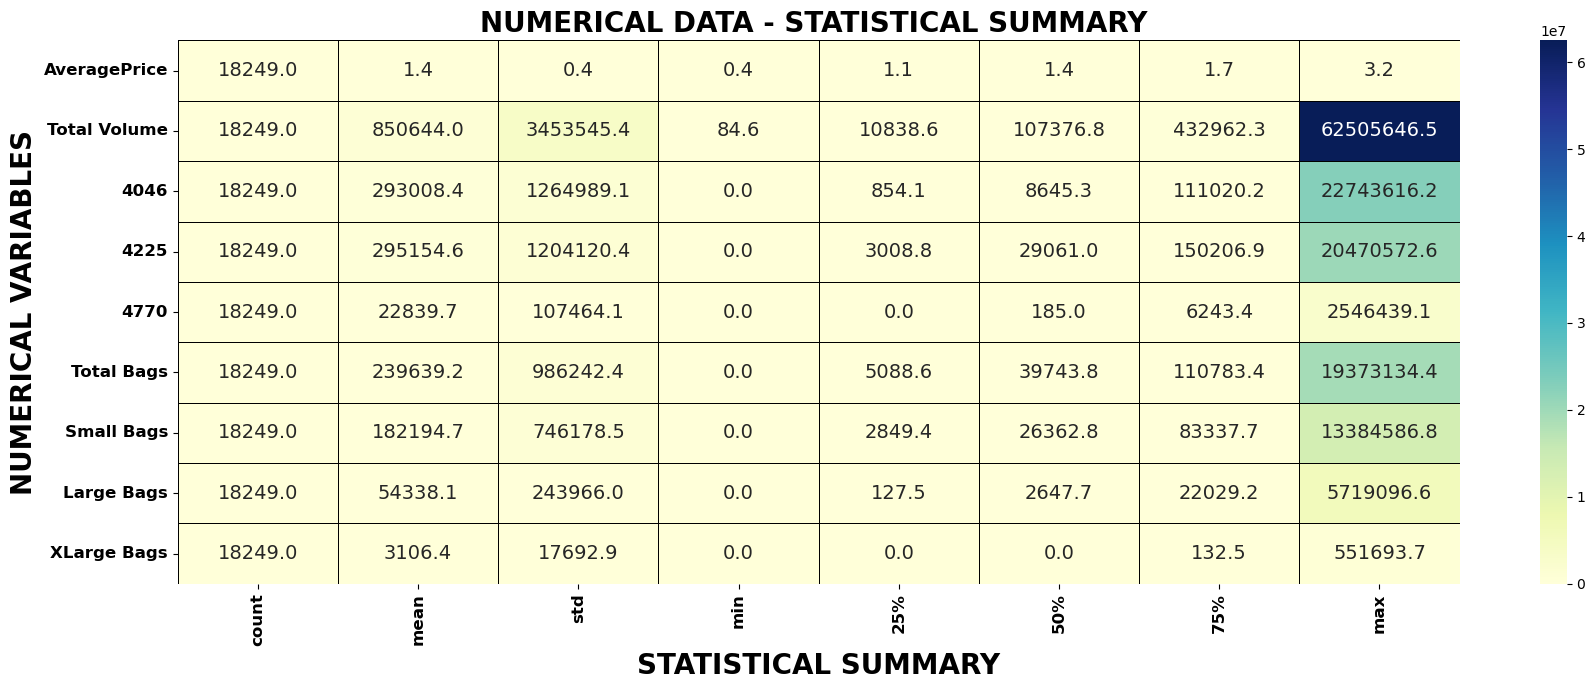

In [28]:
# Visualizing the Statistical summary for numerical data using heatmap.
plt.figure(figsize=(18,7))
sns.heatmap(df_numerical.describe().T,linewidths = 0.5,linecolor='black',fmt='0.1f',annot = True,cmap="YlGnBu",annot_kws={"size": 14})
plt.title("NUMERICAL DATA - STATISTICAL SUMMARY ",fontsize=20, fontweight='bold')
plt.xlabel("STATISTICAL SUMMARY", fontsize=20,fontweight='bold')
plt.ylabel("NUMERICAL VARIABLES", fontsize=20,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **count is same for all columns. Hence,no null values are present.**
- **mean>median for most of the features shows that the data is right skewed**
- **Large Difference between 75% and max values for all features shows presence of outliers**

In [29]:
# Statistical summary for categorical data
df_categorical.describe(include='O').T

count unique           top  freq
type    18249      2  conventional  9126
region  18249     54        Albany   338

# Visualization of data

### Univariate Graphical Analysis for Categorical data

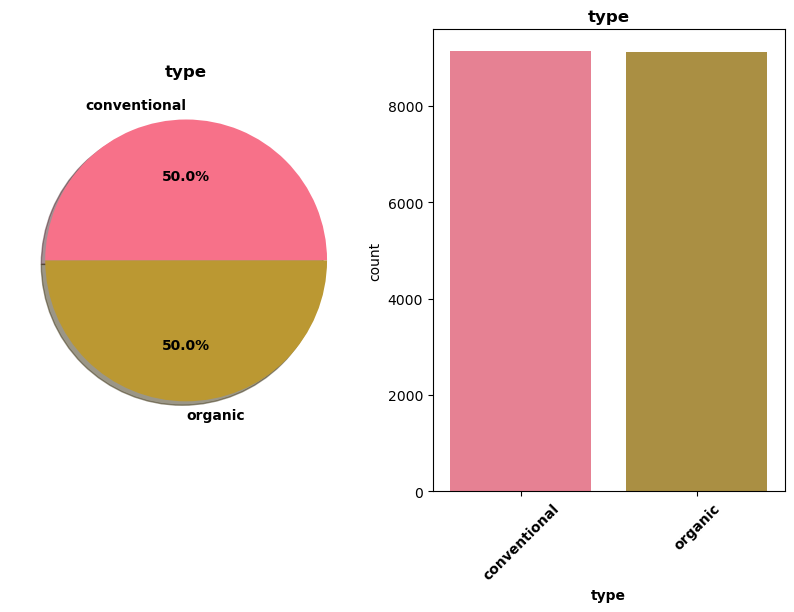

Observations for feature TYPE:


Value  Count  % Count
0  conventional   9126     50.0
1       organic   9123     50.0

In [30]:
colors=['husl','Dark2','Set2_r','summer_r','Set1','husl','rainbow','coolwarm','tab10','rainbow_r','gist_earth','Set2','prism',
        'hls','Paired','rocket','mako','flare','Blues_r']

plotnumber =1
for i in df_categorical.columns[0:1]:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=2:
        f,ax=plt.subplots(1,2,figsize=(10,6))
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                                      textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0],shadow=True)
        ax[0].set_title(i, fontsize=12,fontweight ='bold')
        ax[0].set_ylabel('')
        sns.countplot(df[i],data=df,ax=ax[1])
        ax[1].set_title(i,fontsize=12,fontweight ='bold')
        ax[1].set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=10,fontweight ='bold',rotation=45)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    print('\033[1m'+ "Observations for feature " + i.upper() + ":" +'\033[0m')
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts())[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

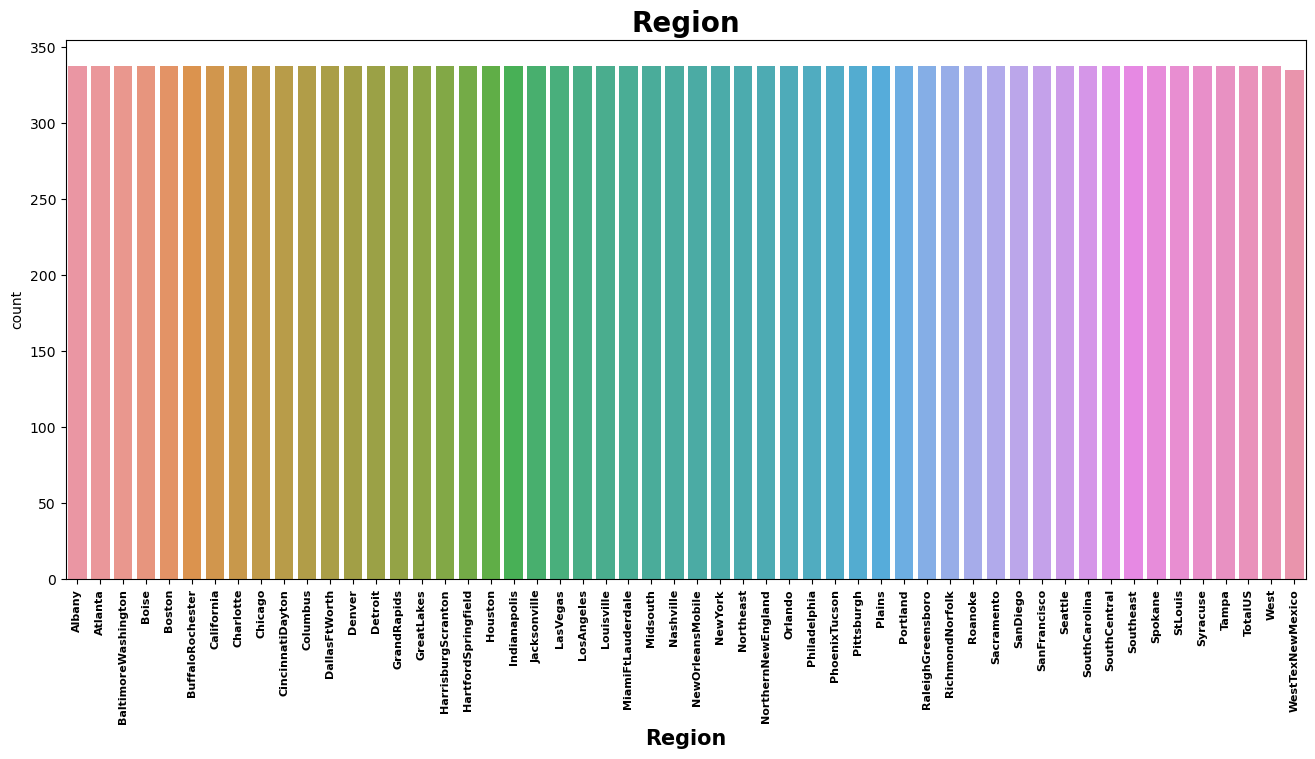

Observations for region :


Value  Count  % Count
0                Albany    338      1.9
1            Sacramento    338      1.9
2             Northeast    338      1.9
3    NorthernNewEngland    338      1.9
4               Orlando    338      1.9
5          Philadelphia    338      1.9
6         PhoenixTucson    338      1.9
7            Pittsburgh    338      1.9
8                Plains    338      1.9
9              Portland    338      1.9
10    RaleighGreensboro    338      1.9
11      RichmondNorfolk    338      1.9
12              Roanoke    338      1.9
13             SanDiego    338      1.9
14              Atlanta    338      1.9
15         SanFrancisco    338      1.9
16              Seattle    338      1.9
17        SouthCarolina    338      1.9
18         SouthCentral    338      1.9
19            Southeast    338      1.9
20              Spokane    338      1.9
21              StLouis    338      1.9
22             Syracuse    338      1.9
23                Tampa    338      1.9
24              TotalUS    338      1.9
25                 West    338      1.9
26              NewYork    338      1.9
27     NewOrleansMobile    338      1.9
28            Nashville    338      1.9
29             Midsouth    338      1.9
30  BaltimoreWashington    338      1.9
31                Boise    338      1.9
32               Boston    338      1.9
33     BuffaloRochester    338      1.9
34           California    338      1.9
35            Charlotte    338      1.9
36              Chicago    338      1.9
37     CincinnatiDayton    338      1.9
38             Columbus    338      1.9
39        DallasFtWorth    338      1.9
40               Denver    338      1.9
41              Detroit    338      1.9
42          GrandRapids    338      1.9
43           GreatLakes    338      1.9
44   HarrisburgScranton    338      1.9
45  HartfordSpringfield    338      1.9
46              Houston    338      1.9
47         Indianapolis    338      1.9
48         Jacksonville    338      1.9
49             LasVegas    338      1.9
50           LosAngeles    338      1.9
51           Louisville    338      1.9
52    MiamiFtLauderdale    338      1.9
53     WestTexNewMexico    335      1.8

In [31]:
colors=['Dark2','Set2_r','summer_r','Set1','husl']

sns.set_palette(colors[plotnumber-1])
  
f,ax=plt.subplots(1,1,figsize=(16,7))    
sns.countplot(df["region"],data=df)    
ax.set_title("Region",fontsize=20,fontweight ='bold')    
ax.set_xlabel("Region",fontsize=15,fontweight ='bold')    
plt.xticks(fontsize=8,fontweight ='bold',rotation=90)    
plt.show()    
length=df["region"].nunique()    
print('\033[1m'+ "Observations for region :" +'\033[0m')       
length=df["region"].nunique()    
name=[]    
value_count=[]    
percent_value_count=[]    
for j in range(length):    
    name.append(df["region"].value_counts().index.values[j])    
    value_count.append((df["region"].value_counts()).iloc[j])    
    percent_value_count.append(round(((df["region"].value_counts()).iloc[j])*100/(df["region"].value_counts().sum()),1))    
df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})    
display(df_value_count)    
print("="*120)    

### Univariate Graphical Analysis for Numerical data

In [32]:
len(df_numerical.columns)

9

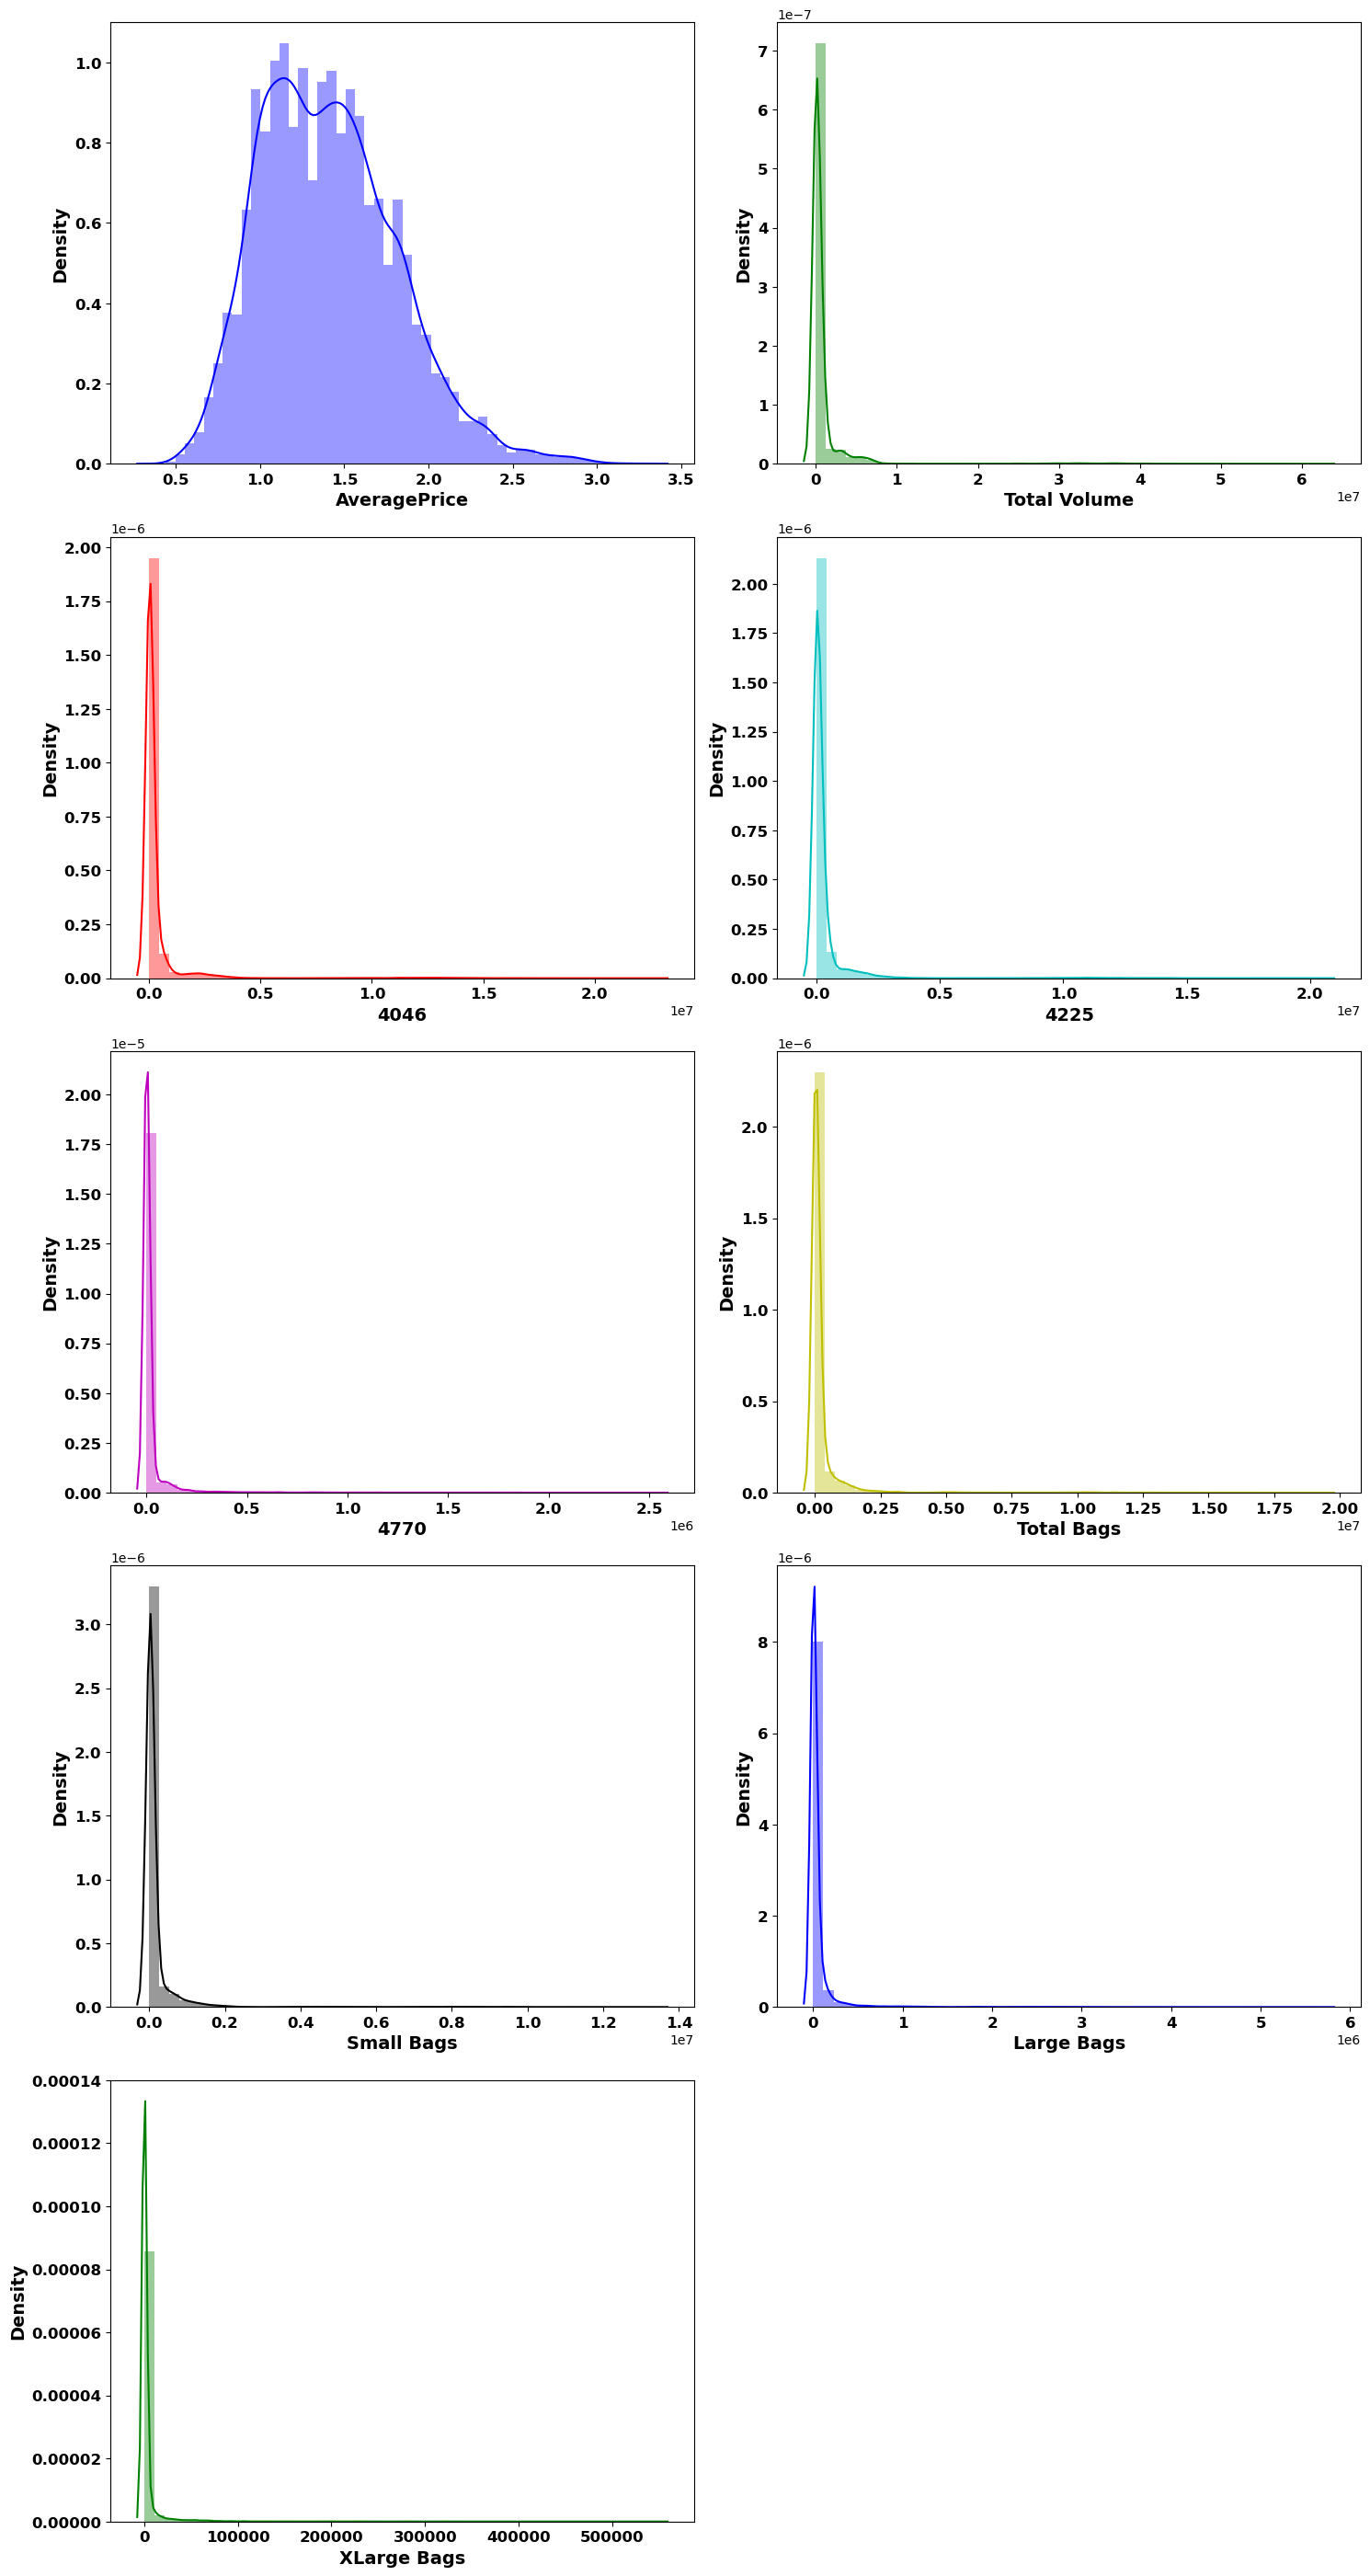

In [33]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,50),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=9:
        plt.subplot(9,2,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **Distribution is not normal in all features**
- **Almost all the features are having right skewed data**
- **Data spread is small in all features except Average Price**

### Bivariate Graphical Analysis to study the relation with categorical targe variable "region"

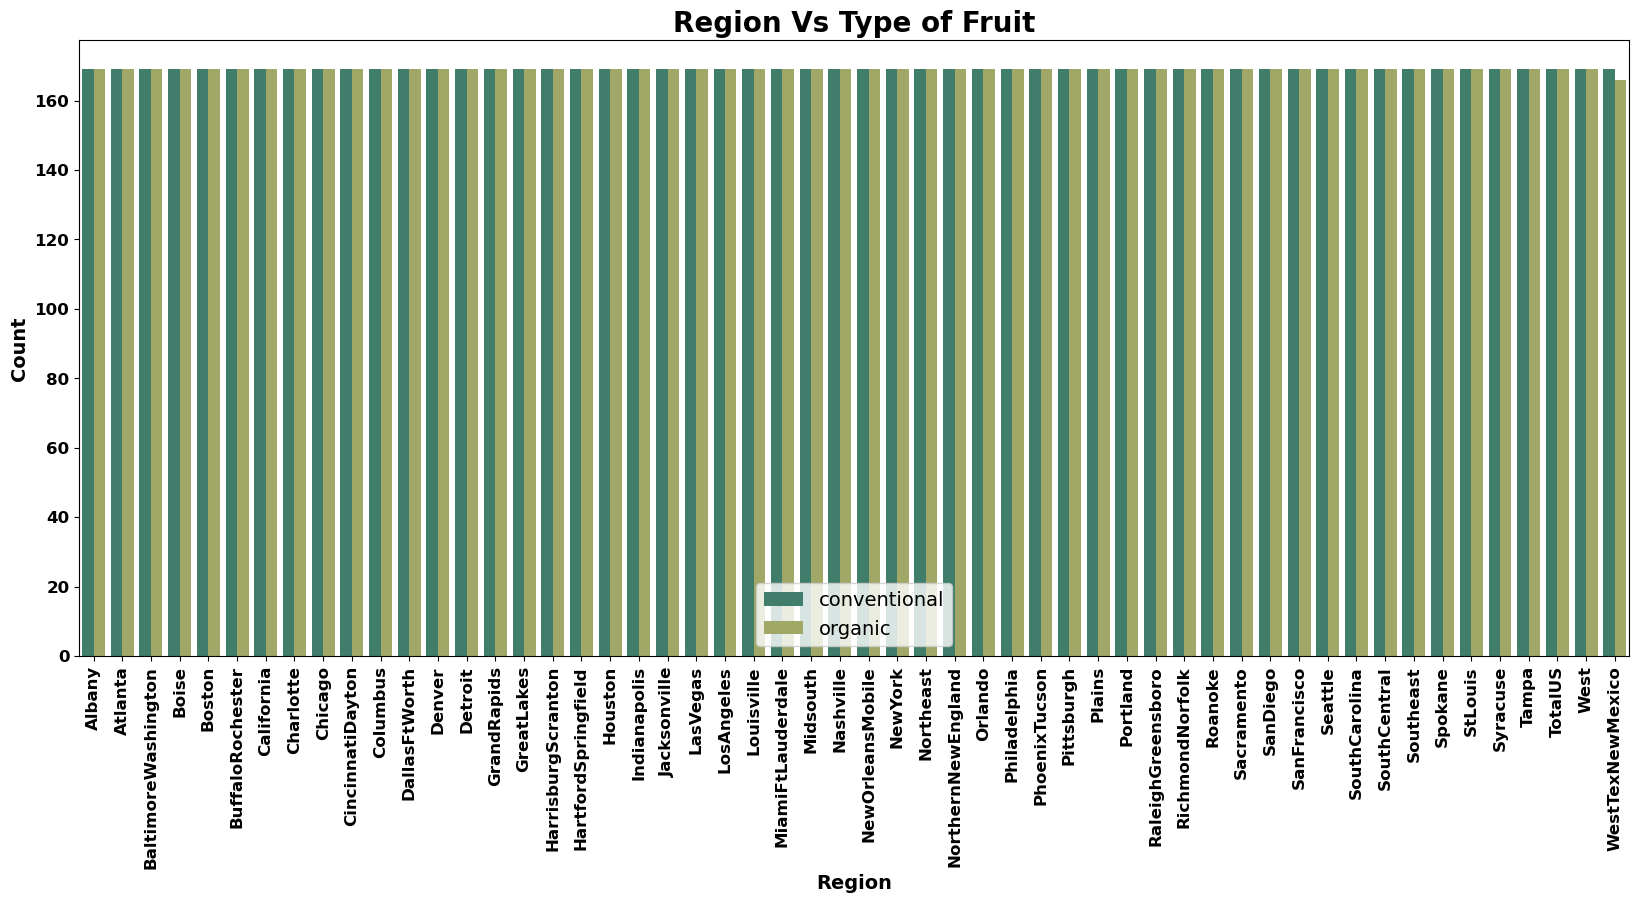

In [34]:
colors=['Dark2','Set2_r','summer_r','Set1','husl']
plt.figure(figsize=(20,8))
sns.countplot(df['region'], hue=df['type'], palette = 'gist_earth')
plt.title("Region Vs Type of Fruit",fontsize=20,fontweight ='bold')
plt.xlabel("Region",fontsize=14,fontweight ='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90) 
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(fontsize=14)
plt.show()   

#### Observations:
- **Fruits of different type sold in different counties are of same quantity in all the countries except WestTextNewMexico**

In [35]:
df["region"].nunique()

54

In [36]:
features=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

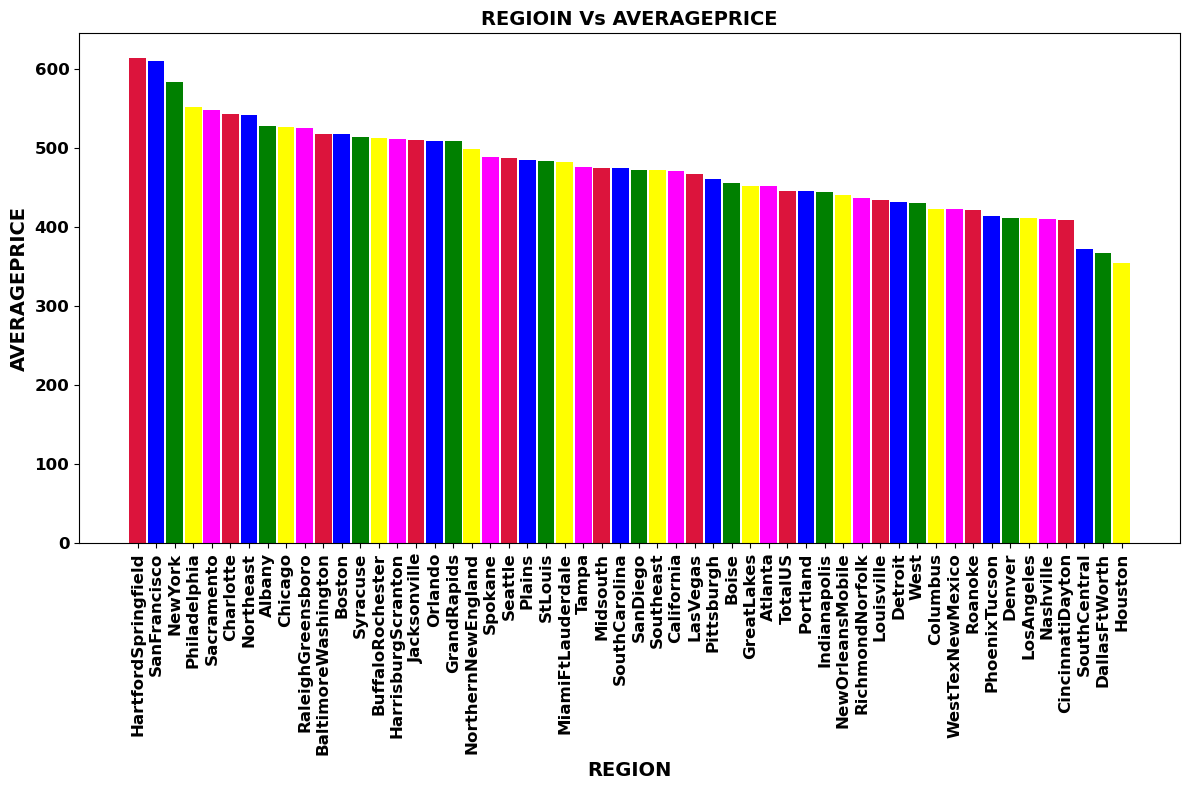

Observations for AVERAGEPRICE:
- Maximum AVERAGEPRICE is occuring in country HARTFORDSPRINGFIELD
- Minimum AVERAGEPRICE is occuring in country HOUSTON
------------------------------------------------------------------------------------------------------------------------------




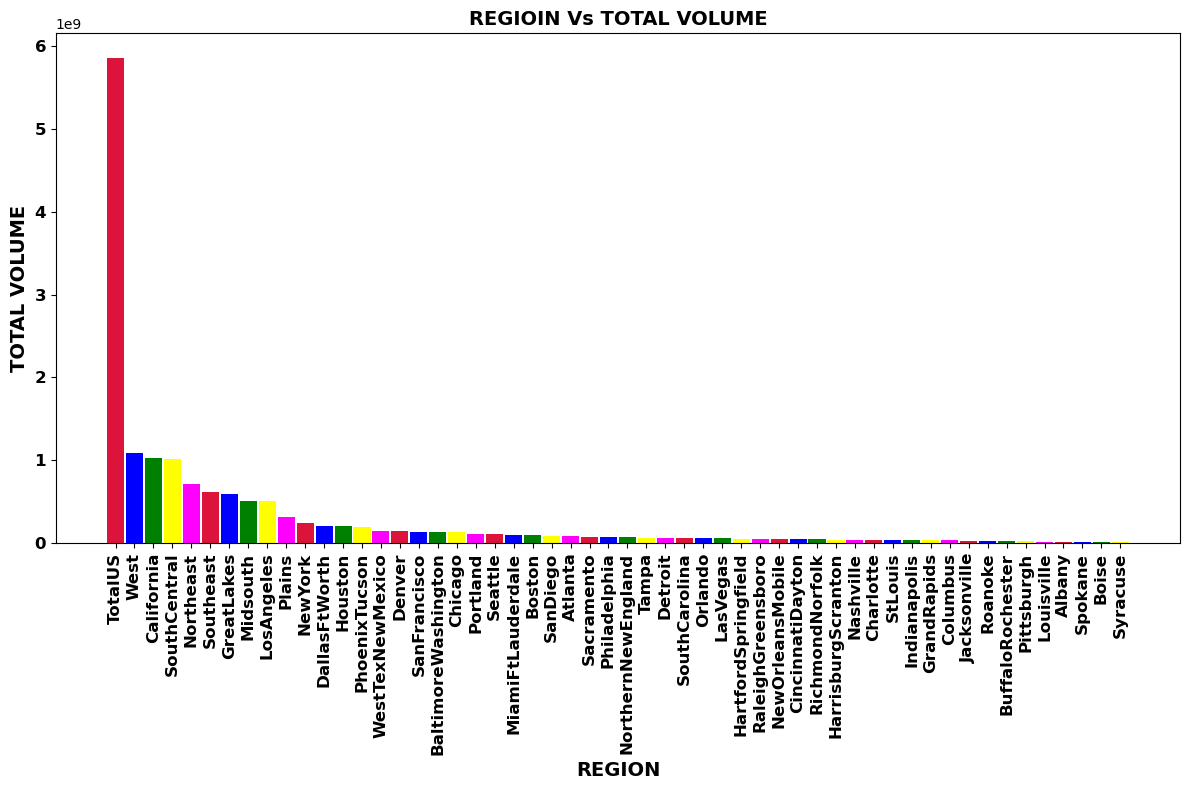

Observations for TOTAL VOLUME:
- Maximum TOTAL VOLUME is occuring in country TOTALUS
- Minimum TOTAL VOLUME is occuring in country SYRACUSE
------------------------------------------------------------------------------------------------------------------------------




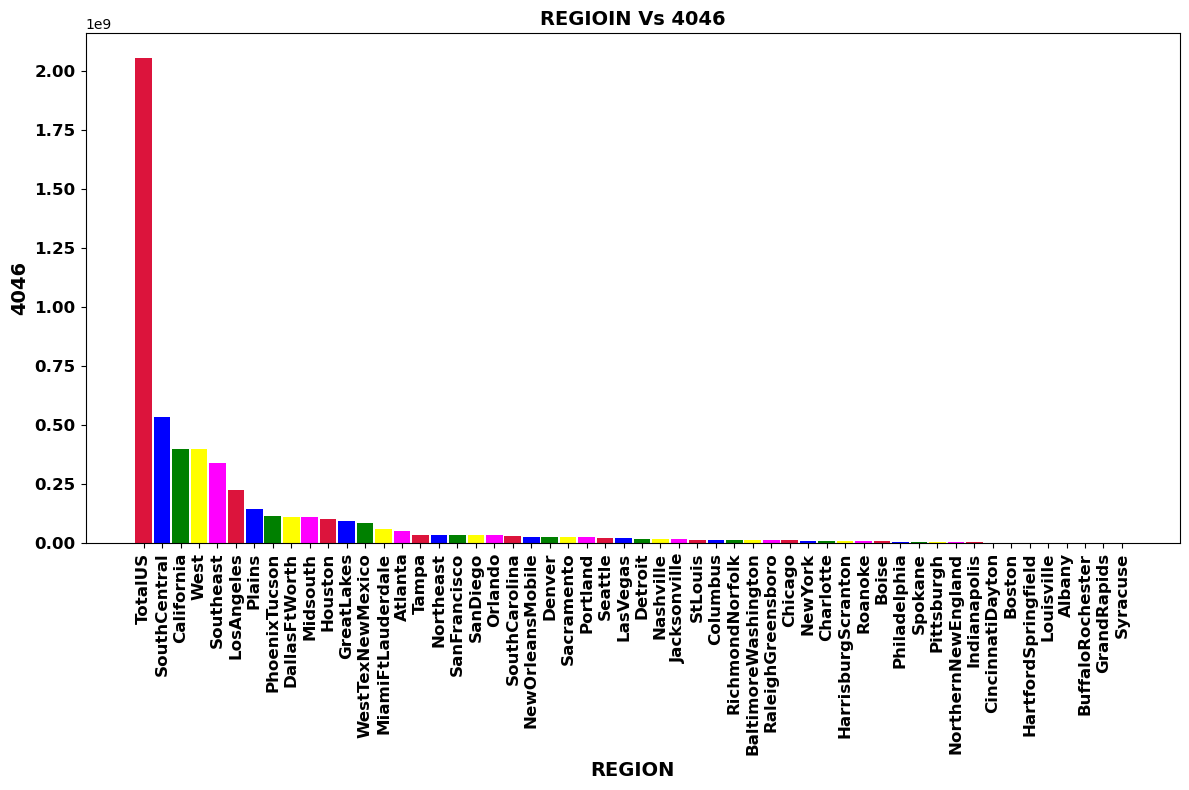

Observations for 4046:
- Maximum 4046 is occuring in country TOTALUS
- Minimum 4046 is occuring in country SYRACUSE
------------------------------------------------------------------------------------------------------------------------------




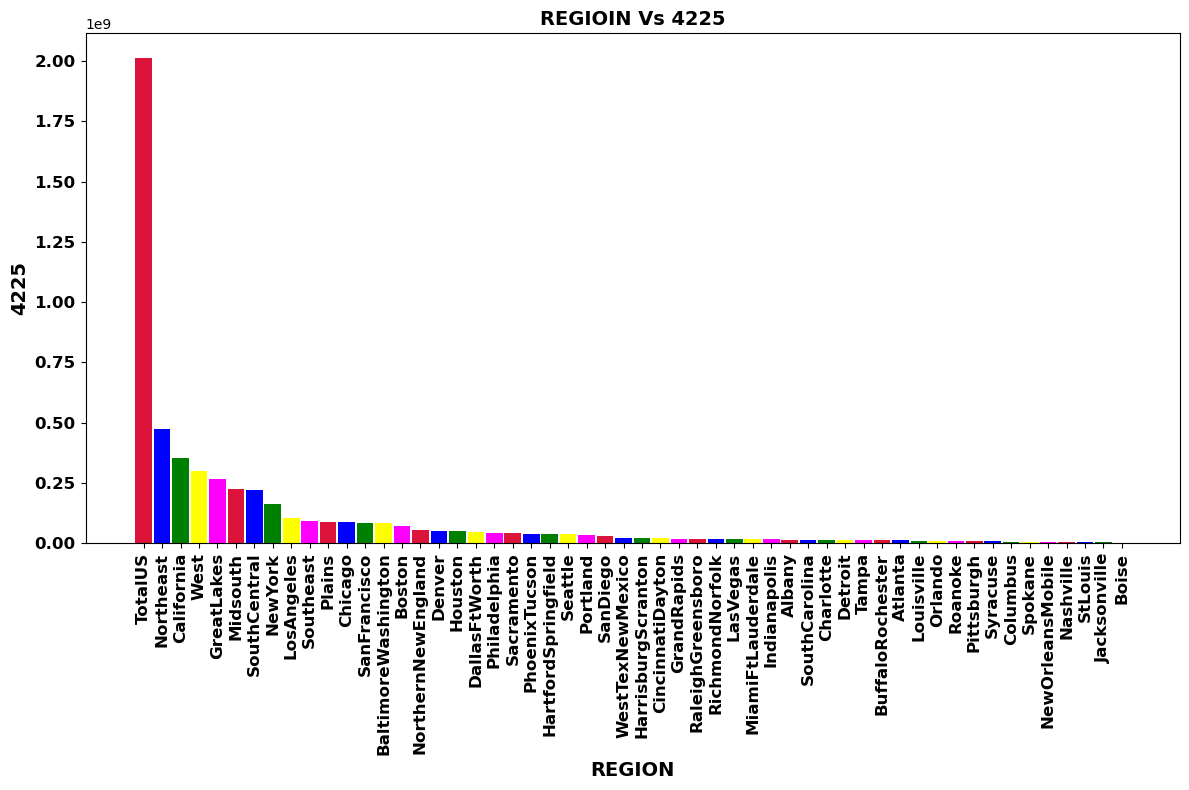

Observations for 4225:
- Maximum 4225 is occuring in country TOTALUS
- Minimum 4225 is occuring in country BOISE
------------------------------------------------------------------------------------------------------------------------------




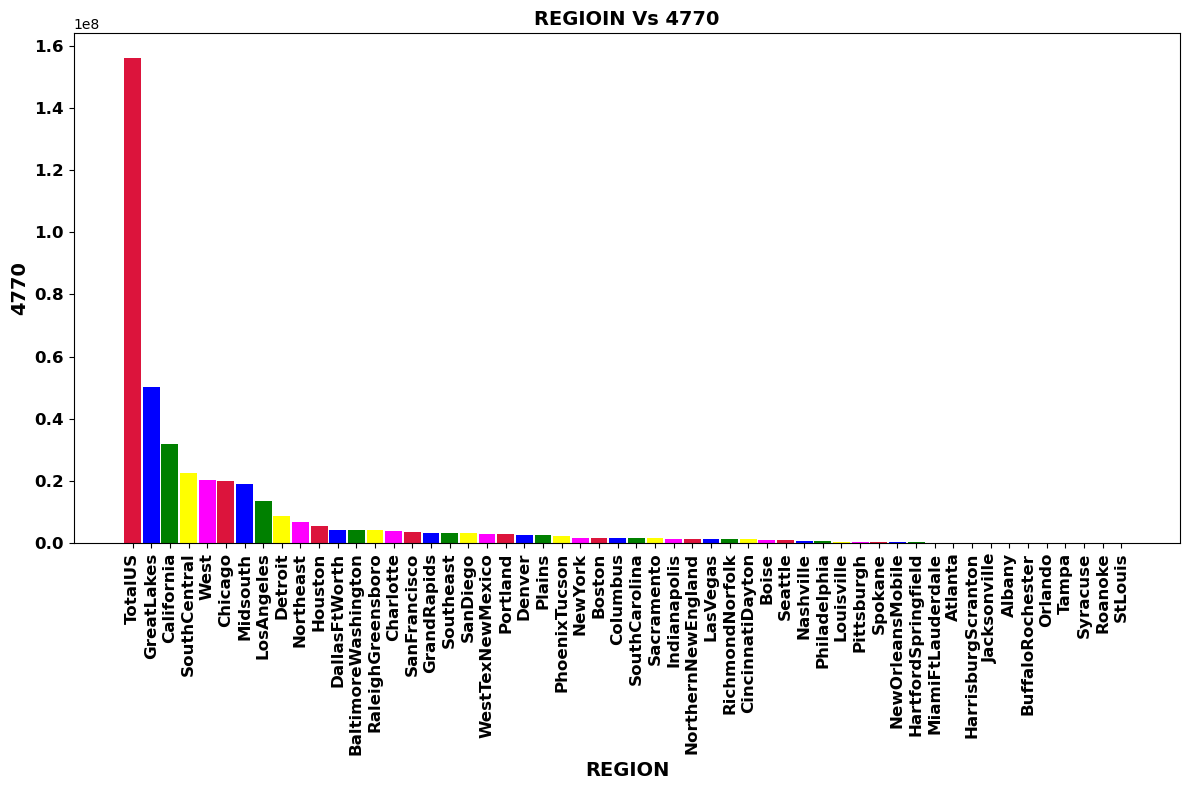

Observations for 4770:
- Maximum 4770 is occuring in country TOTALUS
- Minimum 4770 is occuring in country STLOUIS
------------------------------------------------------------------------------------------------------------------------------




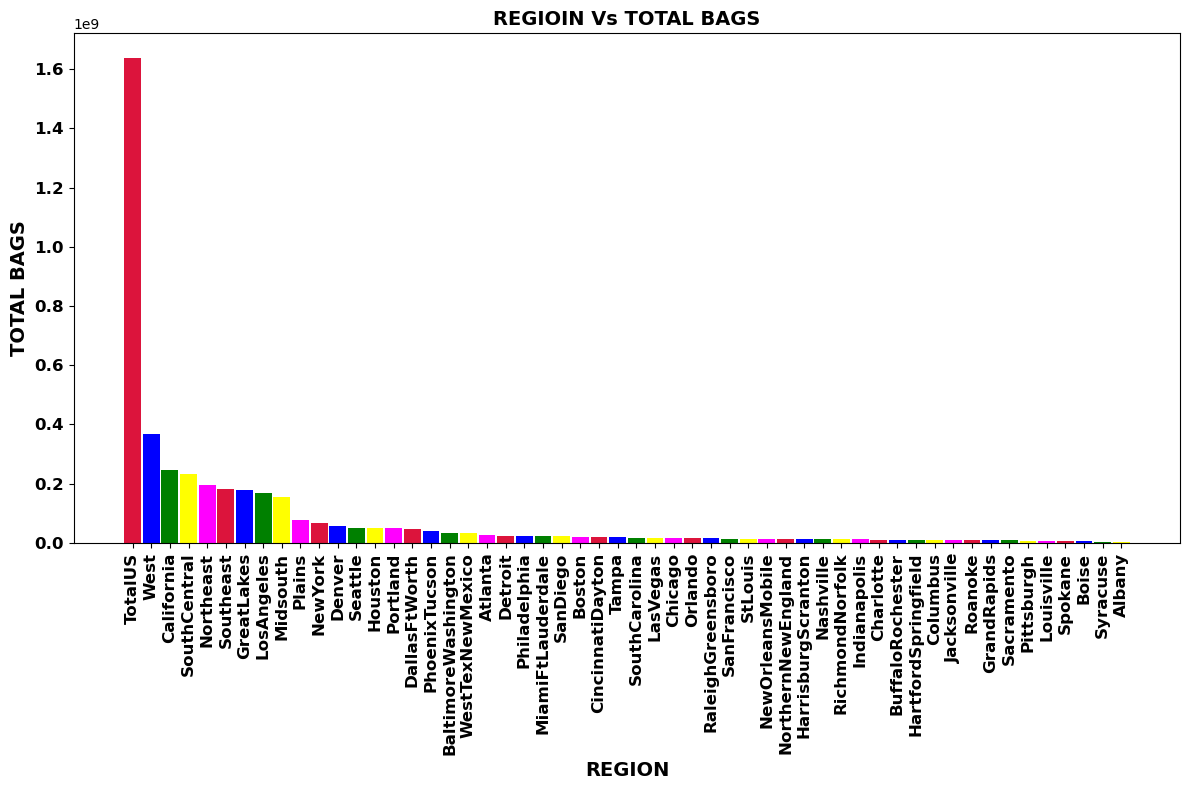

Observations for TOTAL BAGS:
- Maximum TOTAL BAGS is occuring in country TOTALUS
- Minimum TOTAL BAGS is occuring in country ALBANY
------------------------------------------------------------------------------------------------------------------------------




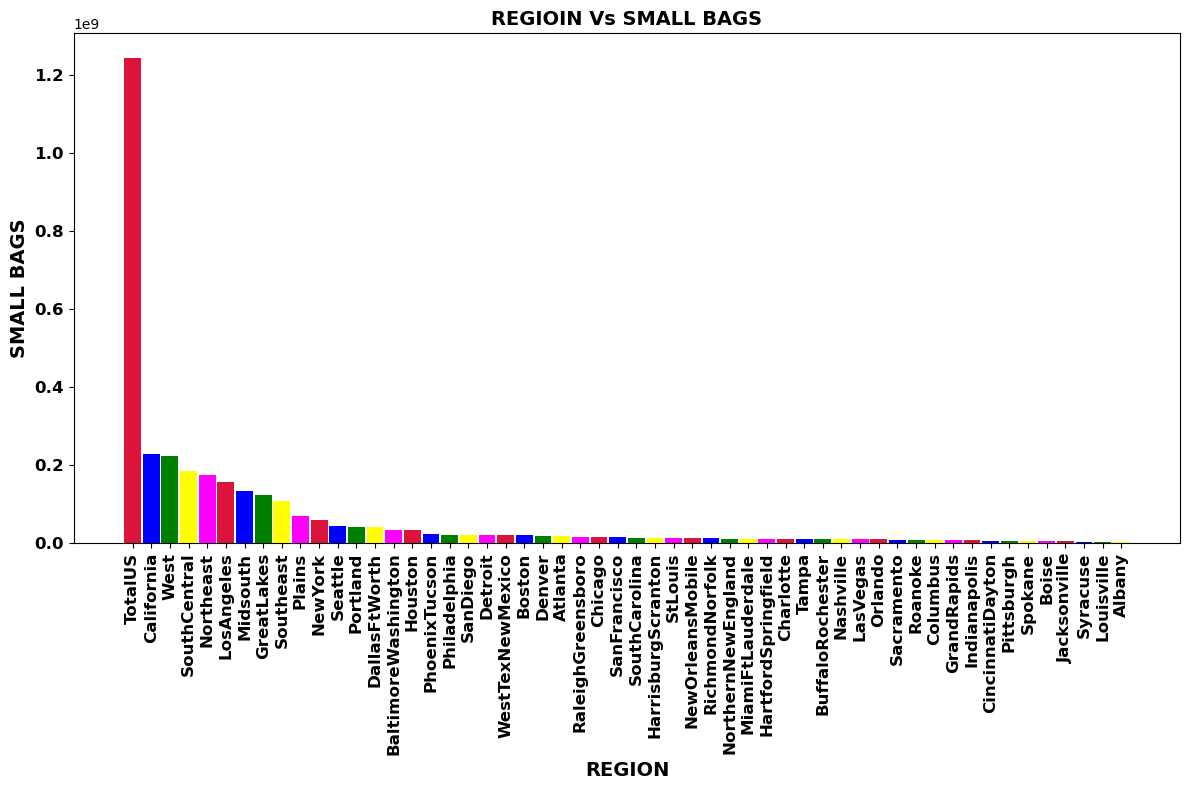

Observations for SMALL BAGS:
- Maximum SMALL BAGS is occuring in country TOTALUS
- Minimum SMALL BAGS is occuring in country ALBANY
------------------------------------------------------------------------------------------------------------------------------




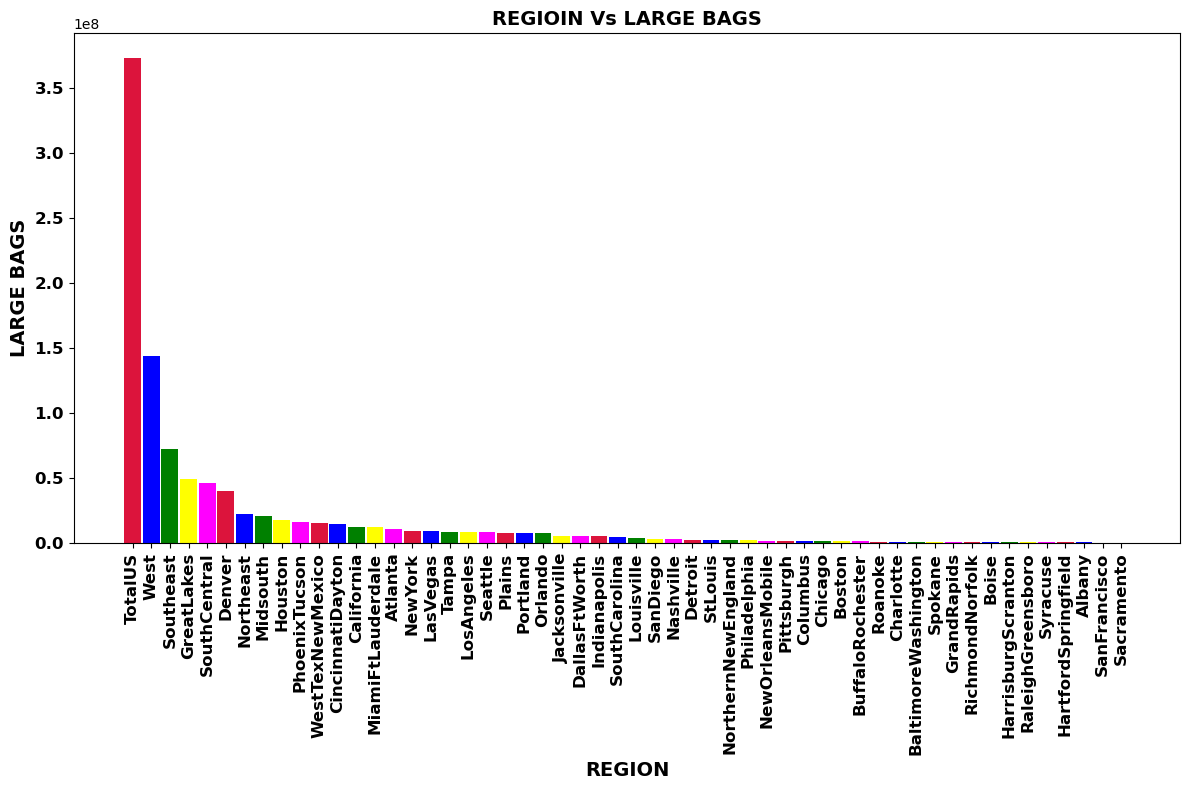

Observations for LARGE BAGS:
- Maximum LARGE BAGS is occuring in country TOTALUS
- Minimum LARGE BAGS is occuring in country SACRAMENTO
------------------------------------------------------------------------------------------------------------------------------




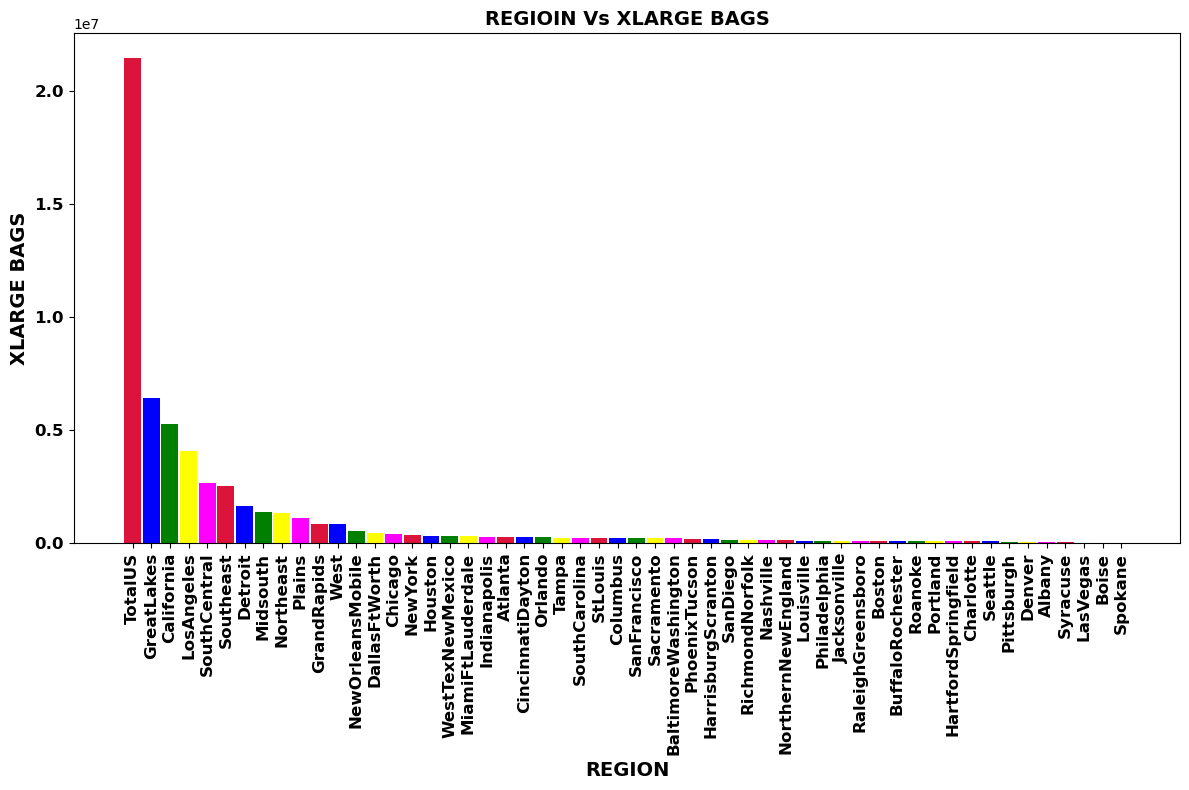

Observations for XLARGE BAGS:
- Maximum XLARGE BAGS is occuring in country TOTALUS
- Minimum XLARGE BAGS is occuring in country SPOKANE
------------------------------------------------------------------------------------------------------------------------------




In [37]:
for i in features:  
    plot_data= df.groupby(['region'])[i].sum().sort_values(ascending =False)
    data = df.groupby(['region'])[i].sum().sort_values(ascending =False)[:60]
    plt.figure(figsize=(12,8))
    plt.bar(data=data ,x = data.index , height = data.values, width=0.9, color = ['crimson','blue','green', 'yellow', 'magenta'])
    plt.title("REGIOIN Vs "+i.upper(),fontsize=14, fontweight='bold')
    plt.xlabel("REGION", fontsize=14,fontweight='bold')
    plt.ylabel(i.upper(), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.tight_layout()
    plt.show()
    print('\033[1m'+ "Observations for " + i.upper() + ":" +'\033[0m')
    print('\033[1m'+ "- Maximum "+ i.upper() +" is occuring in country "+ plot_data.index[0].upper() +'\033[0m')
    print('\033[1m'+ "- Minimum "+ i.upper() +" is occuring in country "+ plot_data.index[53].upper() +'\033[0m')
    print("--"*63)
    print("\n")

### Bivariate Graphical Analysis to study the relation with numerical targe variable "Average Price"

In [38]:
len(df_numerical.columns)

9

In [39]:
df_numerical.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

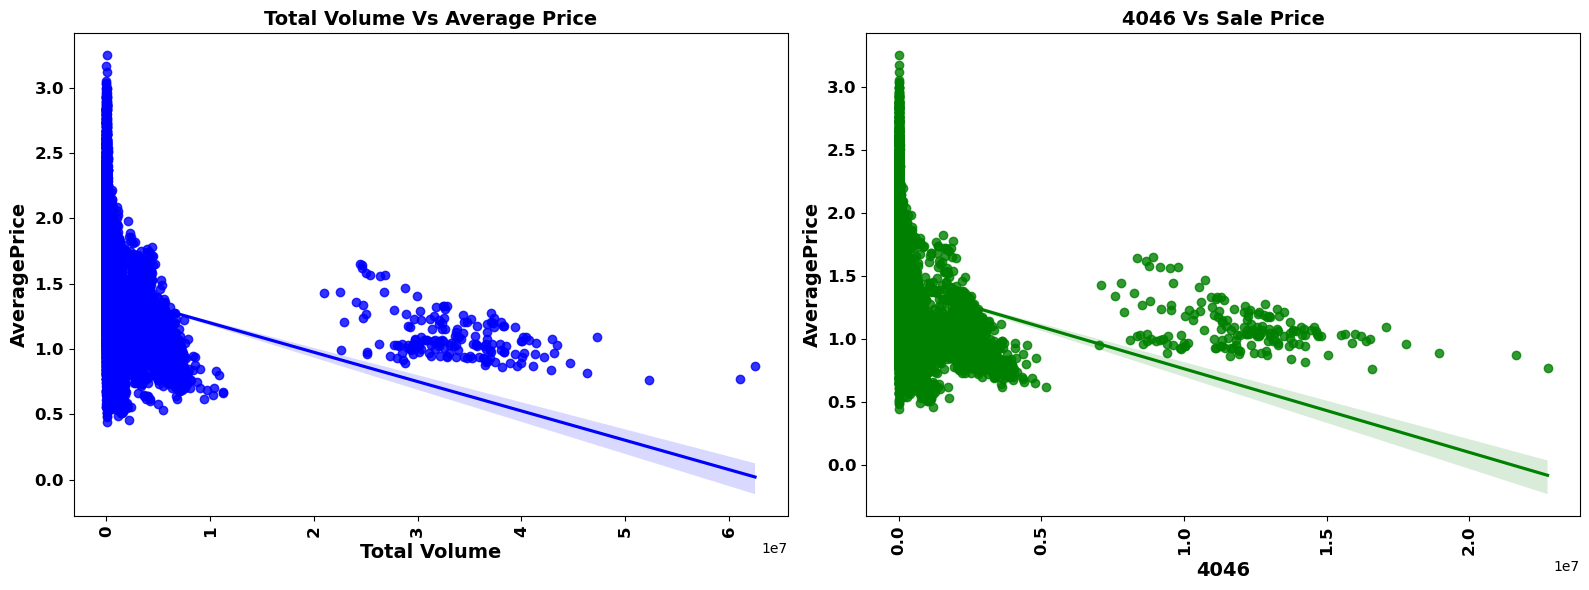

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.regplot(data=df,x=df_numerical.columns[1], y='AveragePrice',color='b')
plt.title('{} Vs Average Price'.format(df_numerical.columns[1]),fontsize=14, fontweight='bold')
plt.xlabel(df_numerical.columns[1], fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.regplot(data=df,x=df_numerical.columns[2], y='AveragePrice',color='g')
plt.title('{} Vs Sale Price'.format(df_numerical.columns[2]),fontsize=14, fontweight='bold')
plt.xlabel(df_numerical.columns[2], fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **Average Price is reducing with the increase in Total Volume of sales of fruits. This is expected trend, The same thing happening with 4046 code fruits**

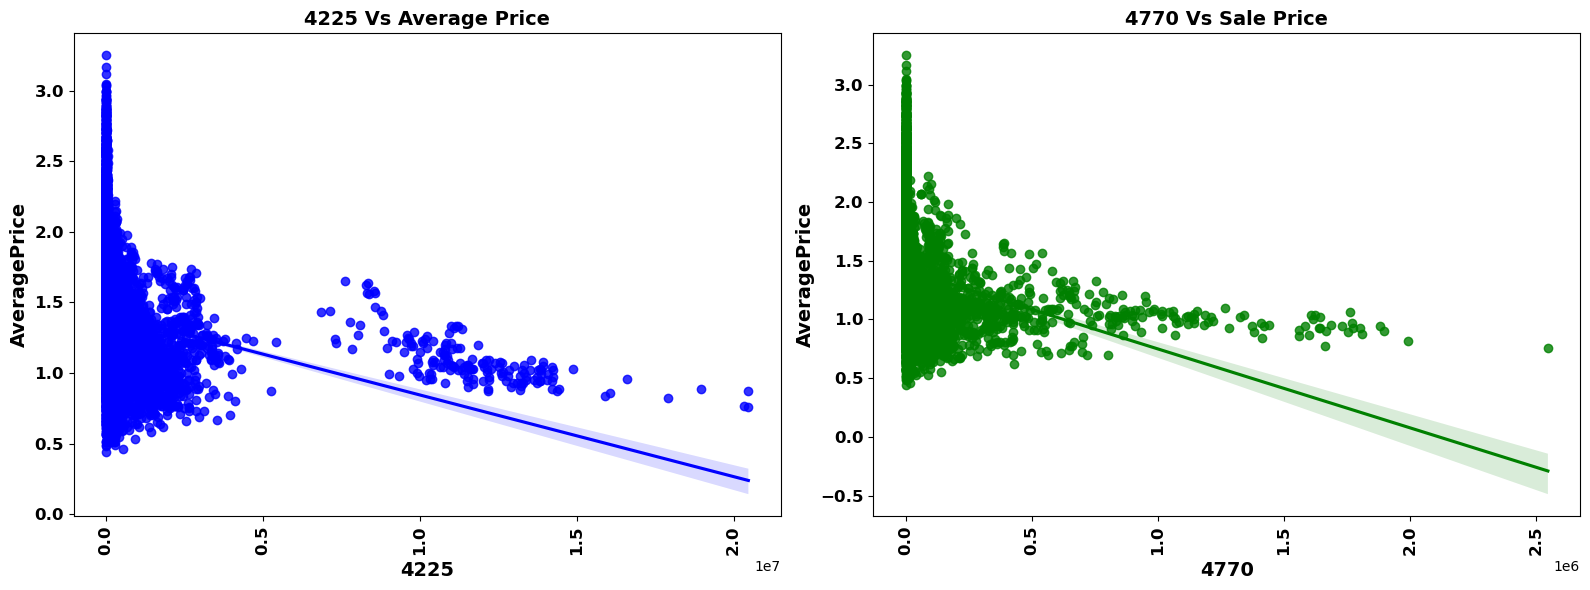

In [41]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.regplot(data=df,x=df_numerical.columns[3], y='AveragePrice',color='b')
plt.title('{} Vs Average Price'.format(df_numerical.columns[3]),fontsize=14, fontweight='bold')
plt.xlabel(df_numerical.columns[3], fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.regplot(data=df,x=df_numerical.columns[4], y='AveragePrice',color='g')
plt.title('{} Vs Sale Price'.format(df_numerical.columns[4]),fontsize=14, fontweight='bold')
plt.xlabel(df_numerical.columns[4], fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **Average Price is reducing with the increase in volume of both 4225 and 4770 code fruits**

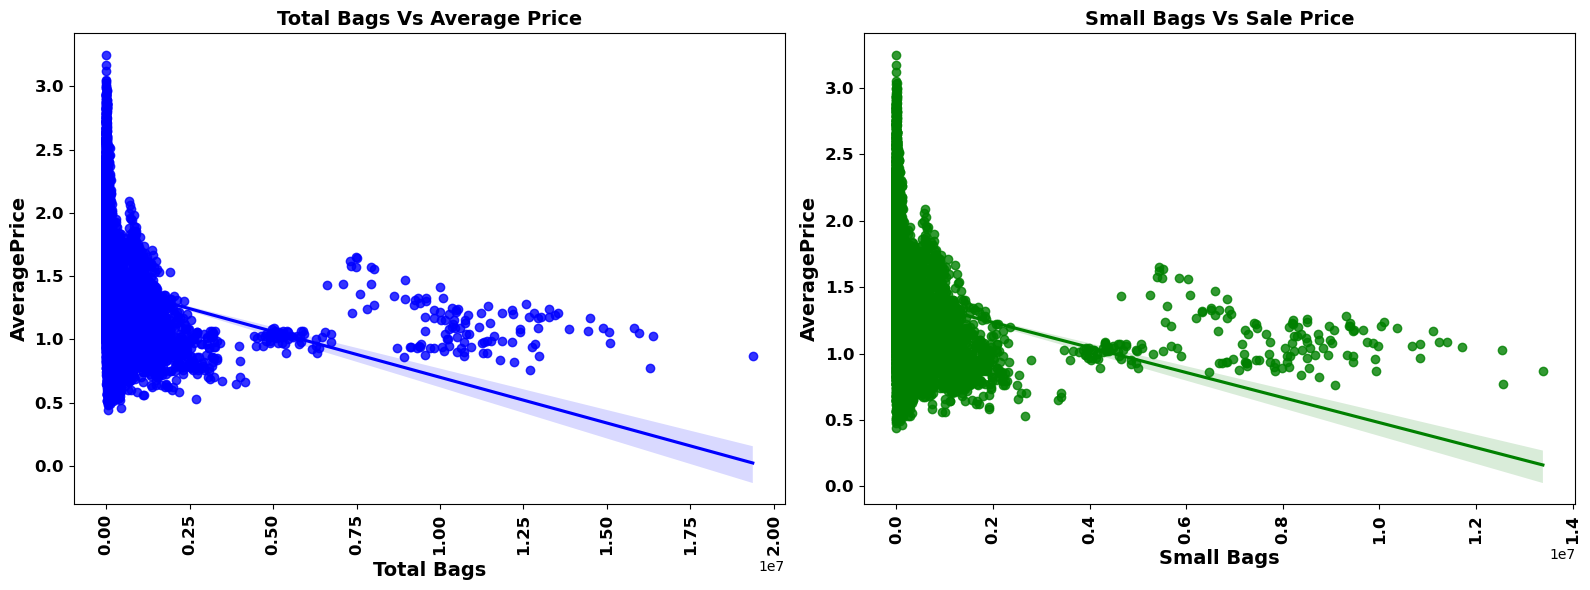

In [42]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.regplot(data=df,x=df_numerical.columns[5], y='AveragePrice',color='b')
plt.title('{} Vs Average Price'.format(df_numerical.columns[5]),fontsize=14, fontweight='bold')
plt.xlabel(df_numerical.columns[5], fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.regplot(data=df,x=df_numerical.columns[6], y='AveragePrice',color='g')
plt.title('{} Vs Sale Price'.format(df_numerical.columns[6]),fontsize=14, fontweight='bold')
plt.xlabel(df_numerical.columns[6], fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **Average Price is reducing with the increase in no. of Total Bags and Small Bags with fruits sold**

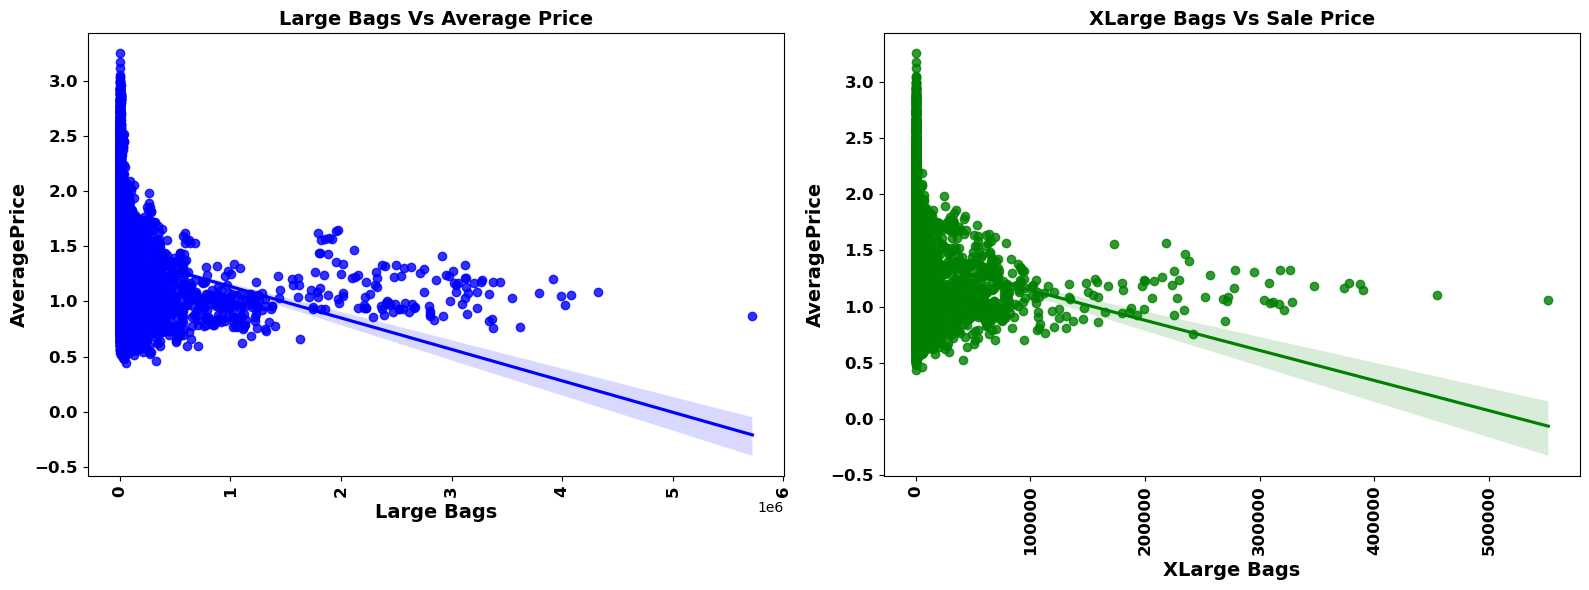

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.regplot(data=df,x=df_numerical.columns[7], y='AveragePrice',color='b')
plt.title('{} Vs Average Price'.format(df_numerical.columns[7]),fontsize=14, fontweight='bold')
plt.xlabel(df_numerical.columns[7], fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.regplot(data=df,x=df_numerical.columns[8], y='AveragePrice',color='g')
plt.title('{} Vs Sale Price'.format(df_numerical.columns[8]),fontsize=14, fontweight='bold')
plt.xlabel(df_numerical.columns[8], fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **Average Price is reducing with the increase in no. of Large Bags and XLarge Bags with fruits sold**

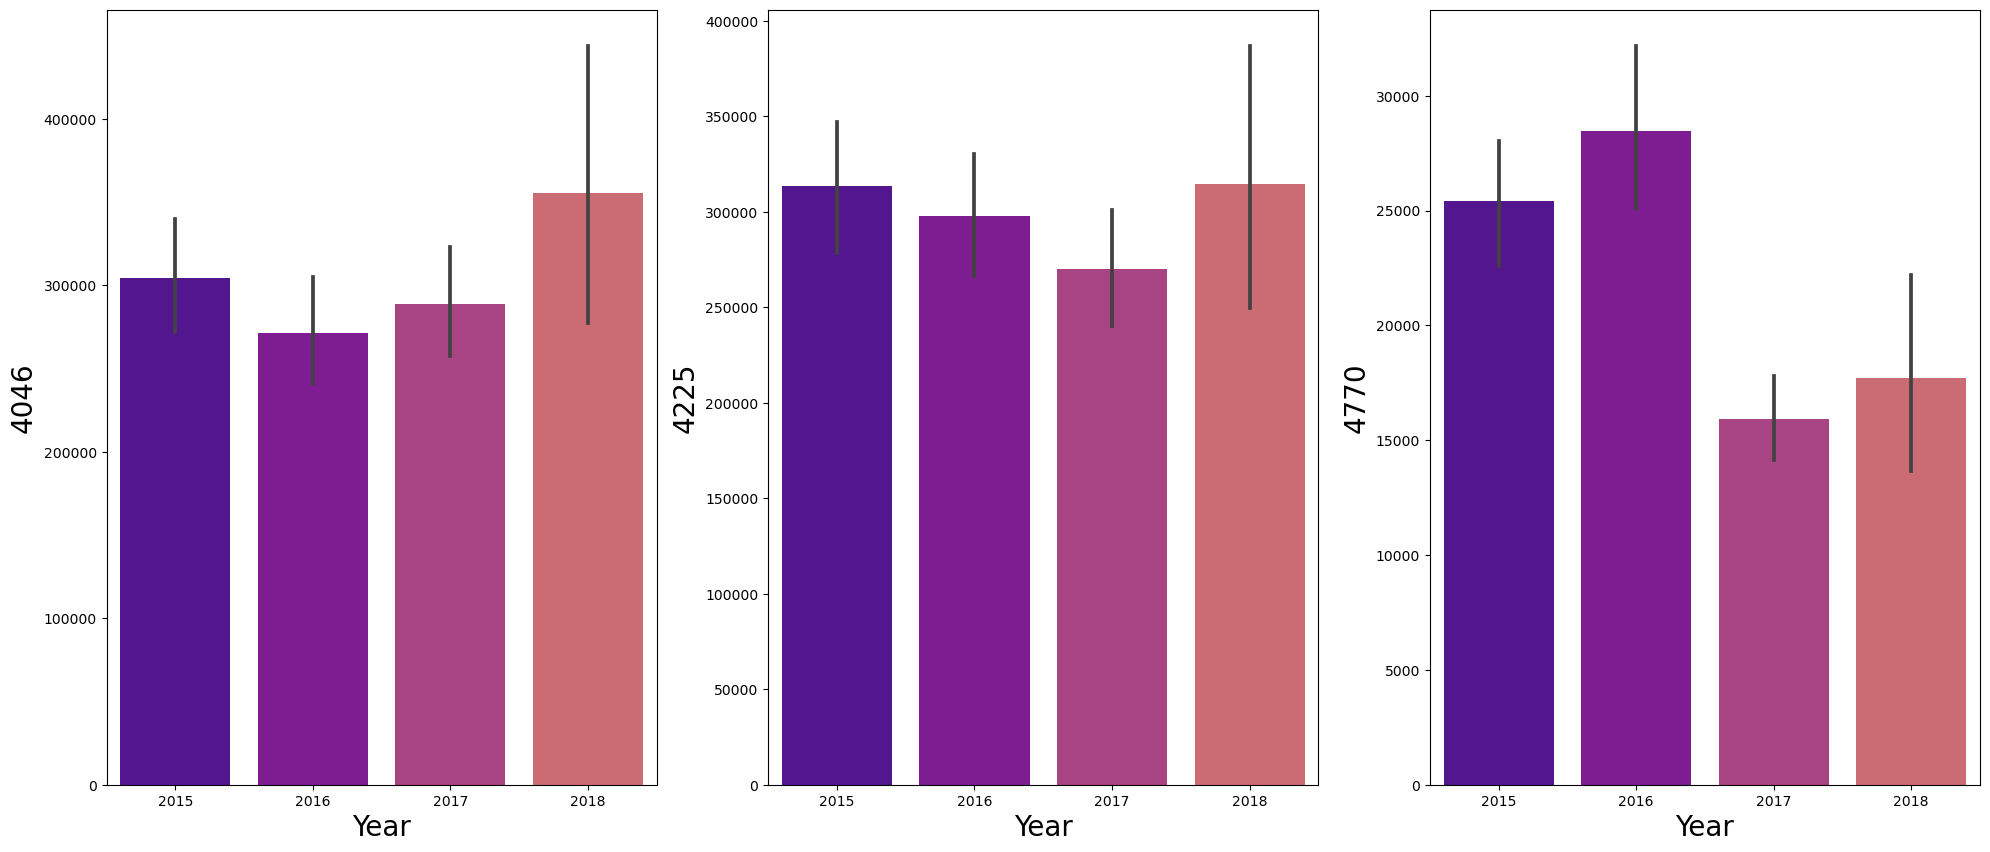

In [44]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['4046','4225','4770']]
X = df['Year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Observations:
- **Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and  PLU 4770, which is least produced.** 

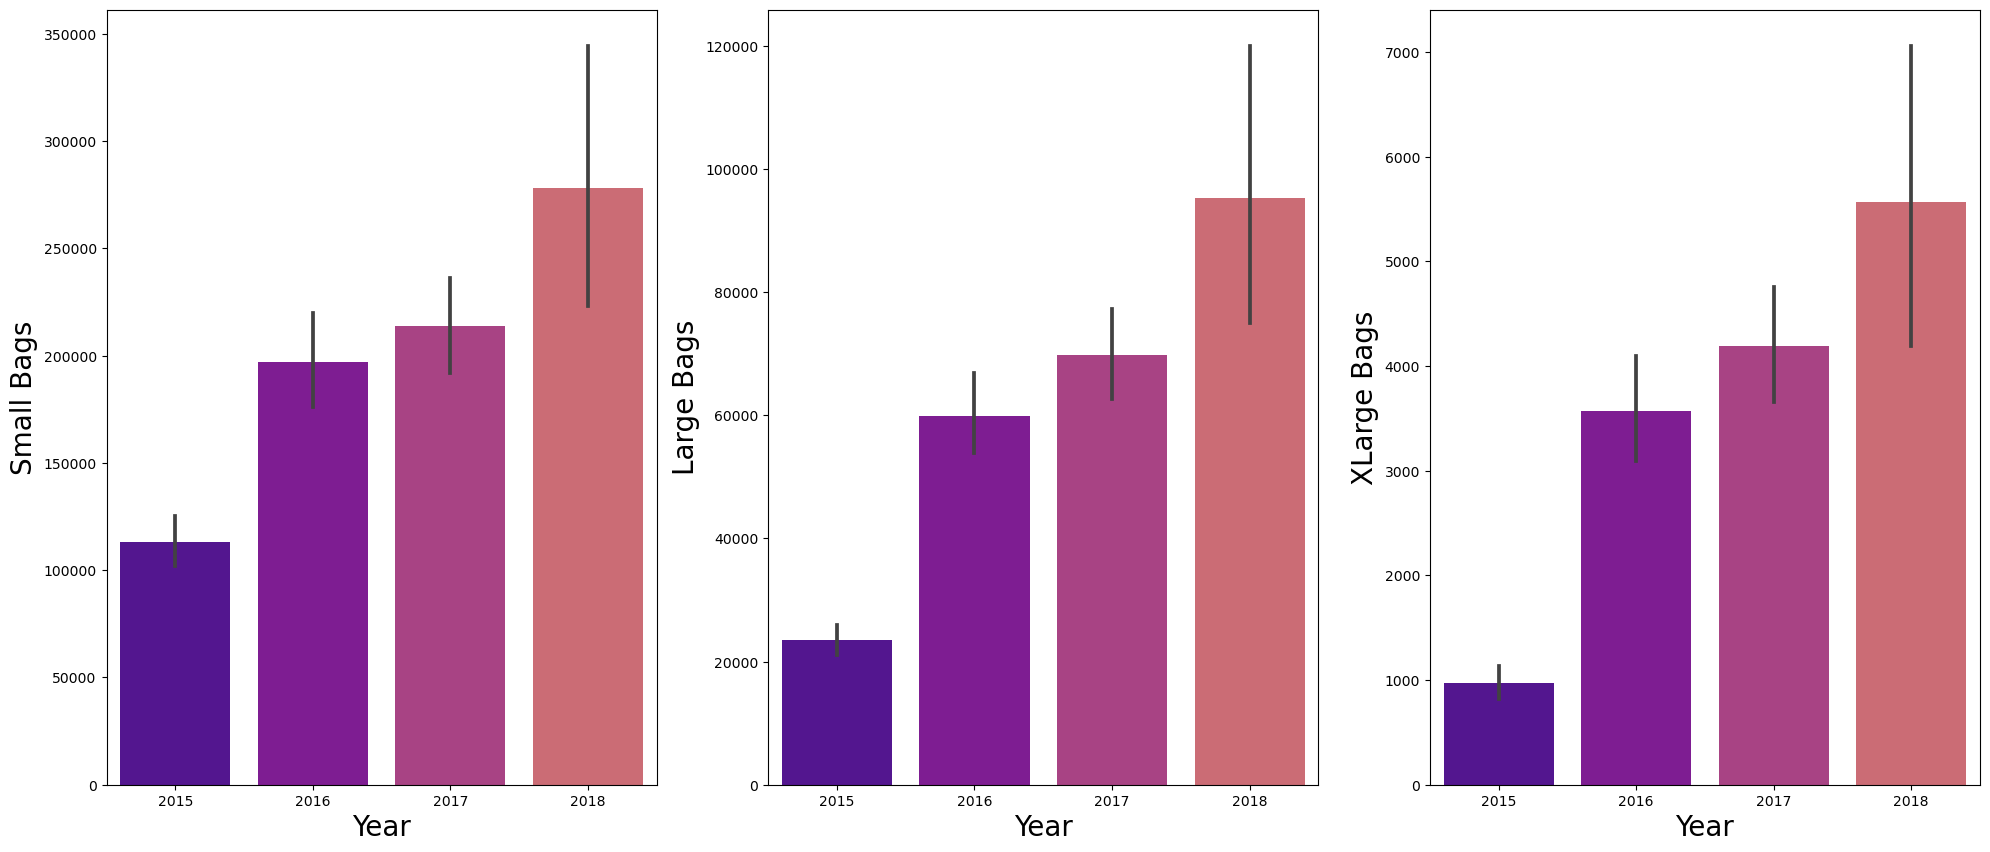

In [45]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['Year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Observations:
- **Sale of all 3 types of bags has grown over the years** 
- **Most of customers prefer buying Small Bags over Large and Xlarge bags**
- **There is very narrow Customer segment willing to buy XLarge type bags possiblily more quantity need to consume and price associated with it**

### Multivariate Graphical Analysis

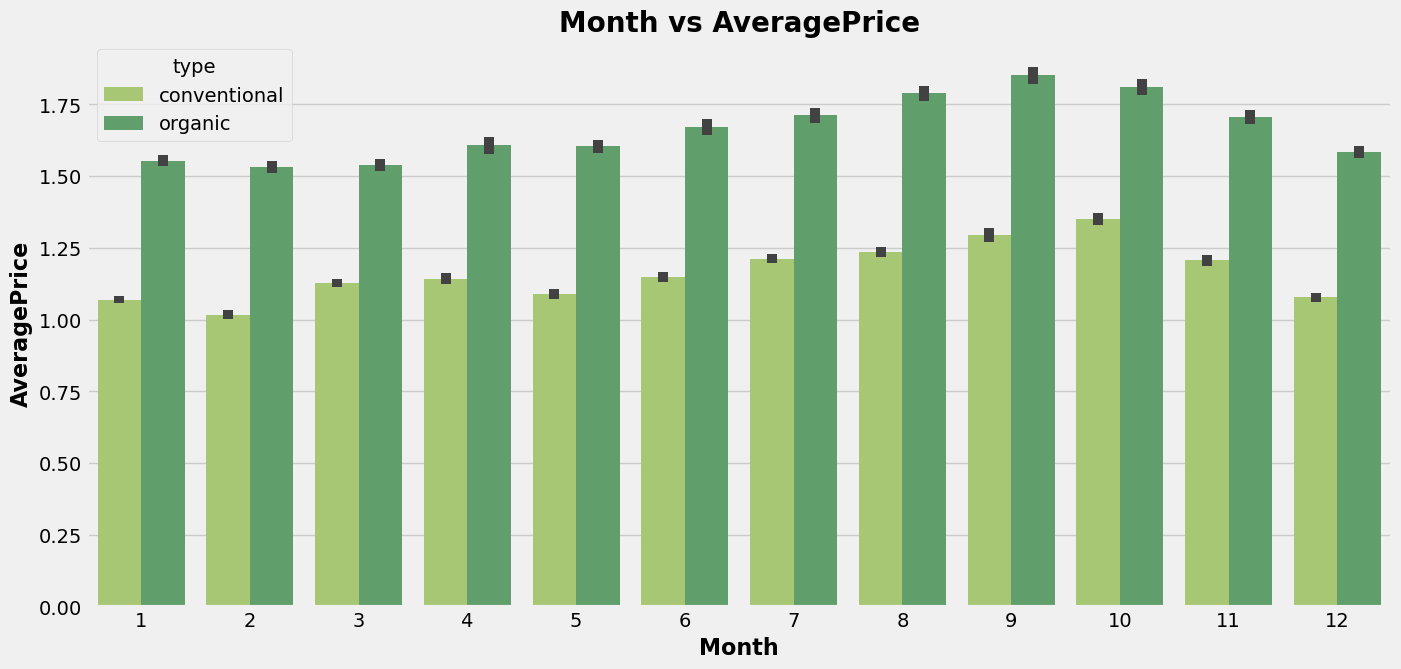

In [46]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(df['Month'], df['AveragePrice'],hue=df["type"], palette = 'summer_r')
plt.title('Month vs AveragePrice',fontsize=20,fontweight ='bold')
plt.xlabel('Month', fontsize=16,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=16,fontweight='bold')
plt.show()

#### Observations:
- **In month of September and October, price of Organic type of Avacado is comparatively higher than other months.**
- **Price of Organic Avacado is higher than price of Conventional Avacado throughout the year**

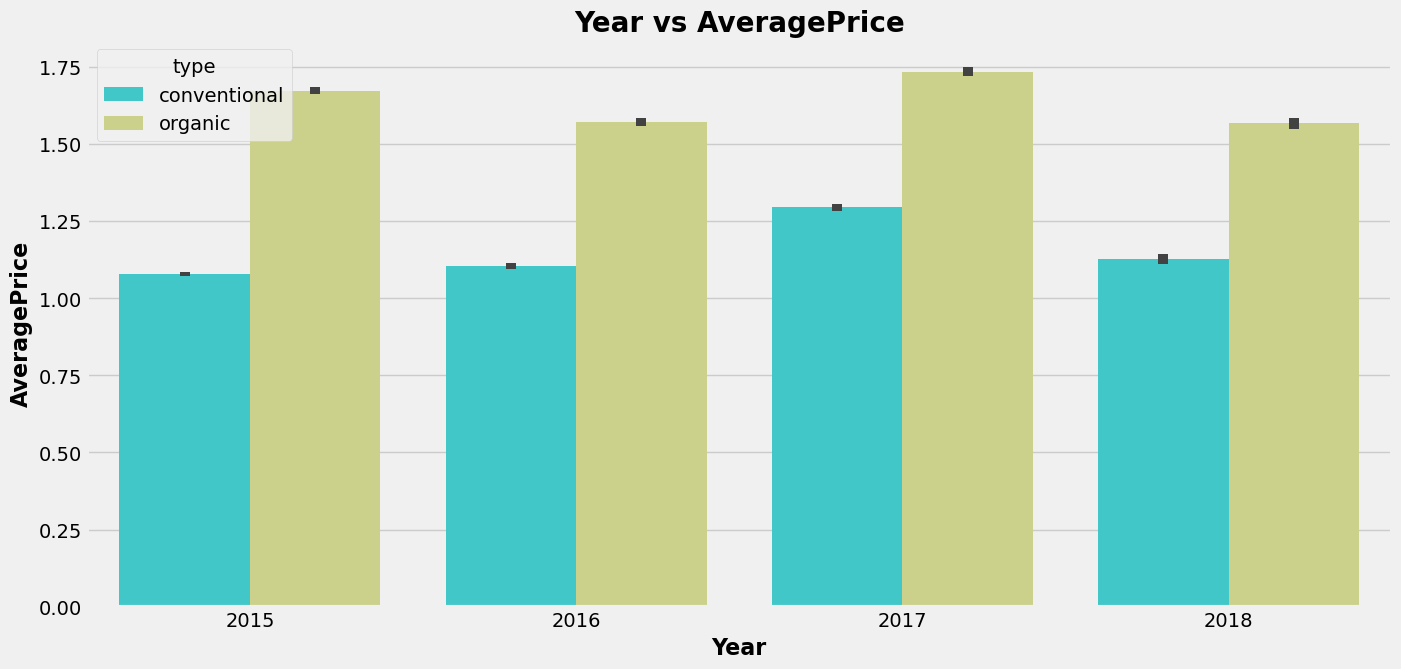

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(df['Year'], df['AveragePrice'],hue=df["type"], palette = 'rainbow')
plt.title('Year vs AveragePrice',fontsize=20,fontweight ='bold')
plt.xlabel('Year', fontsize=16,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=16,fontweight='bold')
plt.show()

#### Observations:
- **In all the year, Price of Organic Avacado is higher than price of Conventional Avacado throughout the year, this could be due to less production**

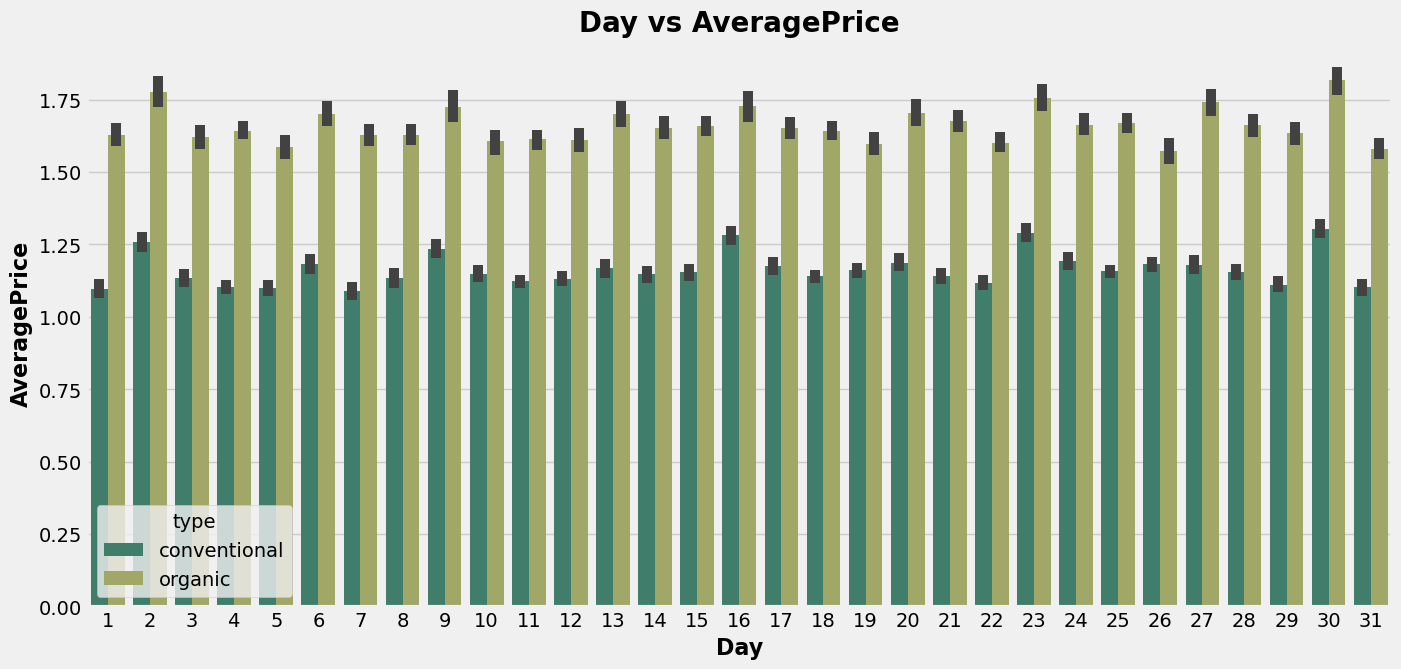

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(df['Day'], df['AveragePrice'],hue=df["type"],palette = 'gist_earth')
plt.title('Day vs AveragePrice',fontsize=20,fontweight ='bold')
plt.xlabel('Day', fontsize=16,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=16,fontweight='bold')
plt.show()

#### Observations:
- **Again, Price of Organic Avacado is higher than price of Conventional Avacado throughout the month**

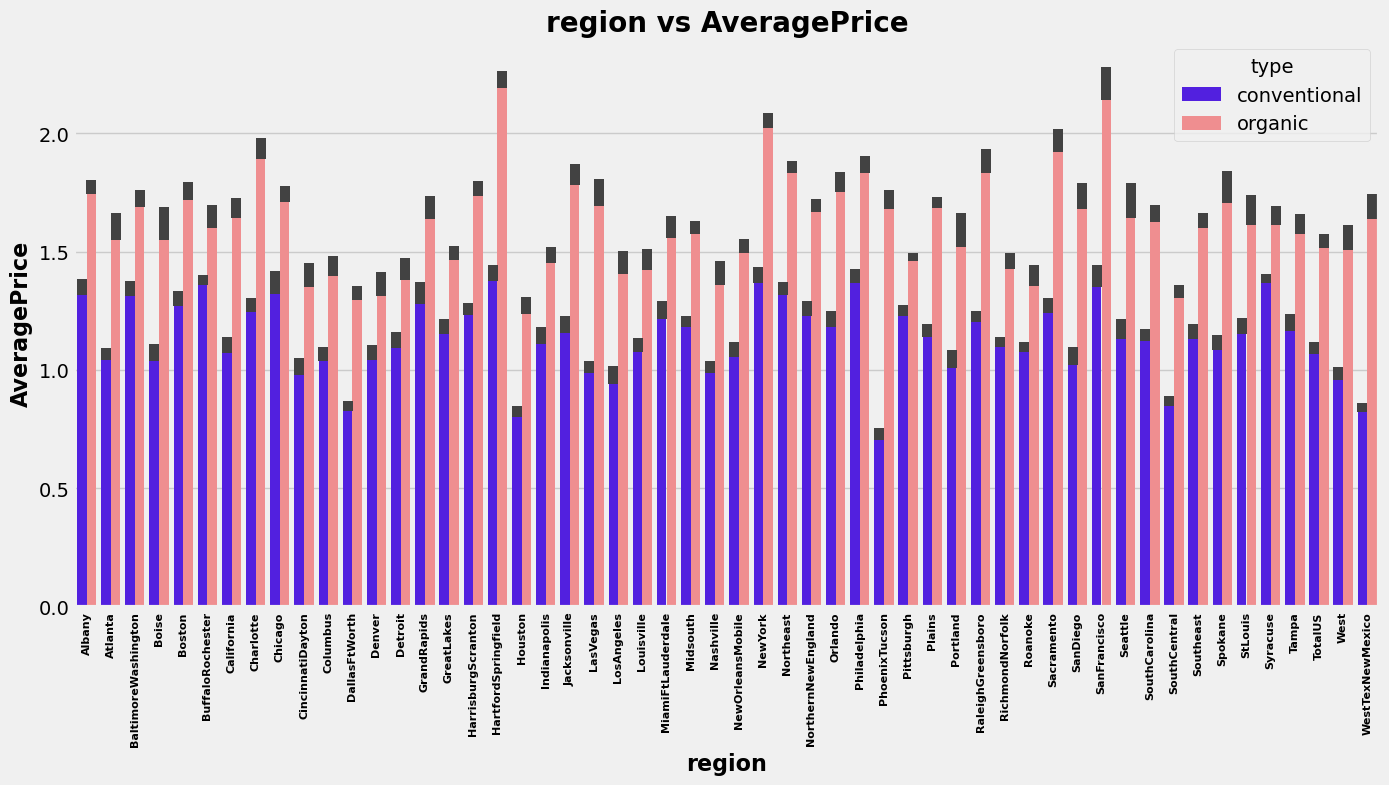

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(df['region'], df['AveragePrice'],hue=df["type"],palette='gnuplot2')
plt.title('region vs AveragePrice',fontsize=20,fontweight ='bold')
plt.xlabel('region', fontsize=16,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=16,fontweight='bold')
plt.xticks(fontsize=8,fontweight ='bold',rotation=90)  
plt.show()

#### Observations:
- **Organic Avacado price is higher in HartfordSpringfield and in SanFrancisco**
- **Conventional Avacado is higher in HartfordSpringfield**

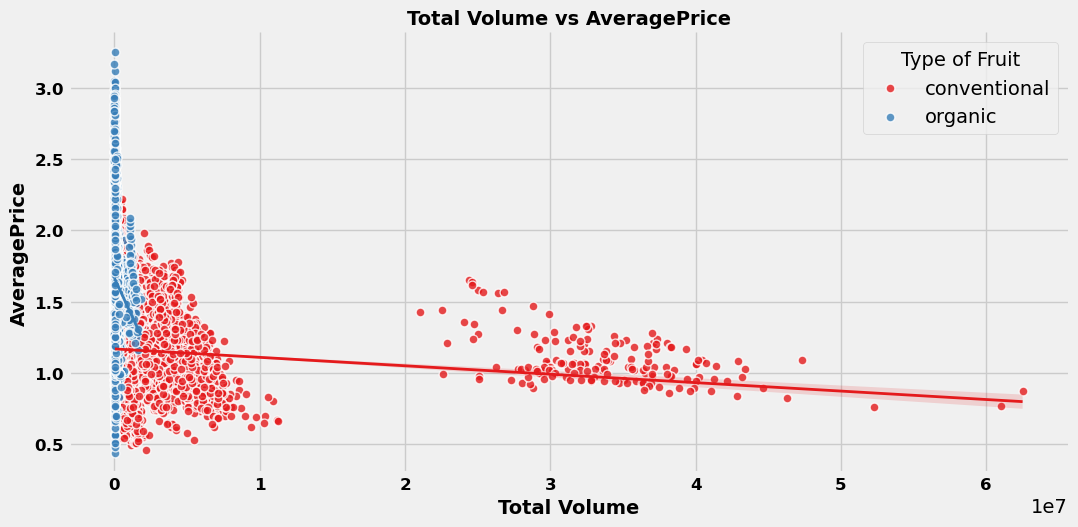

In [50]:
sns.lmplot(x="Total Volume",y="AveragePrice",hue="type",data= df, height=5.5, aspect=2,line_kws={'linewidth':2},palette = 'Set1',scatter_kws={"s": 40,'edgecolor':'w'},legend=False)
plt.title('Total Volume vs AveragePrice',fontsize=14,fontweight ='bold')
plt.xlabel('Total Volume', fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(title='Type of Fruit', fontsize='14', title_fontsize='14',loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations:
- **Average Price is reducing with increase in Total Volume of Sales**
- **Interestingly, Conventional Avacado type is being sold in higher volumes compared to Organic fruit, that means the demand is higher for converntial avacado and hence the produciton is higher, hence the lower price with increase in volume but the volume of organic avacado sold is less, this could be due to less production and hence the price is higher**

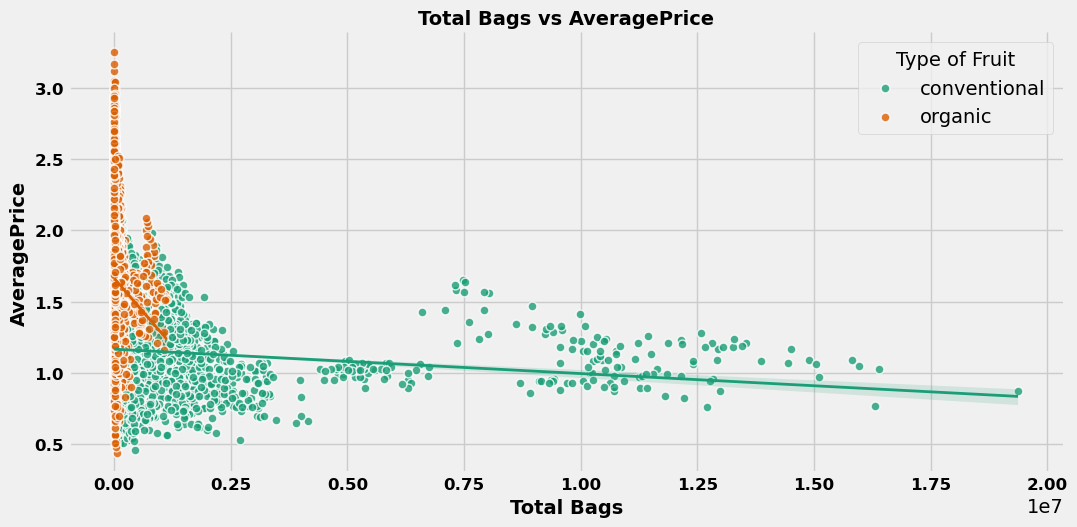

In [51]:
sns.lmplot(x="Total Bags",y="AveragePrice",hue="type",data= df, height=5.5, aspect=2,line_kws={'linewidth':2},palette = 'Dark2',scatter_kws={"s": 40,'edgecolor':'w'},legend=False)
plt.title('Total Bags vs AveragePrice',fontsize=14,fontweight ='bold')
plt.xlabel('Total Bags', fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(title='Type of Fruit', fontsize='14', title_fontsize='14',loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations:
- **Average Price is reducing with increase in Total Bags sold**
- **Total bags sold for Conventional Avacado type is higher compared to Organic, hence the average price is lower with increase in Total Bags sold**

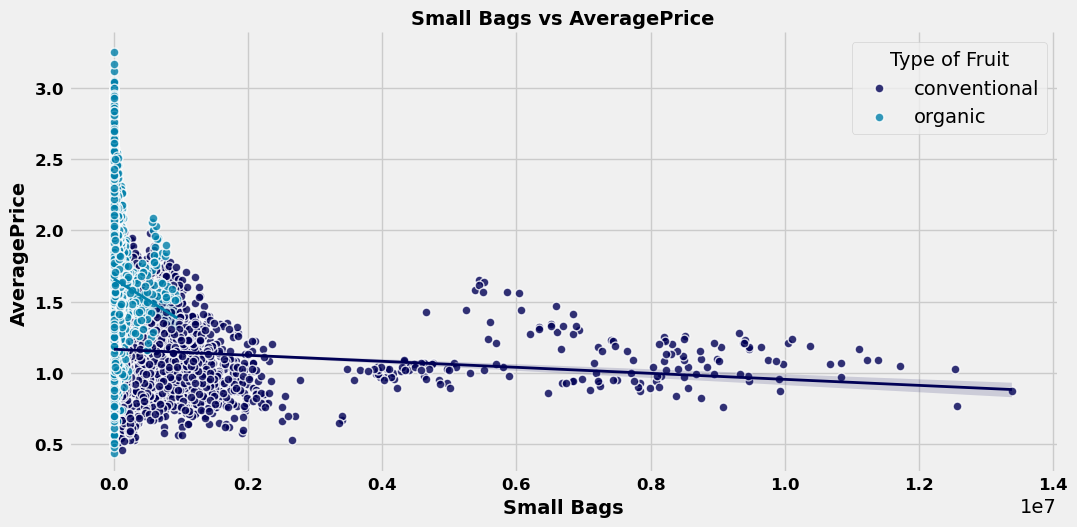

In [52]:
sns.lmplot(x="Small Bags",y="AveragePrice",hue="type",data= df, height=5.5, aspect=2,line_kws={'linewidth':2},palette = 'ocean',scatter_kws={"s": 40,'edgecolor':'w'},legend=False)
plt.title('Small Bags vs AveragePrice',fontsize=14,fontweight ='bold')
plt.xlabel('Small Bags', fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(title='Type of Fruit', fontsize='14', title_fontsize='14',loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations:
- **Average Price is reducing with increase in Small Bags sold**
- **Small bags sold for Conventional Avacado type is higher compared to Organic, hence the average price is lower with increase in Small Bags sold**

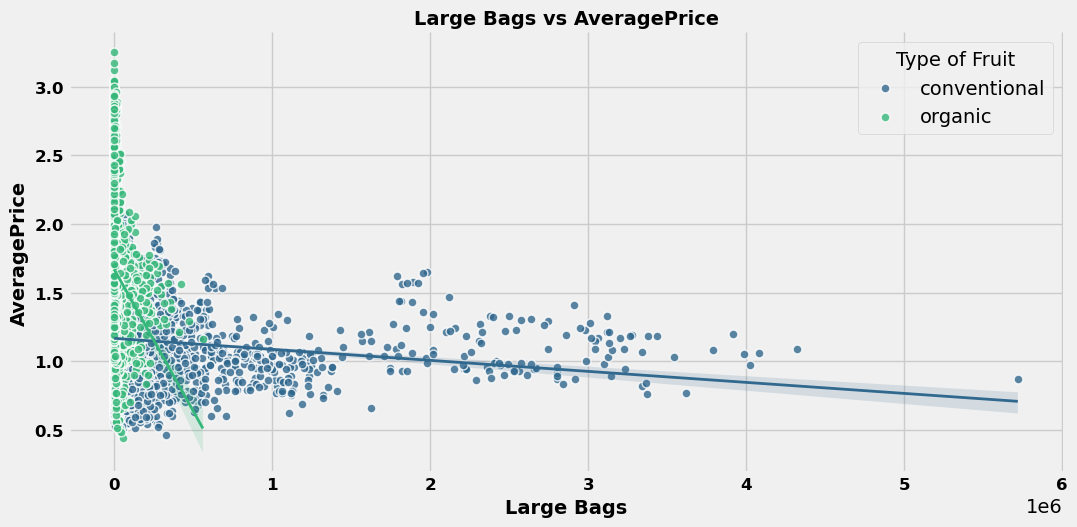

In [53]:
sns.lmplot(x="Large Bags",y="AveragePrice",hue="type",data= df, height=5.5, aspect=2,line_kws={'linewidth':2},palette = 'viridis',scatter_kws={"s": 40,'edgecolor':'w'},legend=False)
plt.title('Large Bags vs AveragePrice',fontsize=14,fontweight ='bold')
plt.xlabel('Large Bags', fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(title='Type of Fruit', fontsize='14', title_fontsize='14',loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations:
- **Average Price is reducing with increase in Large Bags sold**
- **Large bags sold for Conventional Avacado type is higher compared to Organic, hence the average price is lower with increase in Large Bags sold**

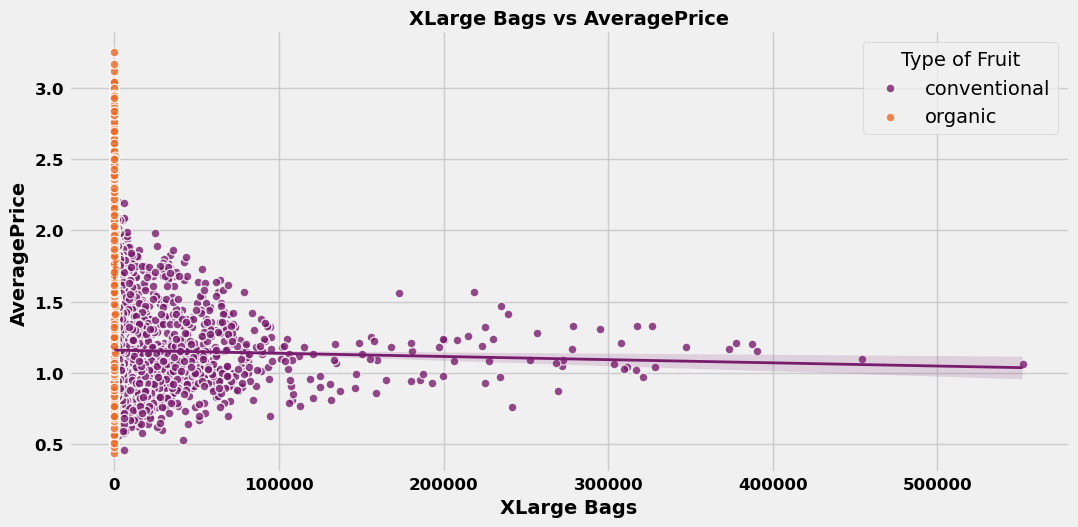

In [54]:
sns.lmplot(x="XLarge Bags",y="AveragePrice",hue="type",data= df, height=5.5, aspect=2,line_kws={'linewidth':2},palette = 'inferno',scatter_kws={"s": 40,'edgecolor':'w'},legend=False)
plt.title('XLarge Bags vs AveragePrice',fontsize=14,fontweight ='bold')
plt.xlabel('XLarge Bags', fontsize=14,fontweight='bold')
plt.ylabel('AveragePrice', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(title='Type of Fruit', fontsize='14', title_fontsize='14',loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations:
- **Average Price is reducing with increase in XLarge Bags sold**
- **XLarge bags sold for Conventional Avacado type is higher compared to Organic, hence the average price is lower with increase in XLarge Bags sold**

In [55]:
# dropping few columns for plotting purpose
df2=df1.drop(["Year","Month","Day","Date","type","region"],axis=1)
df2.head(2)

AveragePrice  Total Volume     4046      4225   4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85  48.16     8696.87   
1          1.35      54876.98   674.28  44638.81  58.33     9505.56   

   Small Bags  Large Bags  XLarge Bags  
0     8603.62       93.25          0.0  
1     9408.07       97.49          0.0

In [56]:
# sns.pairplot(df2)

In [57]:
# Dropping "Date" and "Day" columns from the dataframe as they are not important
df.drop(["Date","Day"],axis=1,inplace=True)

In [58]:
df.head(3)

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   

   Small Bags  Large Bags  XLarge Bags          type  region  Year  Month  
0     8603.62       93.25          0.0  conventional  Albany  2015     12  
1     9408.07       97.49          0.0  conventional  Albany  2015     12  
2     8042.21      103.14          0.0  conventional  Albany  2015     12

# Encoding of categorical features:

In [59]:
# Encoding needed for columns with string data to change string data to numerical format
df_encode=df[['type', 'region']].copy()
df_encode.head(3)

type  region
0  conventional  Albany
1  conventional  Albany
2  conventional  Albany

In [60]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_encode.columns:
    df[i] = le.fit_transform(df_encode[i])
df.head(3)

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   

   Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
0     8603.62       93.25          0.0     0       0  2015     12  
1     9408.07       97.49          0.0     0       0  2015     12  
2     8042.21      103.14          0.0     0       0  2015     12

# Checking coefficients of correlation (r)

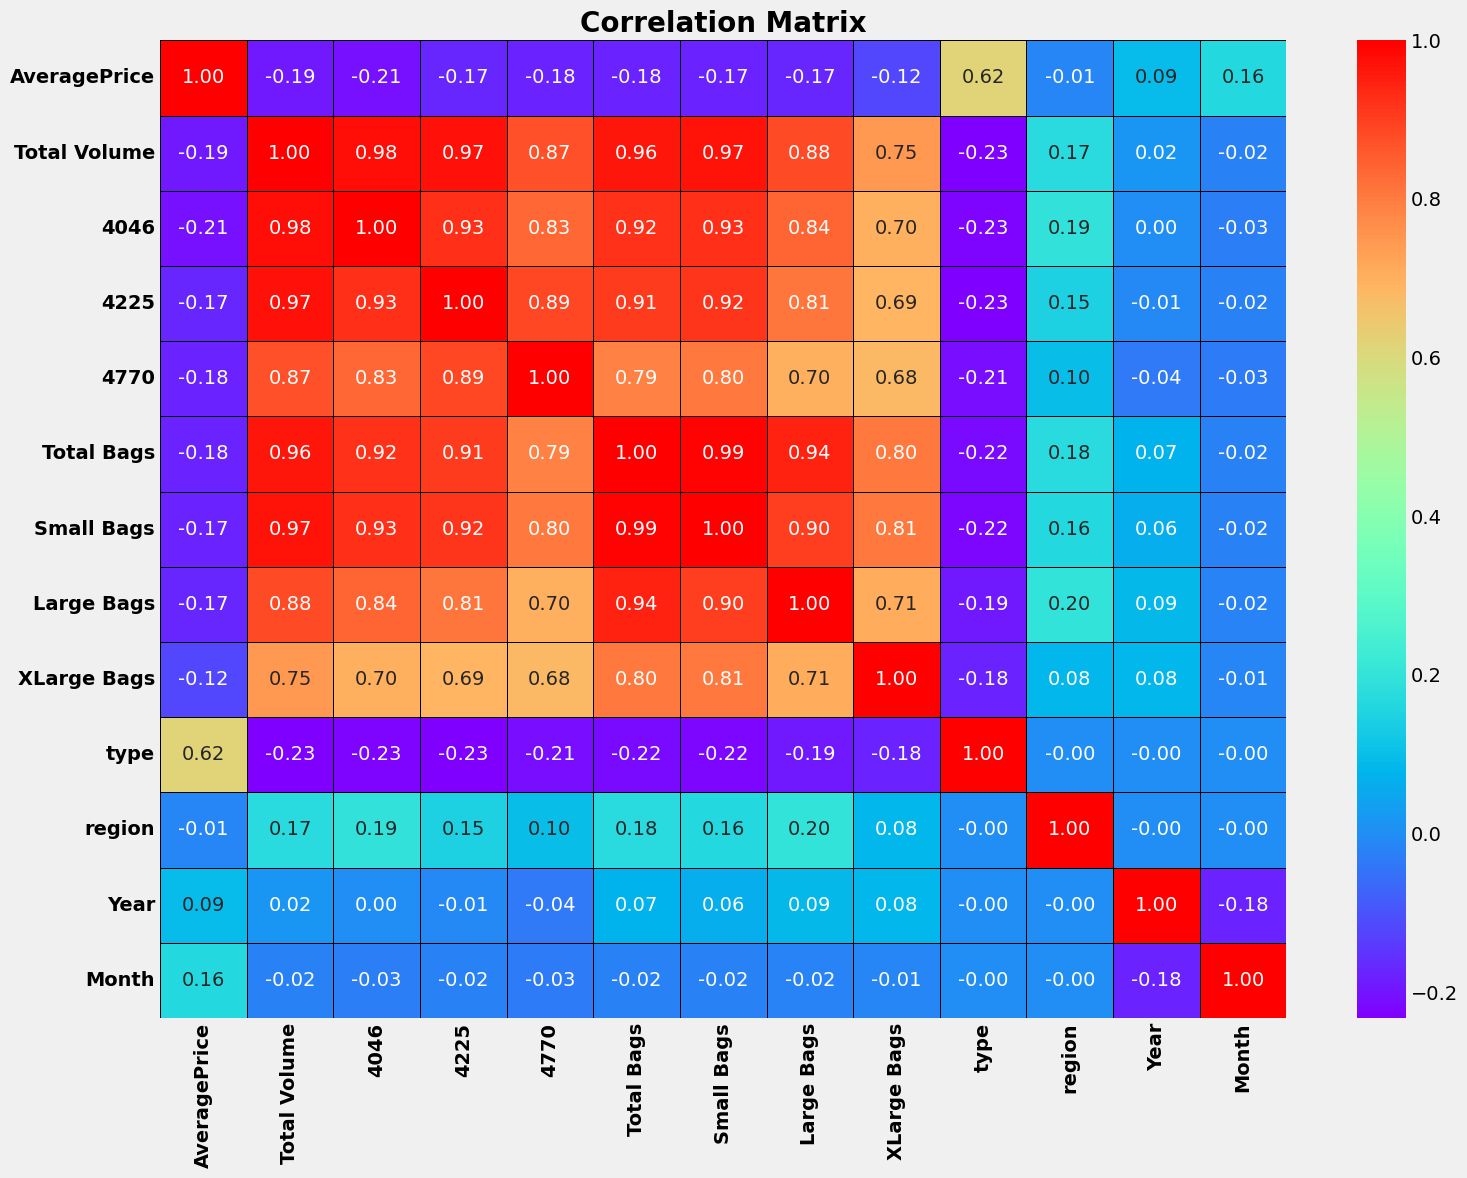

In [61]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix.jpg")
plt.show()

### Correlation check for Regression Task

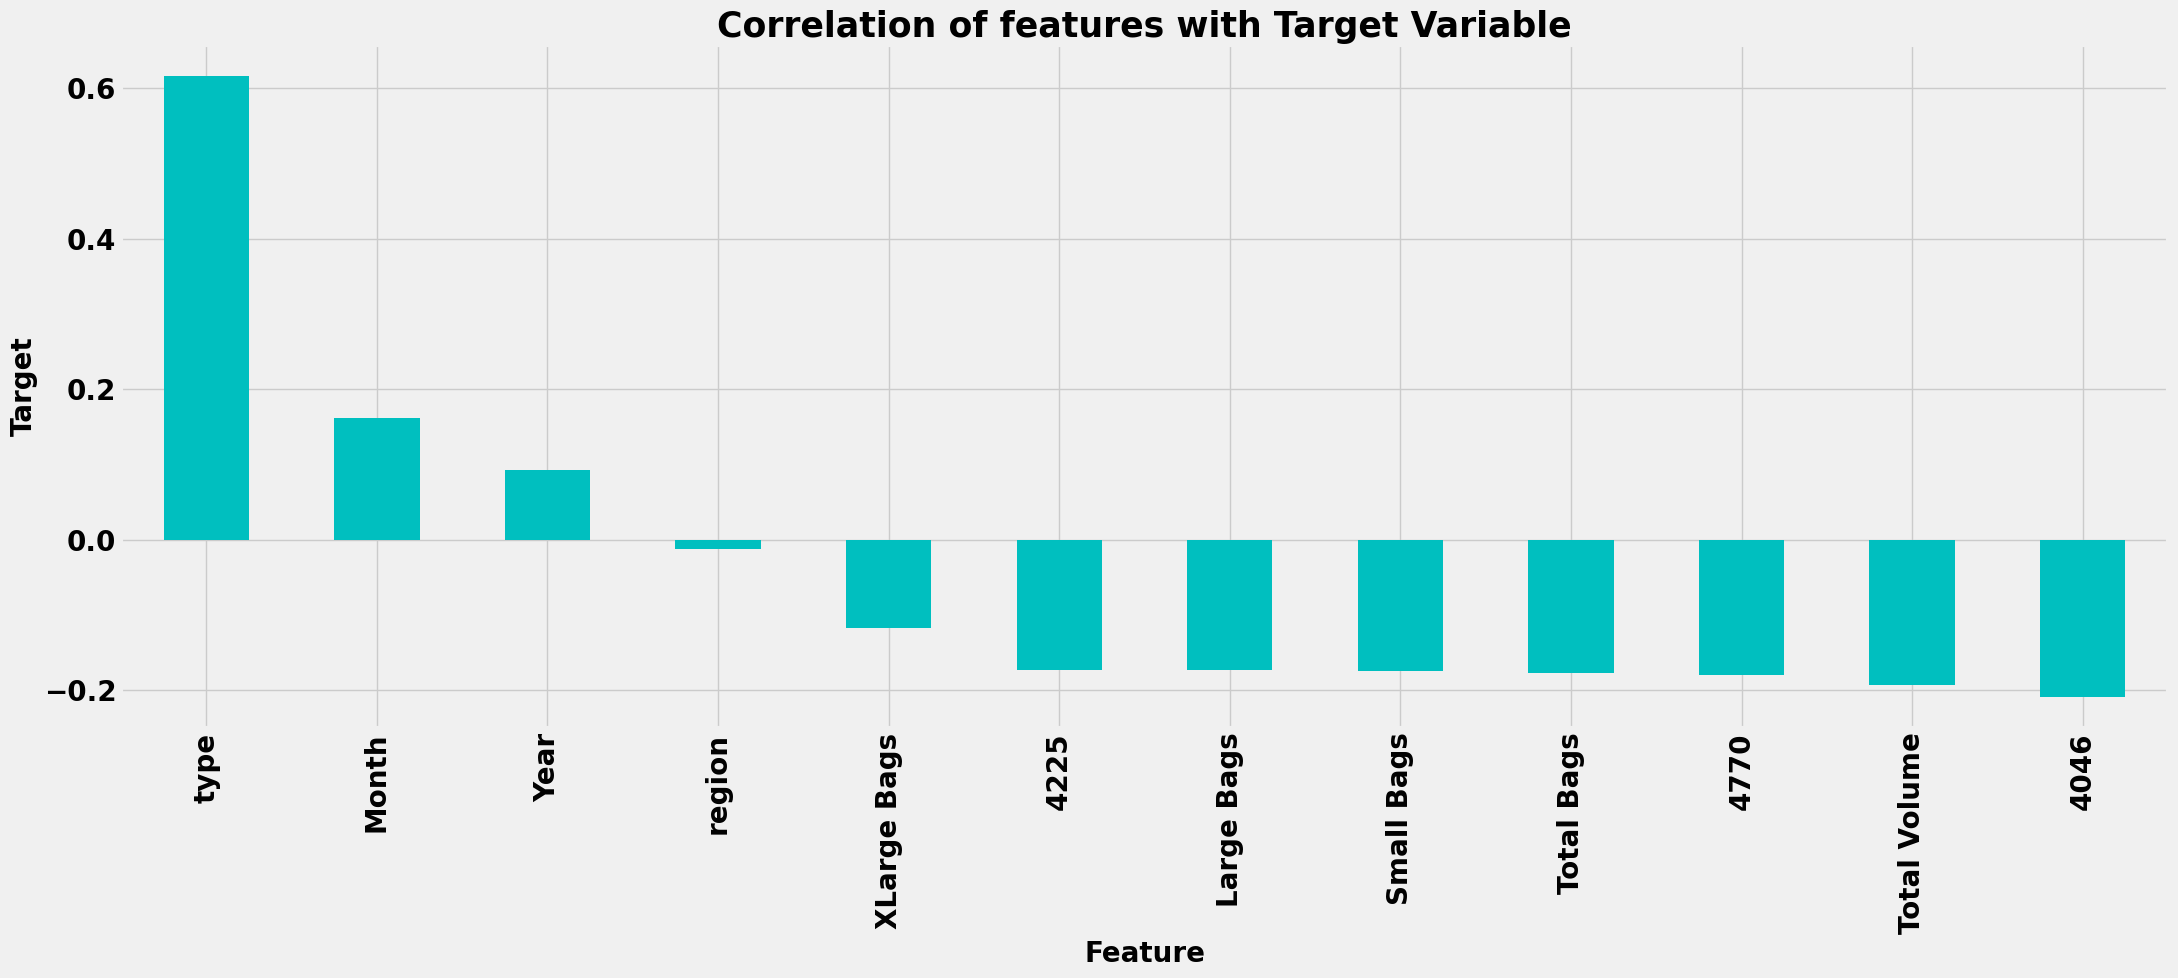

In [62]:
# For Regression Problem,
# Plotting the relationship of target variable (AveragePrice) with other variables in descending order
plt.figure(figsize=(22,10))
corr_r['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=20,fontweight ='bold',rotation=90)
plt.yticks(fontsize=20,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [63]:
corr_r["AveragePrice"].sort_values(ascending=False) 

AveragePrice    1.000000
type            0.615845
Month           0.162409
Year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

#### Observations for target variable "AveragePrice":
- **There are multiple features with weak and very weak corrleations**
- **Max +ve correlation: 'type'** 
- **Max -ve correlation: '4046'**
- **Typically we consider the coefficient of correlation between -0.3 to 0.3 as weak correlation**
- **Considering -0.15 to 0.15 range as very weak correlation with target variable and will remove features with the coefficient of correlation in this range**
- **I will check feature scores from SelectKBest algorithm with F-regression test and will check if any features have lower score to take futher decisions.**

In [64]:
# Identifying very weak correlations for regression problem
very_weak_corr_reg=df.corr()[(df.corr()["AveragePrice"]< 0.15) & (df.corr()["AveragePrice"]> -0.15)].index
very_weak_corr_reg.shape

(3,)

In [65]:
weak_col_reg=pd.DataFrame({"Very Weak Columns for Regression Problem":very_weak_corr_reg})
display(weak_col_reg)

Very Weak Columns for Regression Problem
0                              XLarge Bags
1                                   region
2                                     Year

### Correlation check for Classification Task

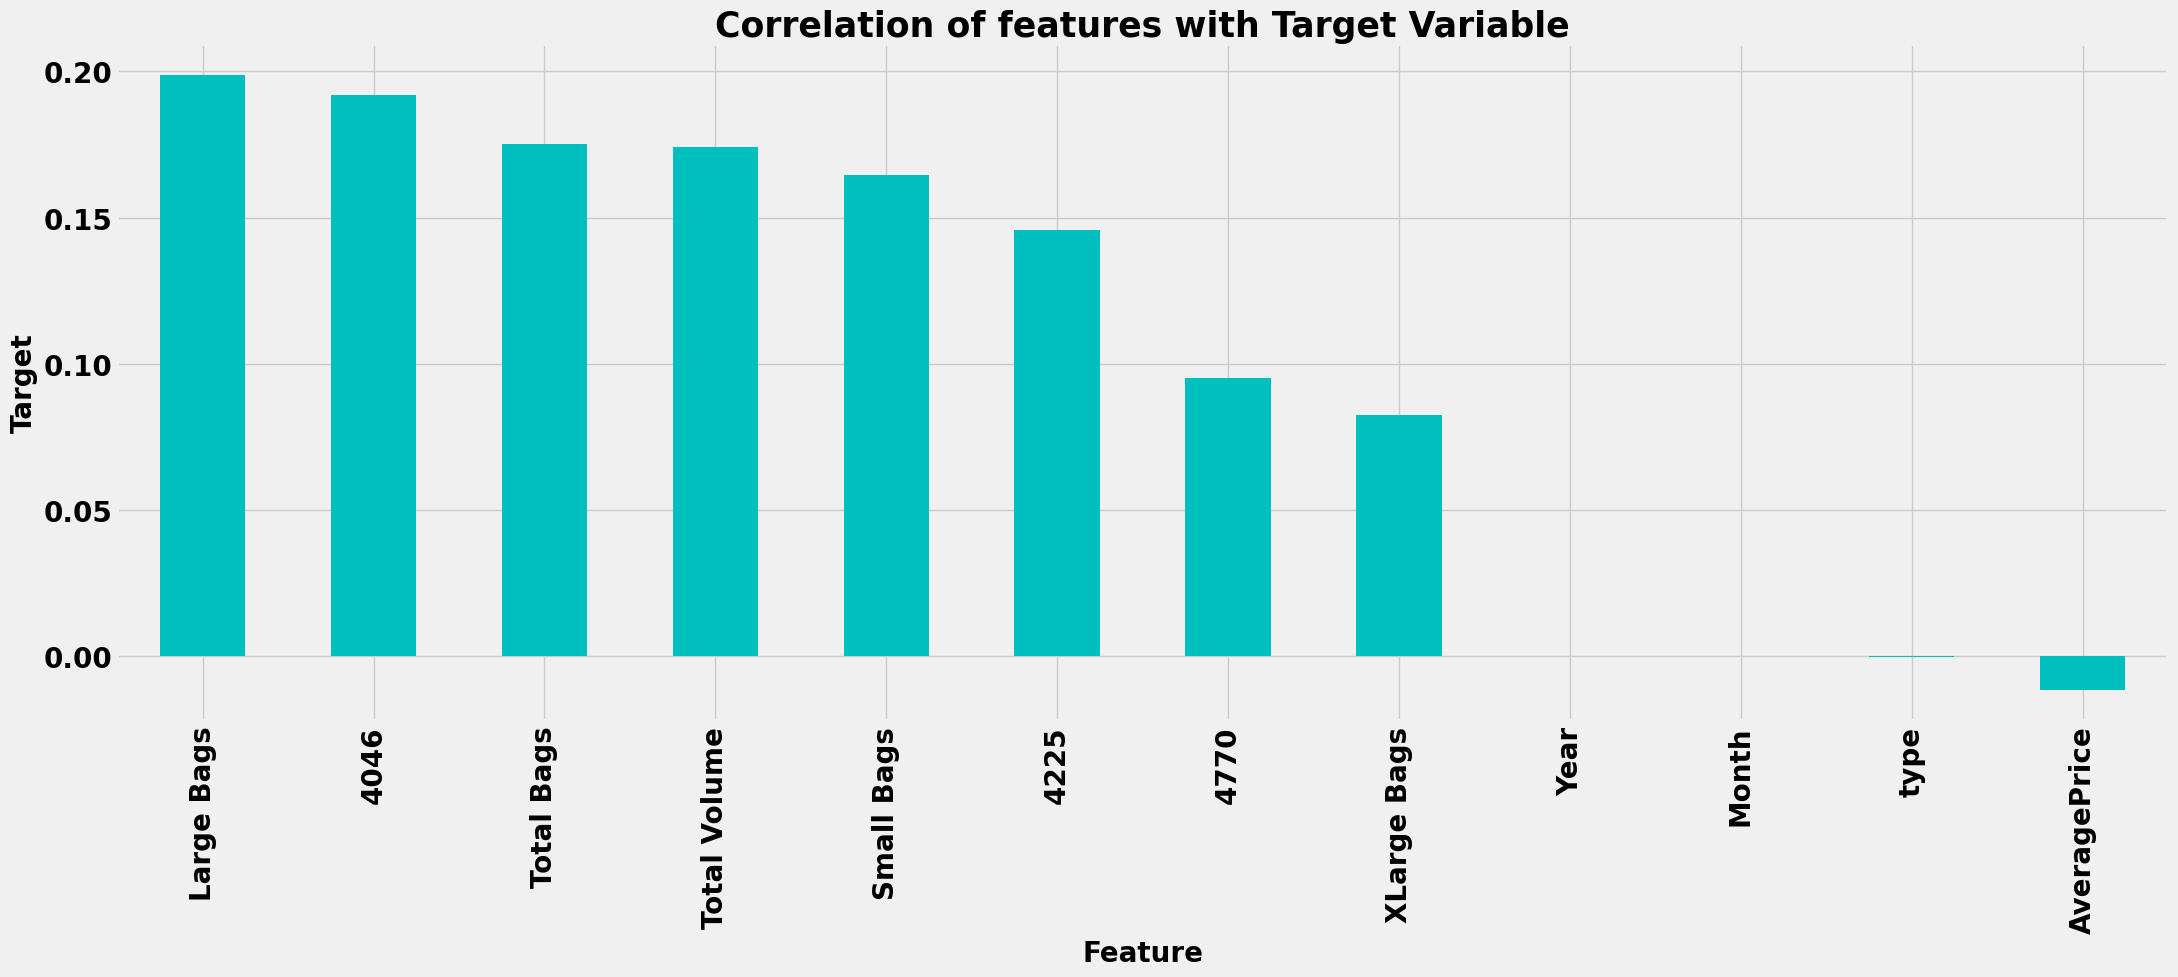

In [66]:
# For Classification Problem,
# Plotting the relationship of target variable (region) with other variables in descending order
plt.figure(figsize=(22,10))
corr_r['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=20,fontweight ='bold',rotation=90)
plt.yticks(fontsize=20,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [67]:
corr_r["region"].sort_values(ascending=False) 

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
Year           -0.000055
Month          -0.000144
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

#### Observations for target variable "region":
- **There are multiple features with weak and very weak corrleations**
- **Max +ve correlation: 'Large Bags'** 
- **Max -ve correlation: 'AveragePrice'**
- **Typically we consider the coefficient of correlation between -0.3 to 0.3 as weak correlation**
- **Considering -0.05 to 0.05 range as very weak correlation with target variable and will remove features with the coefficient of correlation in this range**
- **I will check feature scores from SelectKBest algorithm with Chi-Square test and will check if any features have lower score to take futher decisions.**

In [68]:
# Identifying very weak correlations for classification problem
very_weak_corr_clas=df.corr()[(df.corr()["region"]< 0.05) & (df.corr()["region"]> -0.05)].index
very_weak_corr_clas.shape

(4,)

In [69]:
weak_col_clas=pd.DataFrame({"Very Weak Columns for Classification Problem":very_weak_corr_clas})
display(weak_col_clas)

Very Weak Columns for Classification Problem
0                                 AveragePrice
1                                         type
2                                         Year
3                                        Month

## Checking top features using SelectKBest algorithm - Regression

In [70]:
import pandas as pd
import numpy as np

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


x=df.drop("AveragePrice",axis=1)  #independent columns
y=df["AveragePrice"]  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')  # Using f_regression test to check the relationship of features with Y categorical data
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores_reg = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_reg.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores_reg=featureScores_reg.nlargest(20,'Score')  #Top 20 features
SelectKBest_scores_reg.reset_index(drop=True)  # displyaing top 20 features and scores

Specs         Score
0           type  11148.793695
1           4046    827.768515
2   Total Volume    704.099343
3           4770    607.118864
4     Total Bags    590.754513
5     Small Bags    574.633842
6     Large Bags    562.560996
7           4225    562.478931
8          Month    494.331125
9    XLarge Bags    255.853569
10          Year    159.876196
11        region      2.505131

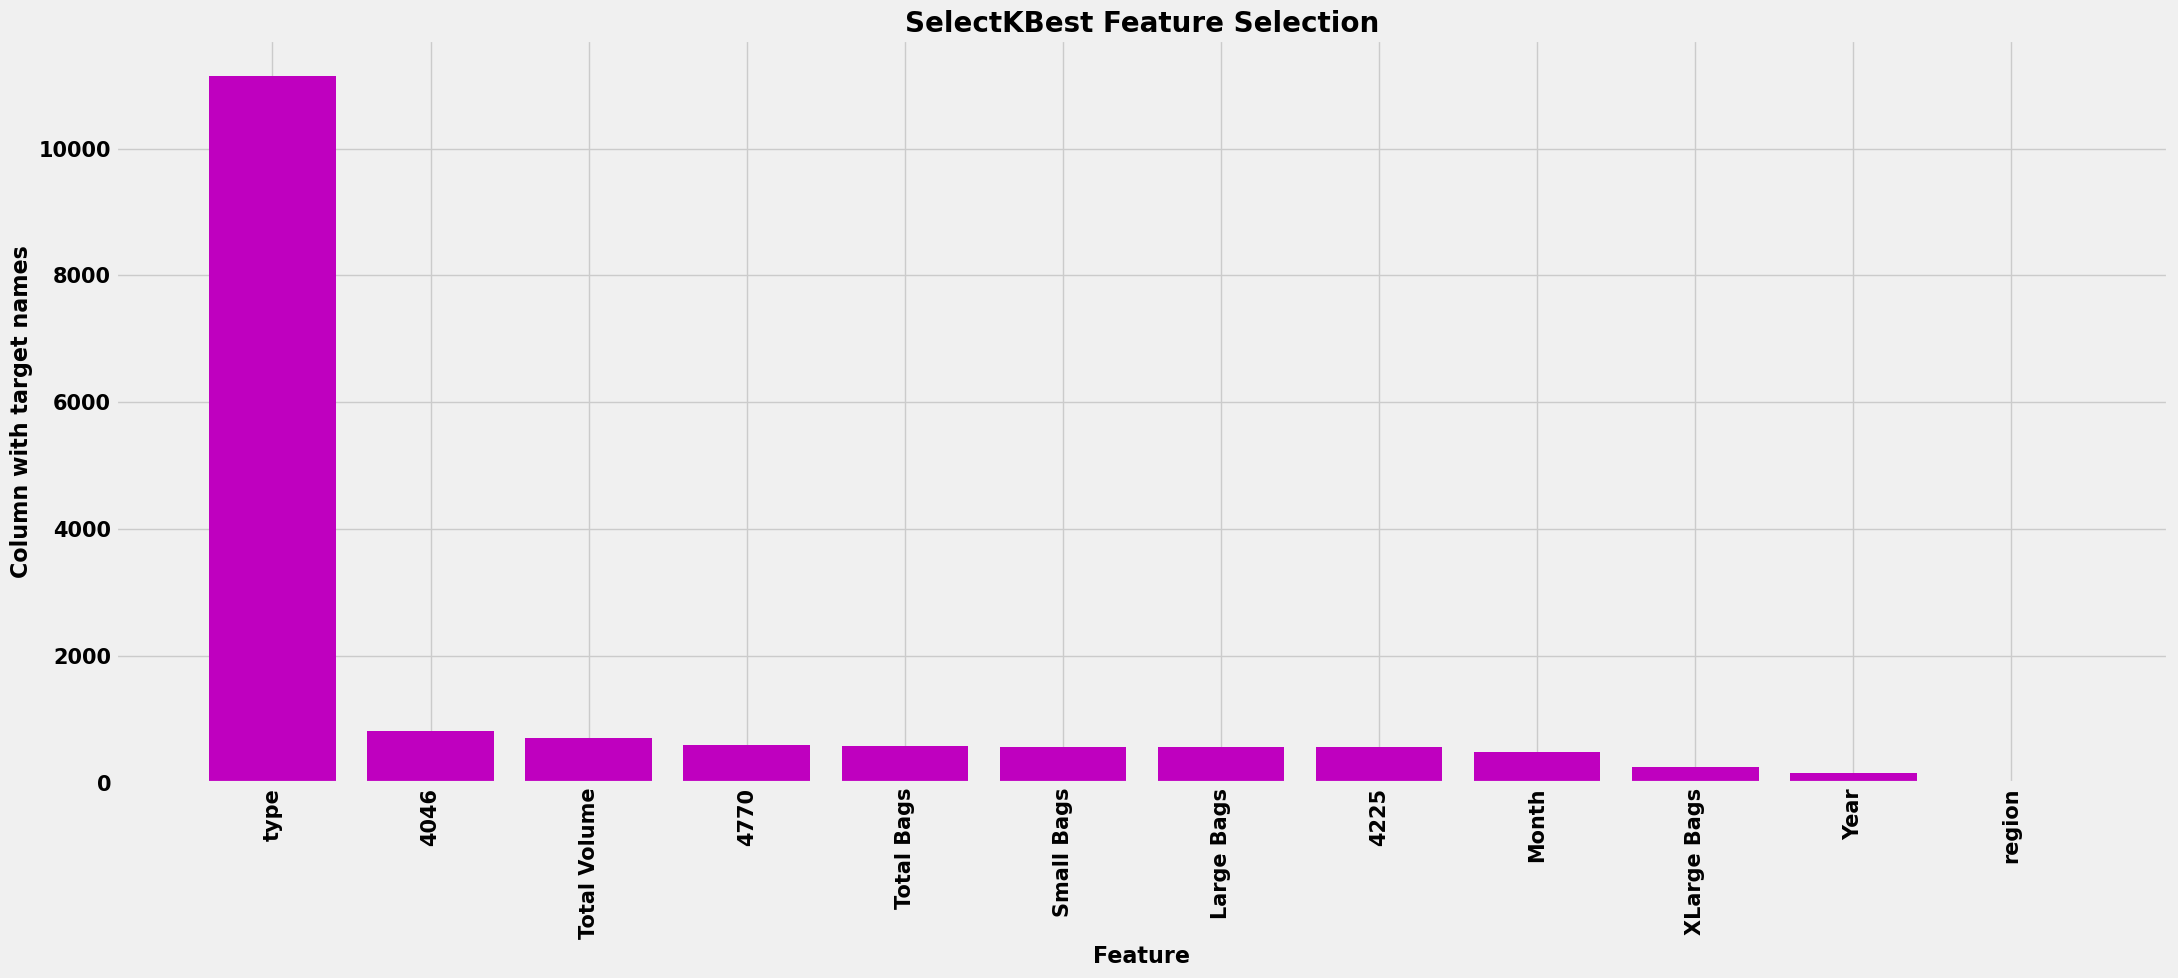

In [71]:
# Plotting the score values in descending order
df_sorted_desc= featureScores_reg.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Column with target names",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [72]:
# Identifying columns to be dropped by checking the selectKBest scores of very weak correlations
# In this case, considered threshold of 300 for Score.
drop_col=[]
for i in range(len(very_weak_corr_reg)):
    if (SelectKBest_scores_reg["Score"][SelectKBest_scores_reg["Specs"]==very_weak_corr_reg[i]].item())<300:
        drop_col.append(very_weak_corr_reg[i])
print(len(drop_col))
df_drop_col_reg=pd.DataFrame({"Drop_Columns":drop_col})
display(df_drop_col_reg)  # displaying the dropped columns

3


Drop_Columns
0  XLarge Bags
1       region
2         Year

In [73]:
#Dropping the identified Columns and creating the dataframe for regression problem
for i in range(len(df_drop_col_reg)):
    df_reg=df.drop(["XLarge Bags","region","Year"],axis=1)
print(df_reg.shape)
df_reg.head(3)

(18249, 10)


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   

   Small Bags  Large Bags  type  Month  
0     8603.62       93.25     0     12  
1     9408.07       97.49     0     12  
2     8042.21      103.14     0     12

## Checking top features using SelectKBest algorithm - Classification

In [74]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x=df.drop("region",axis=1)  #independent columns
y=df["region"]  # Output variable

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores_clas = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_clas.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores_clas=featureScores_clas.nlargest(20,'Score')  #Top 20 features
SelectKBest_scores_clas.reset_index(drop=True)  # displyaing top 20 features and scores

Specs         Score
0   Total Volume  1.232416e+11
1           4046  4.609854e+10
2           4225  4.245149e+10
3     Total Bags  3.424210e+10
4     Small Bags  2.595946e+10
5     Large Bags  8.513930e+09
6           4770  3.481693e+09
7    XLarge Bags  4.859171e+08
8   AveragePrice  3.538246e+02
9          Month  1.418034e-02
10          type  1.318842e-02
11          Year  4.496438e-07

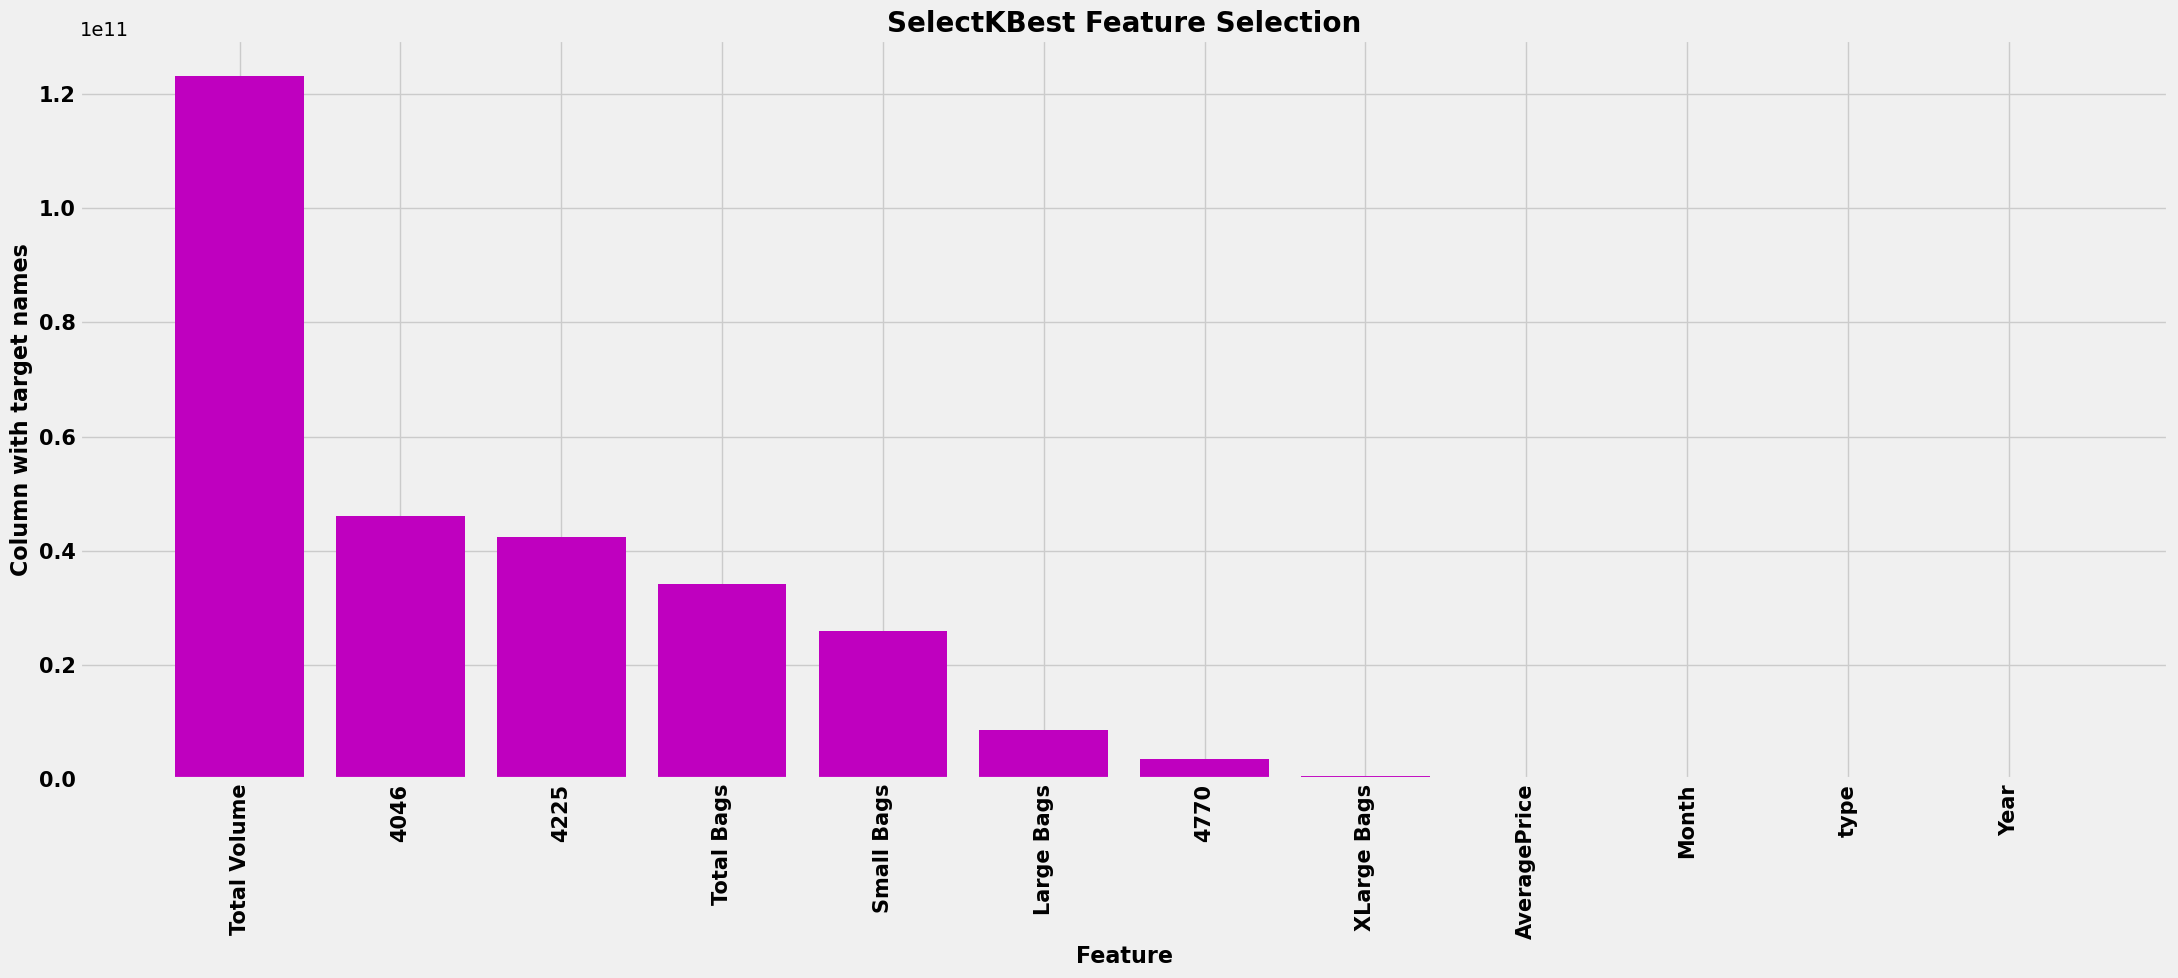

In [75]:
# Plotting the score values in descending order
df_sorted_desc= featureScores_clas.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Column with target names",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [76]:
# Identifying columns to be dropped by checking the selectKBest scores of very weak correlations
# In this case, considered threshold of 400 
drop_col=[]
for i in range(len(very_weak_corr_clas)):
    if (SelectKBest_scores_clas["Score"][SelectKBest_scores_clas["Specs"]==very_weak_corr_clas[i]].item())<400:
        drop_col.append(very_weak_corr_clas[i])
print(len(drop_col))
df_drop_col_clas=pd.DataFrame({"Drop_Columns":drop_col})
display(df_drop_col_clas)  # displaying the dropped columns

4


Drop_Columns
0  AveragePrice
1          type
2          Year
3         Month

In [77]:
#Dropping the identified Columns and creating the dataframe for classification problem
for i in range(len(df_drop_col_clas)):
    df_clas=df.drop(["AveragePrice","type","Year","Month"],axis=1)
print(df_clas.shape)
df_clas.head(3)

(18249, 9)


Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   

   Large Bags  XLarge Bags  region  
0       93.25          0.0       0  
1       97.49          0.0       0  
2      103.14          0.0       0

## To ease EDA, from here onwards, treating regression and classificatin problems seperately

# REGRESSION EDA (To Be Continued)

In [78]:
# Checking Multicollinearity between features using variance_inflation_factor (VIF)
# We calculate VIF only for numerical data as the variance is applicable only for numerical data

In [79]:
# Identifying the columns with numerical data after dropping the columns identified in previous steps

In [80]:
df_reg.head(3)

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   

   Small Bags  Large Bags  type  Month  
0     8603.62       93.25     0     12  
1     9408.07       97.49     0     12  
2     8042.21      103.14     0     12

In [81]:
df_reg_numerical=df_reg.drop(["type","AveragePrice"],axis=1)
df_reg_numerical.head(3)

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   

   Large Bags  Month  
0       93.25     12  
1       97.49     12  
2      103.14     12

In [82]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_reg_numerical[list(df_reg_numerical.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF        Column
0  5.202522e+09  Total Volume
1  6.933791e+08          4046
2  6.320936e+08          4225
4  4.234721e+08    Total Bags
3  4.963925e+06          4770
5  6.846646e+03    Small Bags
6  6.772412e+02    Large Bags
7  1.044051e+00         Month

#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As there are multiple features with VIF values > 10, I will use PCA to reduce the no. of features at the end of EDA before model building**

### Checking Outliers

In [83]:
# We check outliers on numerical data
df_outliers=df_reg_numerical.copy()
df_outliers.head(5)

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3      78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4      51039.60   941.48   43838.39   75.78     6183.95     5986.26   

   Large Bags  Month  
0       93.25     12  
1       97.49     12  
2      103.14     12  
3      133.76     12  
4      197.69     11

In [84]:
df_outliers.shape

(18249, 8)

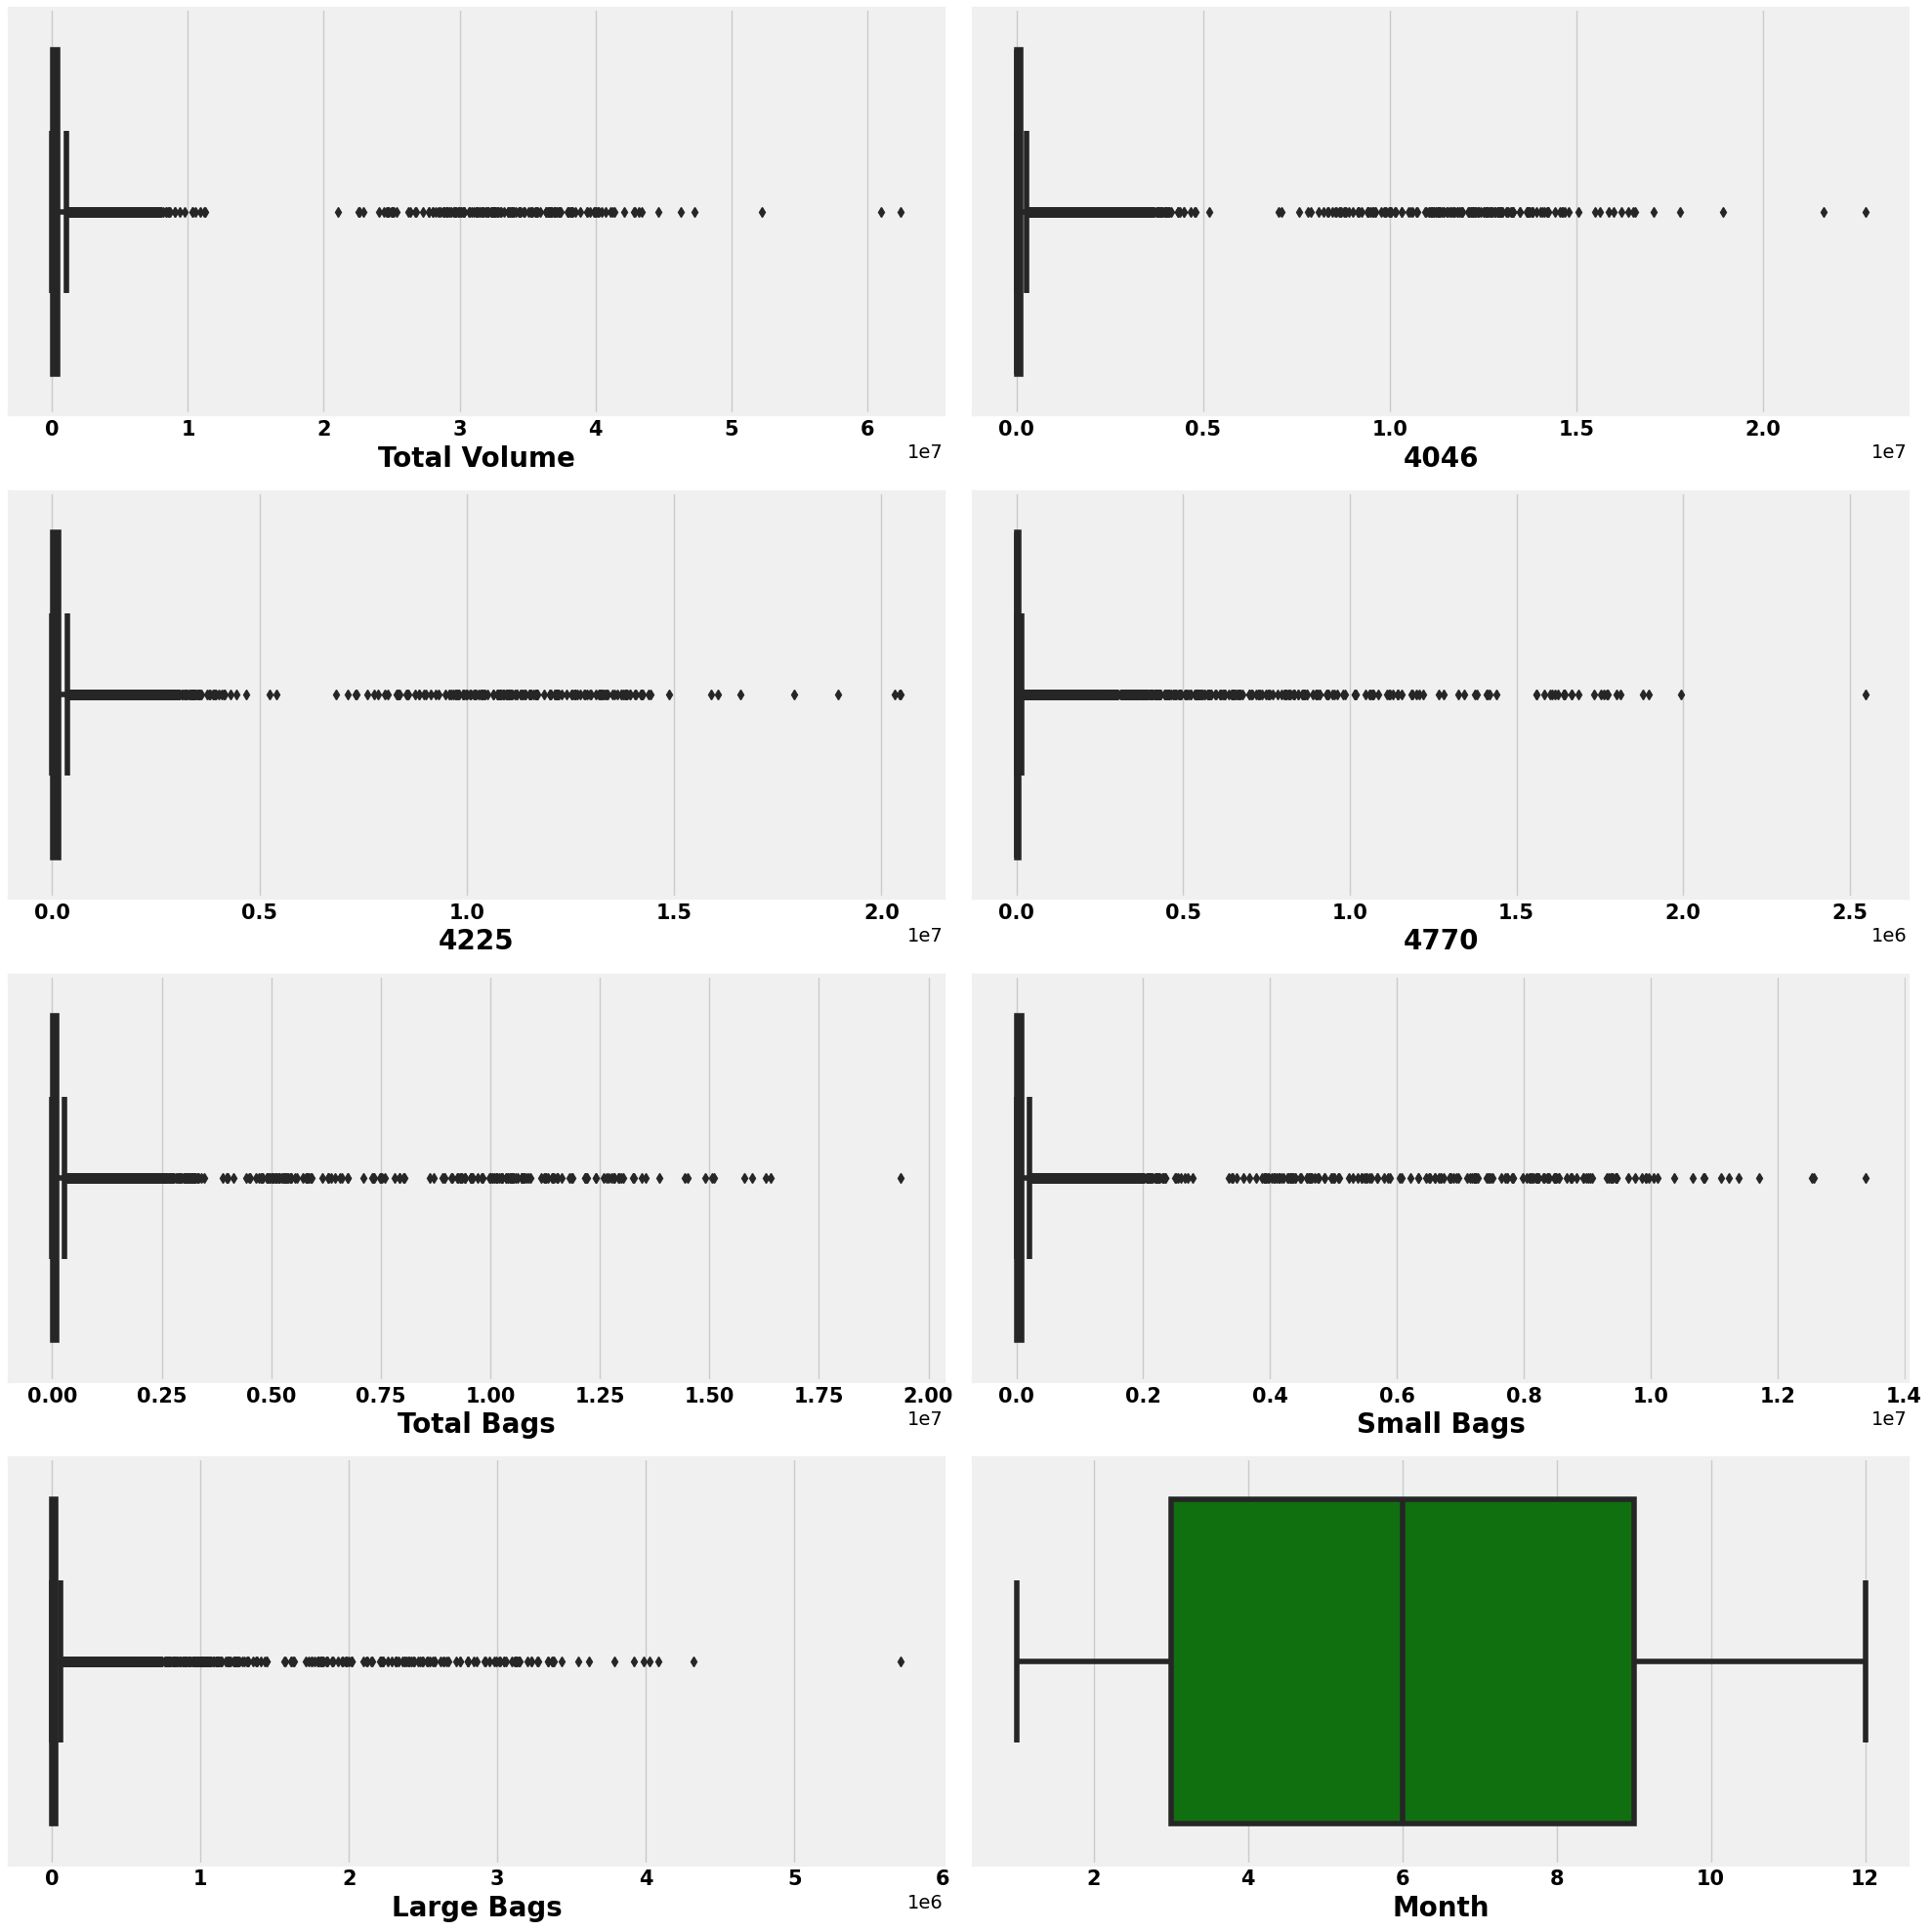

In [85]:
# Checking outliers visually before removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_reg[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in all the columns except Month**

### Removing Outliers using z-score method

In [86]:
df_outliers.shape

(18249, 8)

In [87]:
df_reg.shape

(18249, 10)

In [88]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([ 346,  359,  783, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 3, ..., 6, 6, 6], dtype=int64))

In [89]:
# Removing the rows in the dataframe where the outliers are present in x features with numerical data
df_reg_1=df_reg[(z<3).all(axis=1)]
df_outliers_del=df_outliers[(z<3).all(axis=1)]

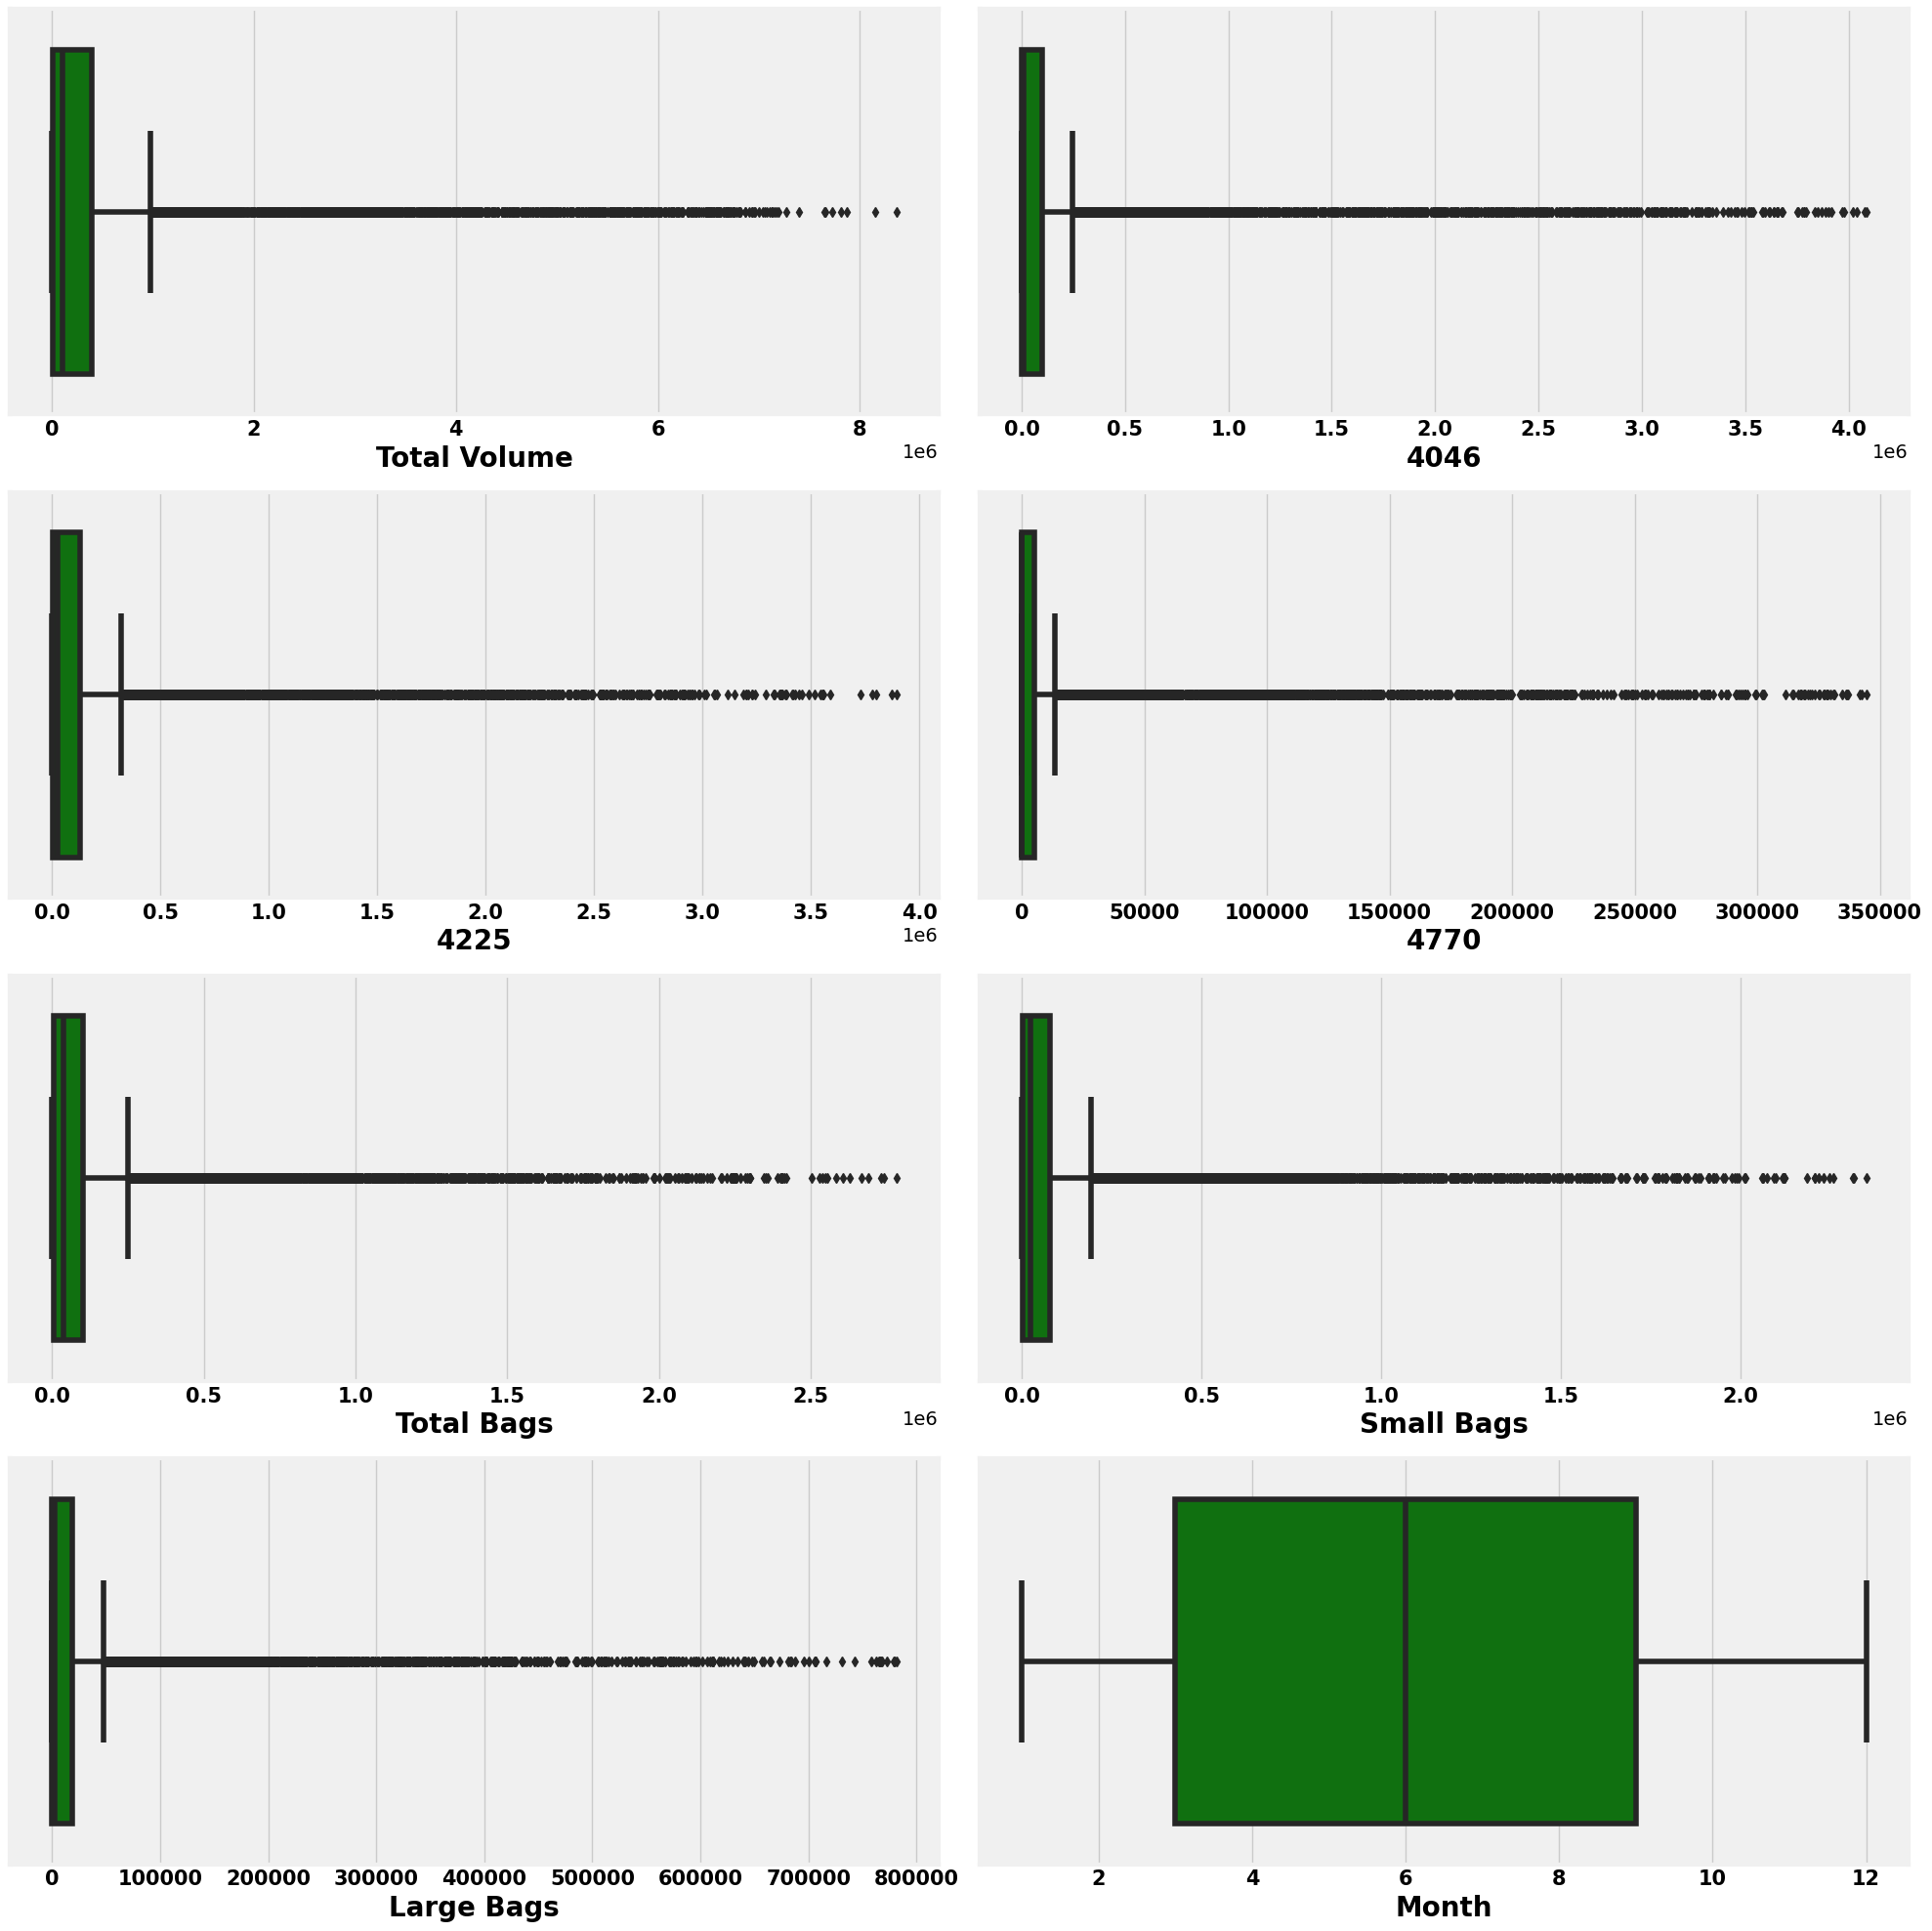

In [90]:
# Checking outliers visually after removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_del.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_reg_1[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features per z-score threshold**

In [91]:
df_reg_1.shape

(17867, 10)

In [92]:
df_reg.shape

(18249, 10)

In [93]:
# Data loss calculation with z-score method
loss_percent_zscore=round((df_reg.shape[0]-df_reg_1.shape[0])/df_reg.shape[0]*100,1)
loss_percent_zscore

2.1

#### Observations:
- **Data loss with z-score method is 2.1%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

### Removing Outliers using IQR method

In [94]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_outliers_upd = df_outliers[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_reg_2 = df_reg[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

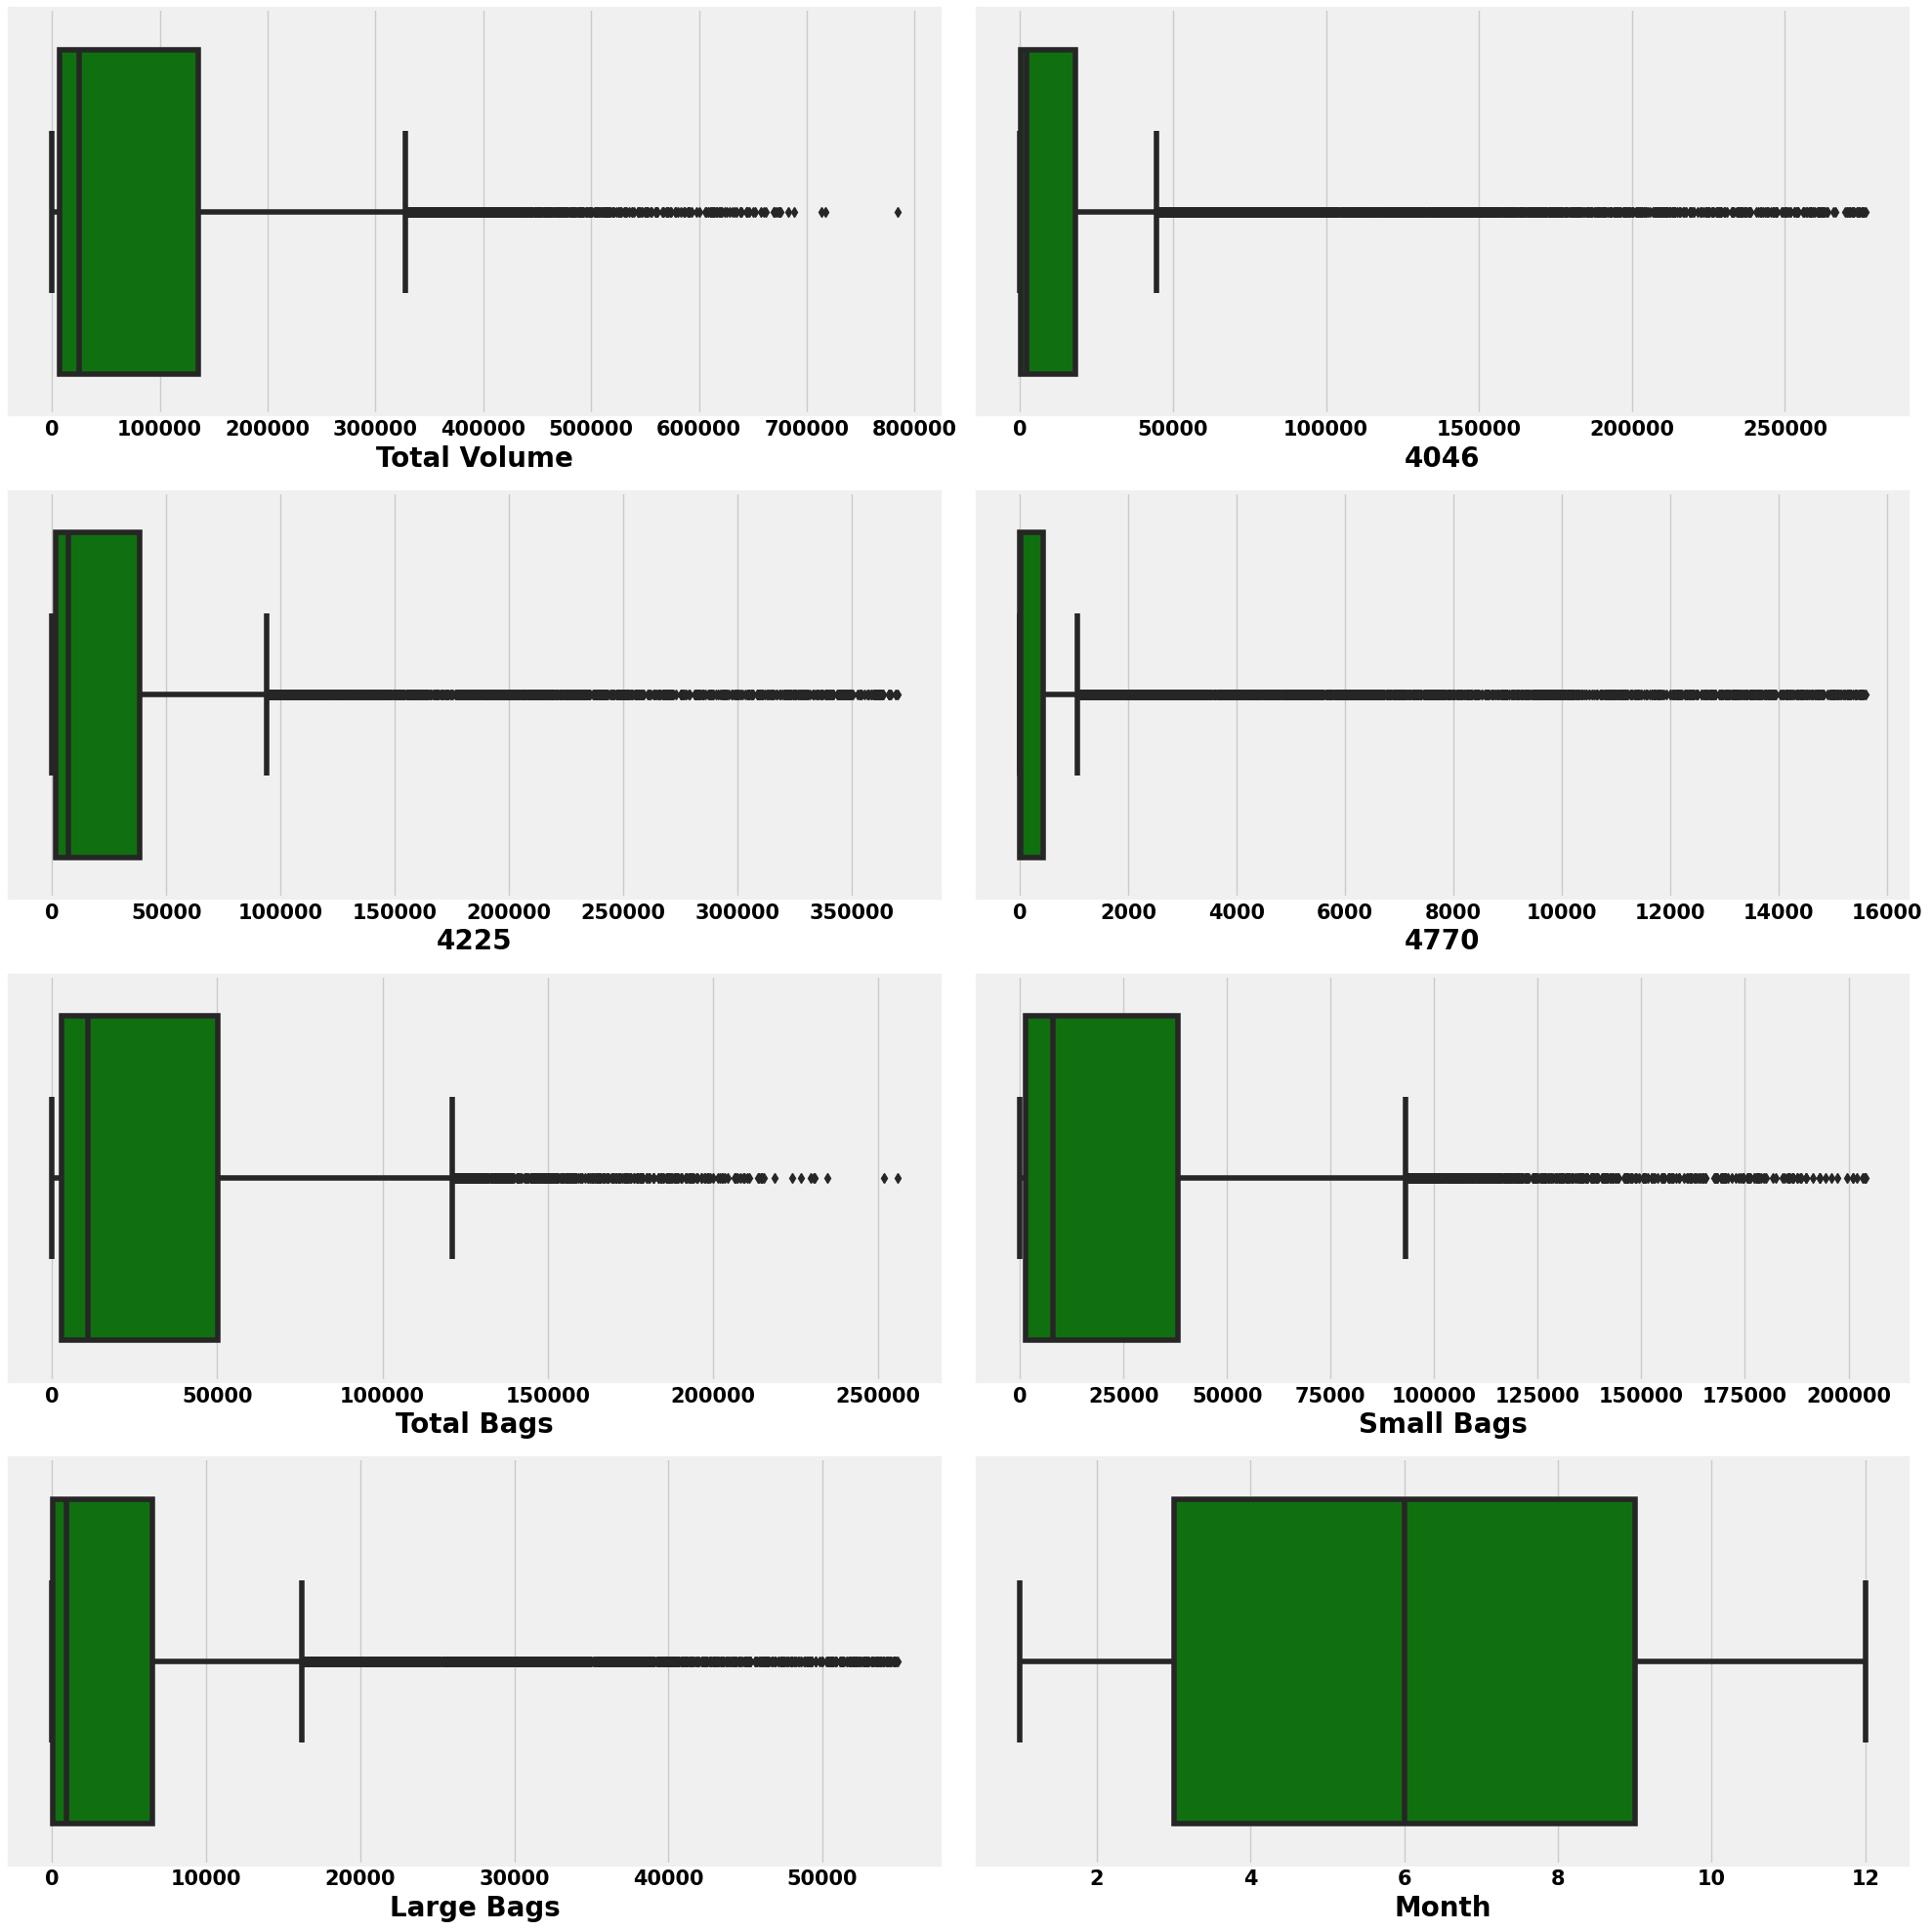

In [95]:
# Checking outliers visually after removing outliers using IQR method
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_upd.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_reg_2[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from all features based on IQR range**

In [96]:
df_reg_2.shape

(12965, 10)

In [97]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df_reg.shape[0]-df_reg_2.shape[0])/df_reg.shape[0]*100,1)
display(loss_percent_IQR)

29.0

#### Observations: 
- **Data loss with IQR is 29.0% which is higher than data loss with z-score (2.1%). Data loss with z-score method is < 10% which is acceptable hence considering x & y data after removing outliers using zscore method for model building**

In [98]:
df_reg_1.head(3)

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   

   Small Bags  Large Bags  type  Month  
0     8603.62       93.25     0     12  
1     9408.07       97.49     0     12  
2     8042.21      103.14     0     12

In [99]:
x_reg=df_reg_1.drop(['AveragePrice'],axis=1)
y_reg=df_reg_1["AveragePrice"].copy()
df_reg=df_reg_1

In [100]:
x_reg.head(3)

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   

   Large Bags  type  Month  
0       93.25     0     12  
1       97.49     0     12  
2      103.14     0     12

In [101]:
y_reg.head(3)

0    1.33
1    1.35
2    0.93
Name: AveragePrice, dtype: float64

### Skewness Check

In [102]:
# We don't remove skewness from categorical X data and from target variable hence checking skewness on X features with numerical data 
# Segregating numerical X features to check skewness
df_num=x_reg.drop(['type'],axis=1)

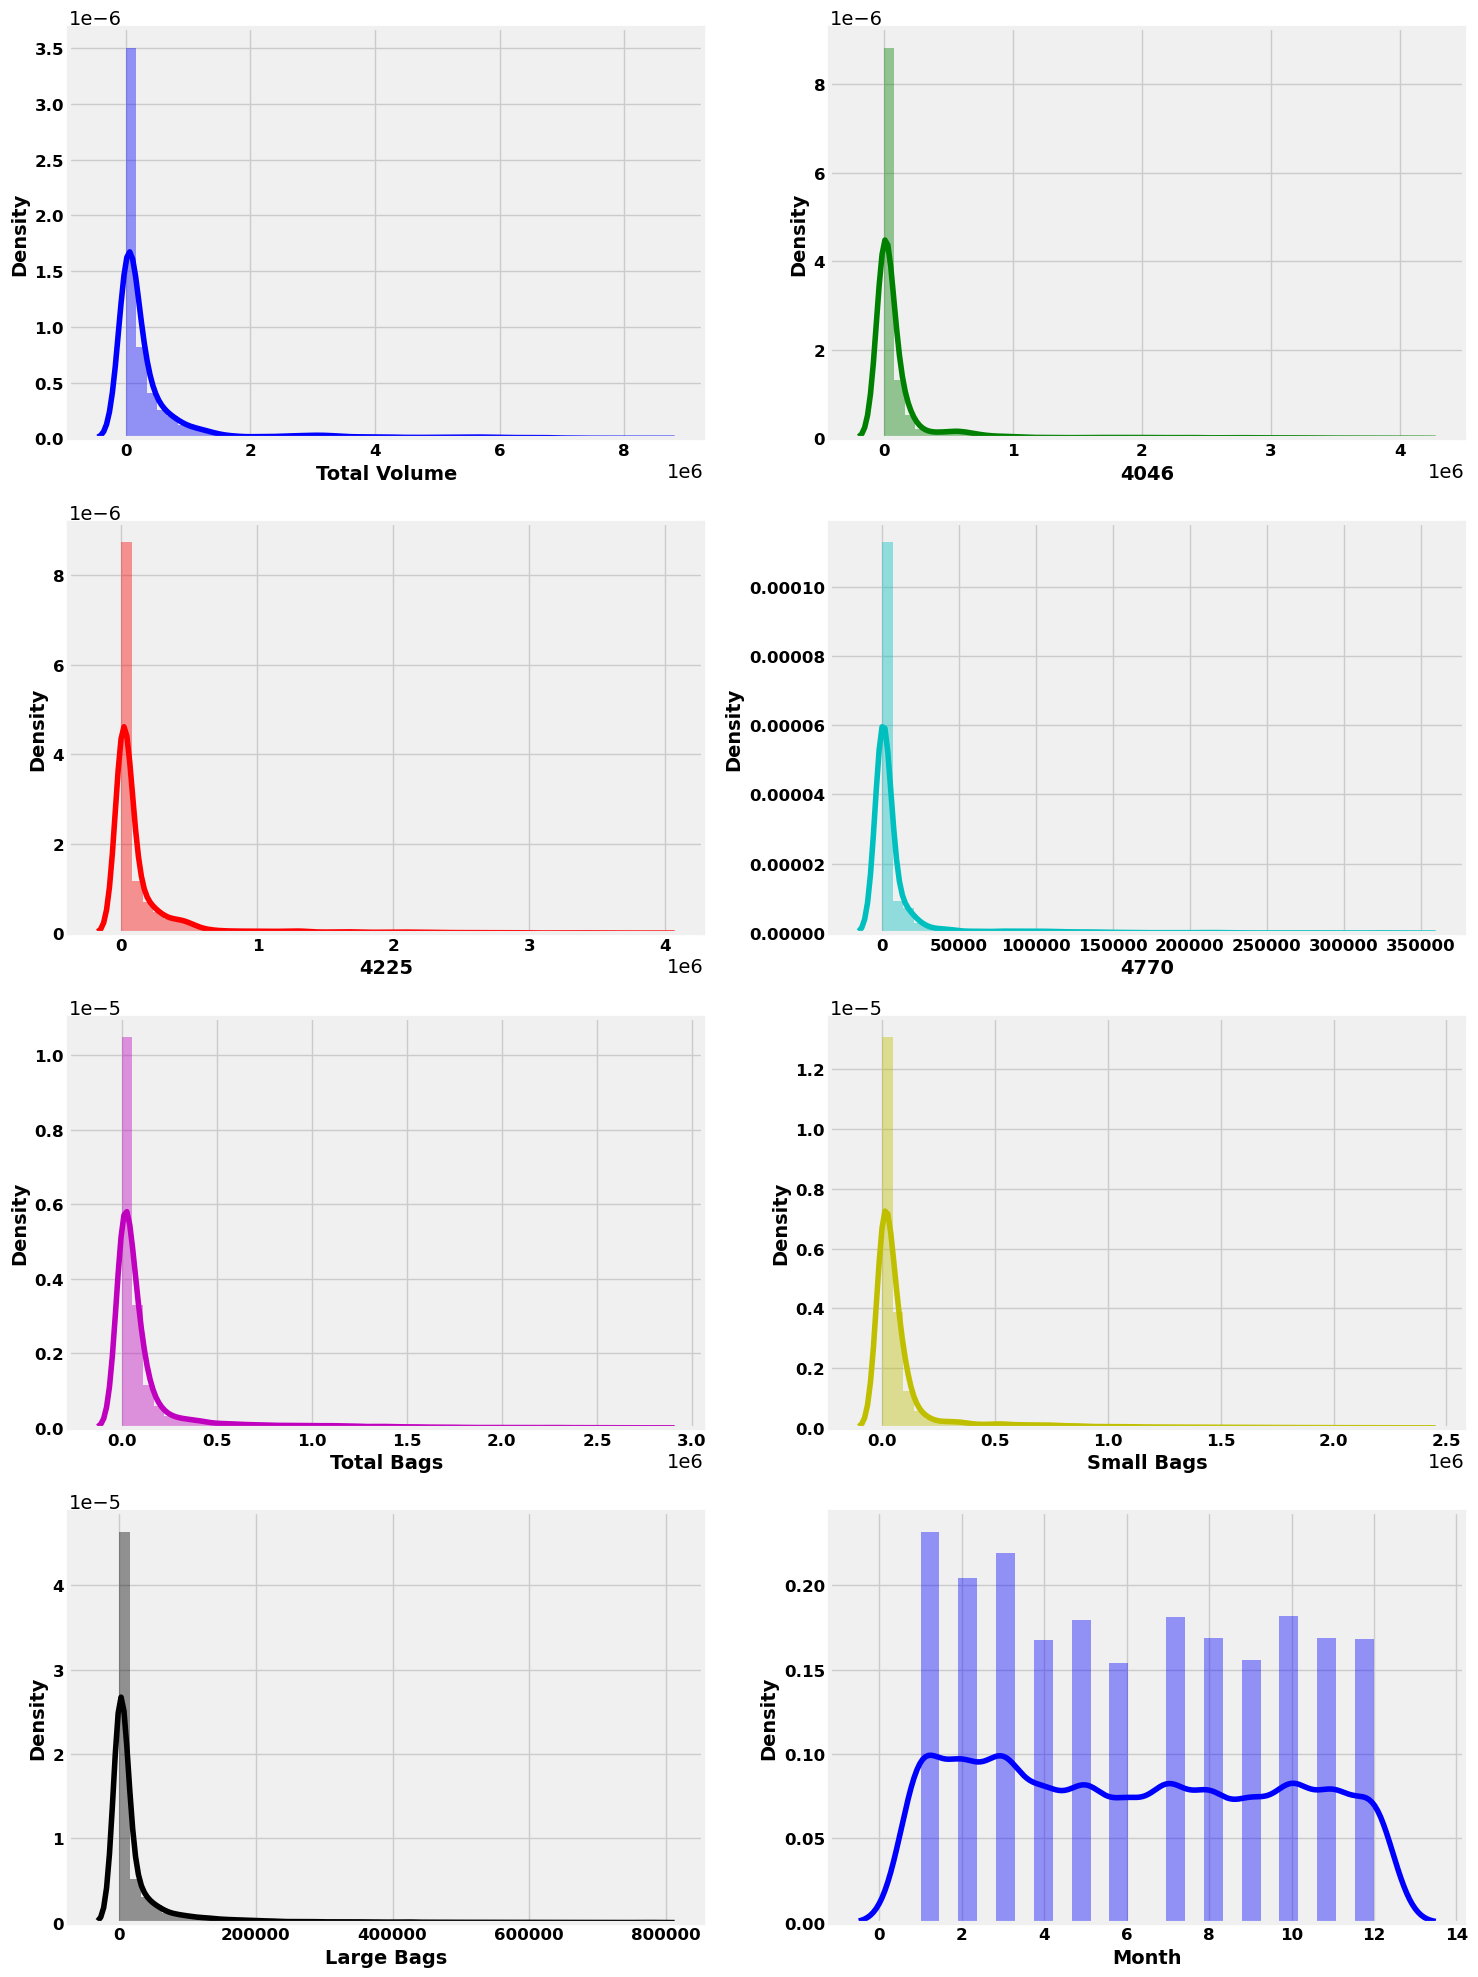

In [103]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_num.columns:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(df_num[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to reduce the skewness of all these features to get better model performance**

In [104]:
df_num.skew().sort_values(ascending=False) 

4770            4.992042
Large Bags      4.957801
4046            4.720484
4225            4.321796
Small Bags      4.233166
Total Bags      3.994204
Total Volume    3.683032
Month           0.099620
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are multiple variables beyond this range**
- **I will apply various transformation techniques to reduce the skewness and will consider the one with lowest skewness**

### Transforming data to remove skewness

In [105]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_num)
x_tra=pd.DataFrame(data=x_pwr,columns=df_num.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

4770            0.026912
Total Volume   -0.005601
Total Bags     -0.020030
Small Bags     -0.022286
4046           -0.037735
4225           -0.042934
Large Bags     -0.109647
Month          -0.148597
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method**
- **Skewness range: (-0.1,+0.1) which is inside the range of -0.5 to 0.5**

In [106]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_num)
x_qtr=pd.DataFrame(data=x_qt,columns=df_num.columns)
x_qtr.skew().sort_values(ascending=False)

Total Bags      4.652074e-06
Total Volume   -1.642175e-08
4225           -1.000122e-04
Small Bags     -8.360262e-04
4046           -1.824418e-03
Month          -3.279154e-02
Large Bags     -1.123353e-01
4770           -1.518620e-01
dtype: float64

#### Observations:
- **Skewness is reduced using QuantileTransformer method**
- **Skewness range: (-0.1,+0.1) which is within the range of -0.5 to 0.5 which is fairly symmetrical**
- **Here I selected the transformed data from QuantileTransformer method**

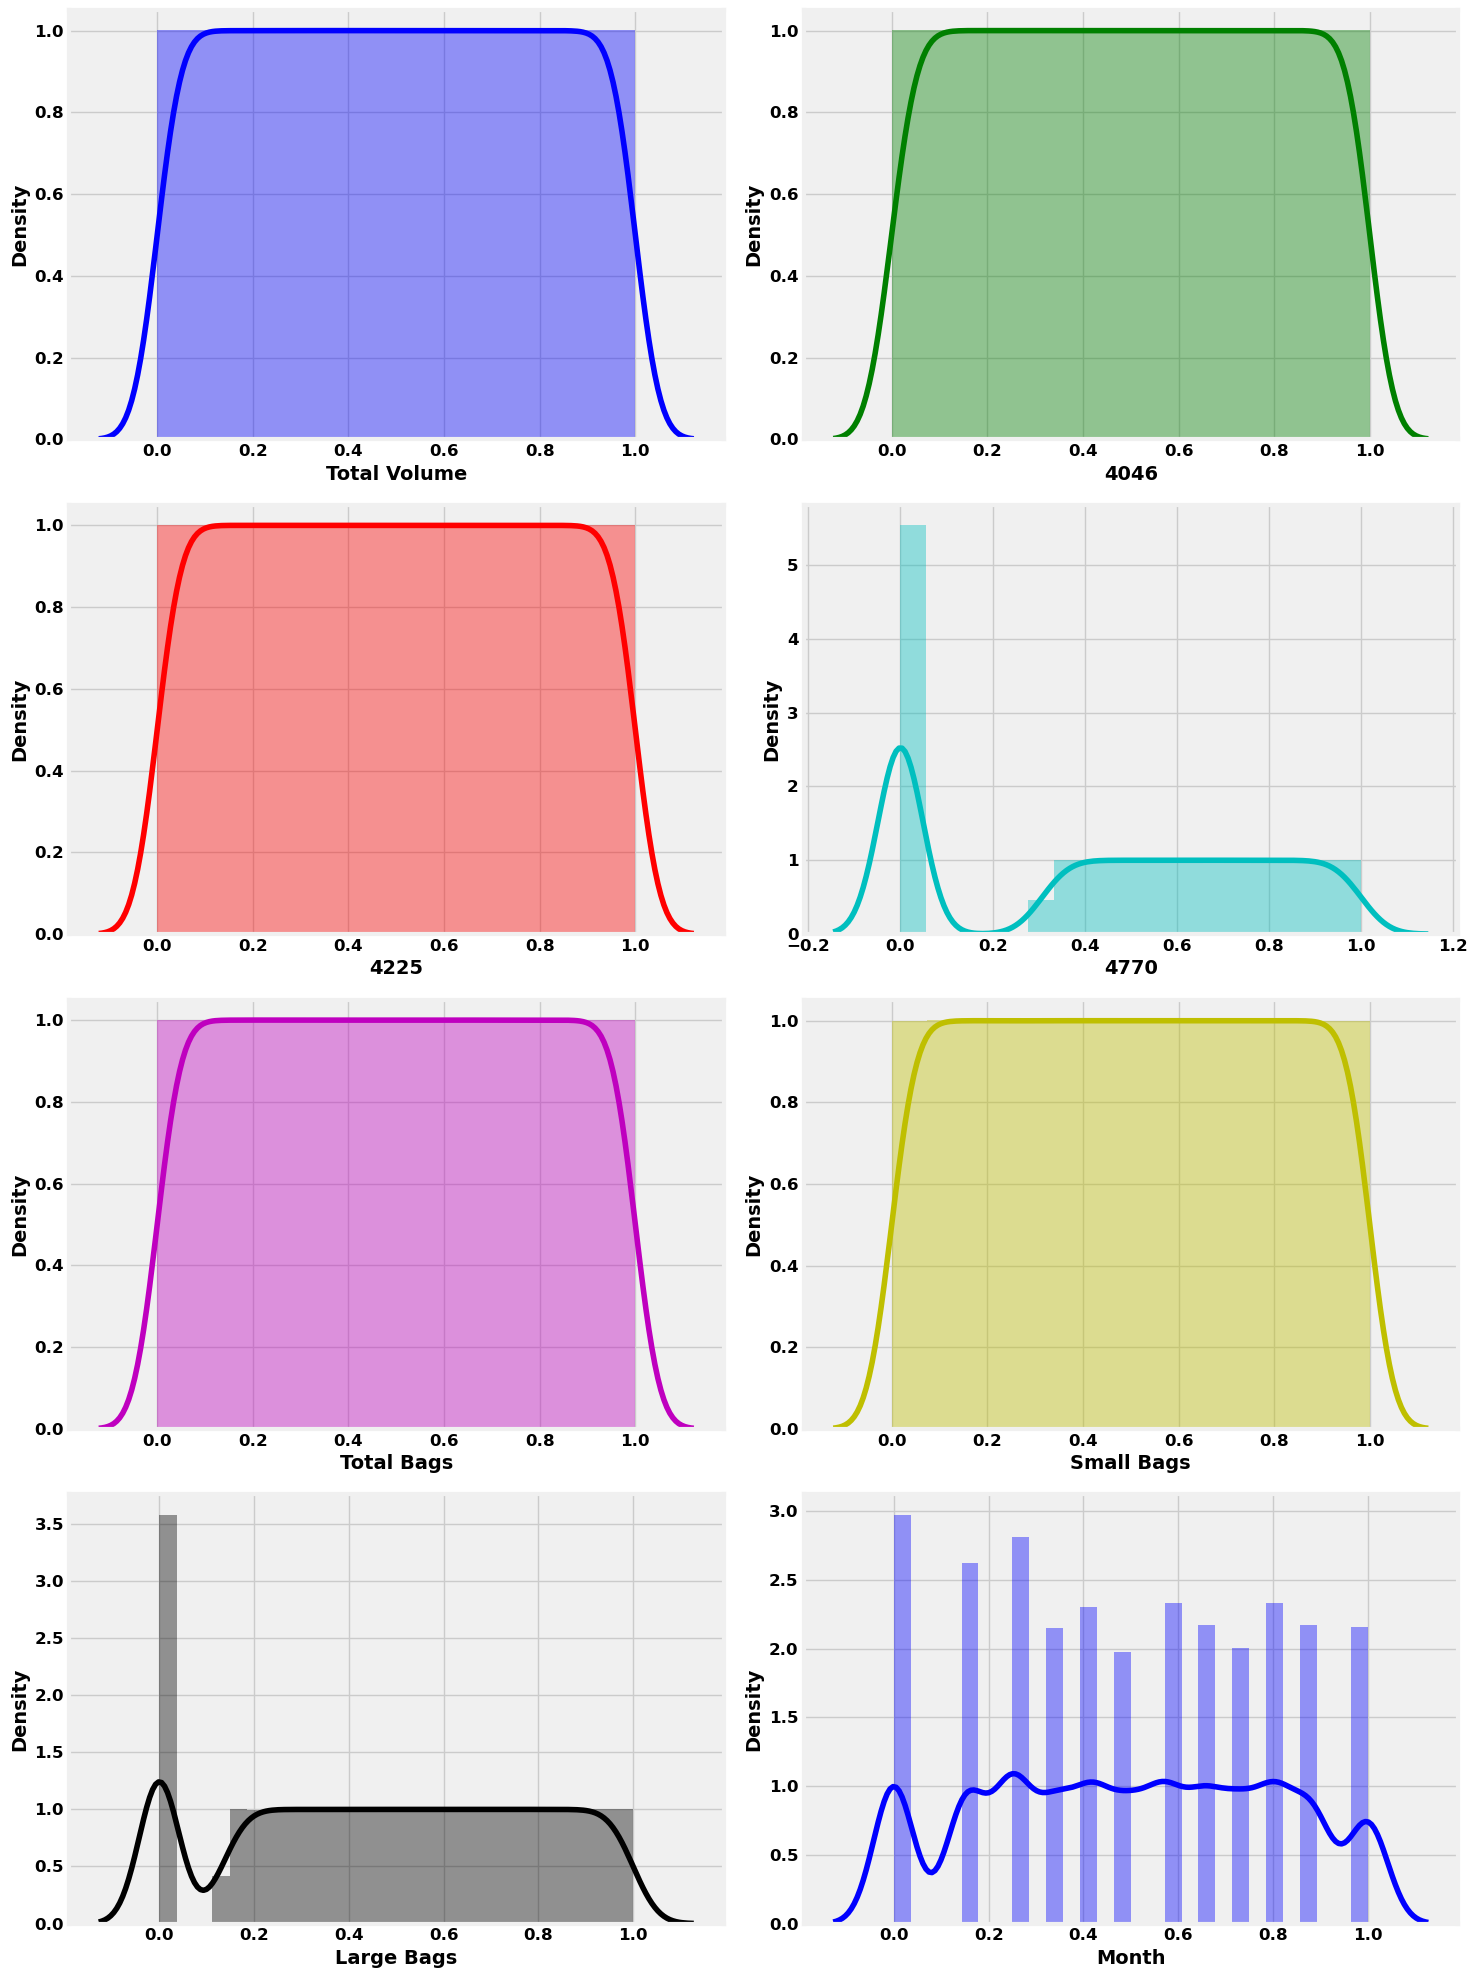

In [107]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(x_qtr[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **As the skewness is least using "Quantile transformer" for most of the features, I am using transformed x data from "Quantile transformer" for model building**   

### Grouping both transformed numerical and categorical data 

In [108]:
x_reg.shape

(17867, 9)

In [109]:
x_reg.tail(5) # x data including both numerical and categorical features

Total Volume     4046     4225    4770  Total Bags  Small Bags  \
18244      17074.83  2046.96  1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70  3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92  2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63  2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77  2356.13  224.53    12014.15    11988.14   

       Large Bags  type  Month  
18244      431.85     1      2  
18245      324.80     1      1  
18246       42.31     1      1  
18247       50.00     1      1  
18248       26.01     1      1

In [110]:
new_x=x_reg.reset_index(drop=True)  # reset the index of x data

In [111]:
new_x.tail(5) # x data including both numerical and categorical features after resetting the index

Total Volume     4046     4225    4770  Total Bags  Small Bags  \
17862      17074.83  2046.96  1529.20    0.00    13498.67    13066.82   
17863      13888.04  1191.70  3431.50    0.00     9264.84     8940.04   
17864      13766.76  1191.92  2452.79  727.94     9394.11     9351.80   
17865      16205.22  1527.63  2981.04  727.01    10969.54    10919.54   
17866      17489.58  2894.77  2356.13  224.53    12014.15    11988.14   

       Large Bags  type  Month  
17862      431.85     1      2  
17863      324.80     1      1  
17864       42.31     1      1  
17865       50.00     1      1  
17866       26.01     1      1

In [112]:
x_qtr.head(5)  # Transformed numerical data

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0      0.444511  0.275026  0.616687  0.413585    0.331975    0.375273   
1      0.428524  0.231745  0.579795  0.424588    0.344730    0.386117   
2      0.526089  0.247354  0.728087  0.482670    0.322633    0.366502   
3      0.469207  0.284282  0.665853  0.438100    0.272659    0.324885   
4      0.422652  0.264739  0.576733  0.440999    0.281144    0.330589   

   Large Bags     Month  
0    0.242659  1.000000  
1    0.244160  1.000000  
2    0.246465  1.000000  
3    0.257268  1.000000  
4    0.277702  0.884384

In [113]:
for i in x_qtr.columns:
    new_x[i]=x_qtr[i]

In [114]:
new_x.head(5)  # Grouped x data with tranformed numerical data and categorical data

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0      0.444511  0.275026  0.616687  0.413585    0.331975    0.375273   
1      0.428524  0.231745  0.579795  0.424588    0.344730    0.386117   
2      0.526089  0.247354  0.728087  0.482670    0.322633    0.366502   
3      0.469207  0.284282  0.665853  0.438100    0.272659    0.324885   
4      0.422652  0.264739  0.576733  0.440999    0.281144    0.330589   

   Large Bags  type     Month  
0    0.242659     0  1.000000  
1    0.244160     0  1.000000  
2    0.246465     0  1.000000  
3    0.257268     0  1.000000  
4    0.277702     0  0.884384

In [115]:
new_x.shape

(17867, 9)

In [116]:
new_x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

### Scaling data

In [117]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.192213 -0.778555  0.404208 -0.113450   -0.582030   -0.431806   
1     -0.247592 -0.928397  0.276420 -0.081515   -0.537847   -0.394252   
2      0.090364 -0.874359  0.790070  0.087056   -0.614390   -0.462182   
3     -0.106671 -0.746511  0.574506 -0.042301   -0.787496   -0.606305   
4     -0.267932 -0.814172  0.265816 -0.033886   -0.758104   -0.586552   

   Large Bags      type     Month  
0   -0.822640 -1.021442  1.666840  
1   -0.817672 -1.021442  1.666840  
2   -0.810043 -1.021442  1.666840  
3   -0.774287 -1.021442  1.666840  
4   -0.706656 -1.021442  1.283425

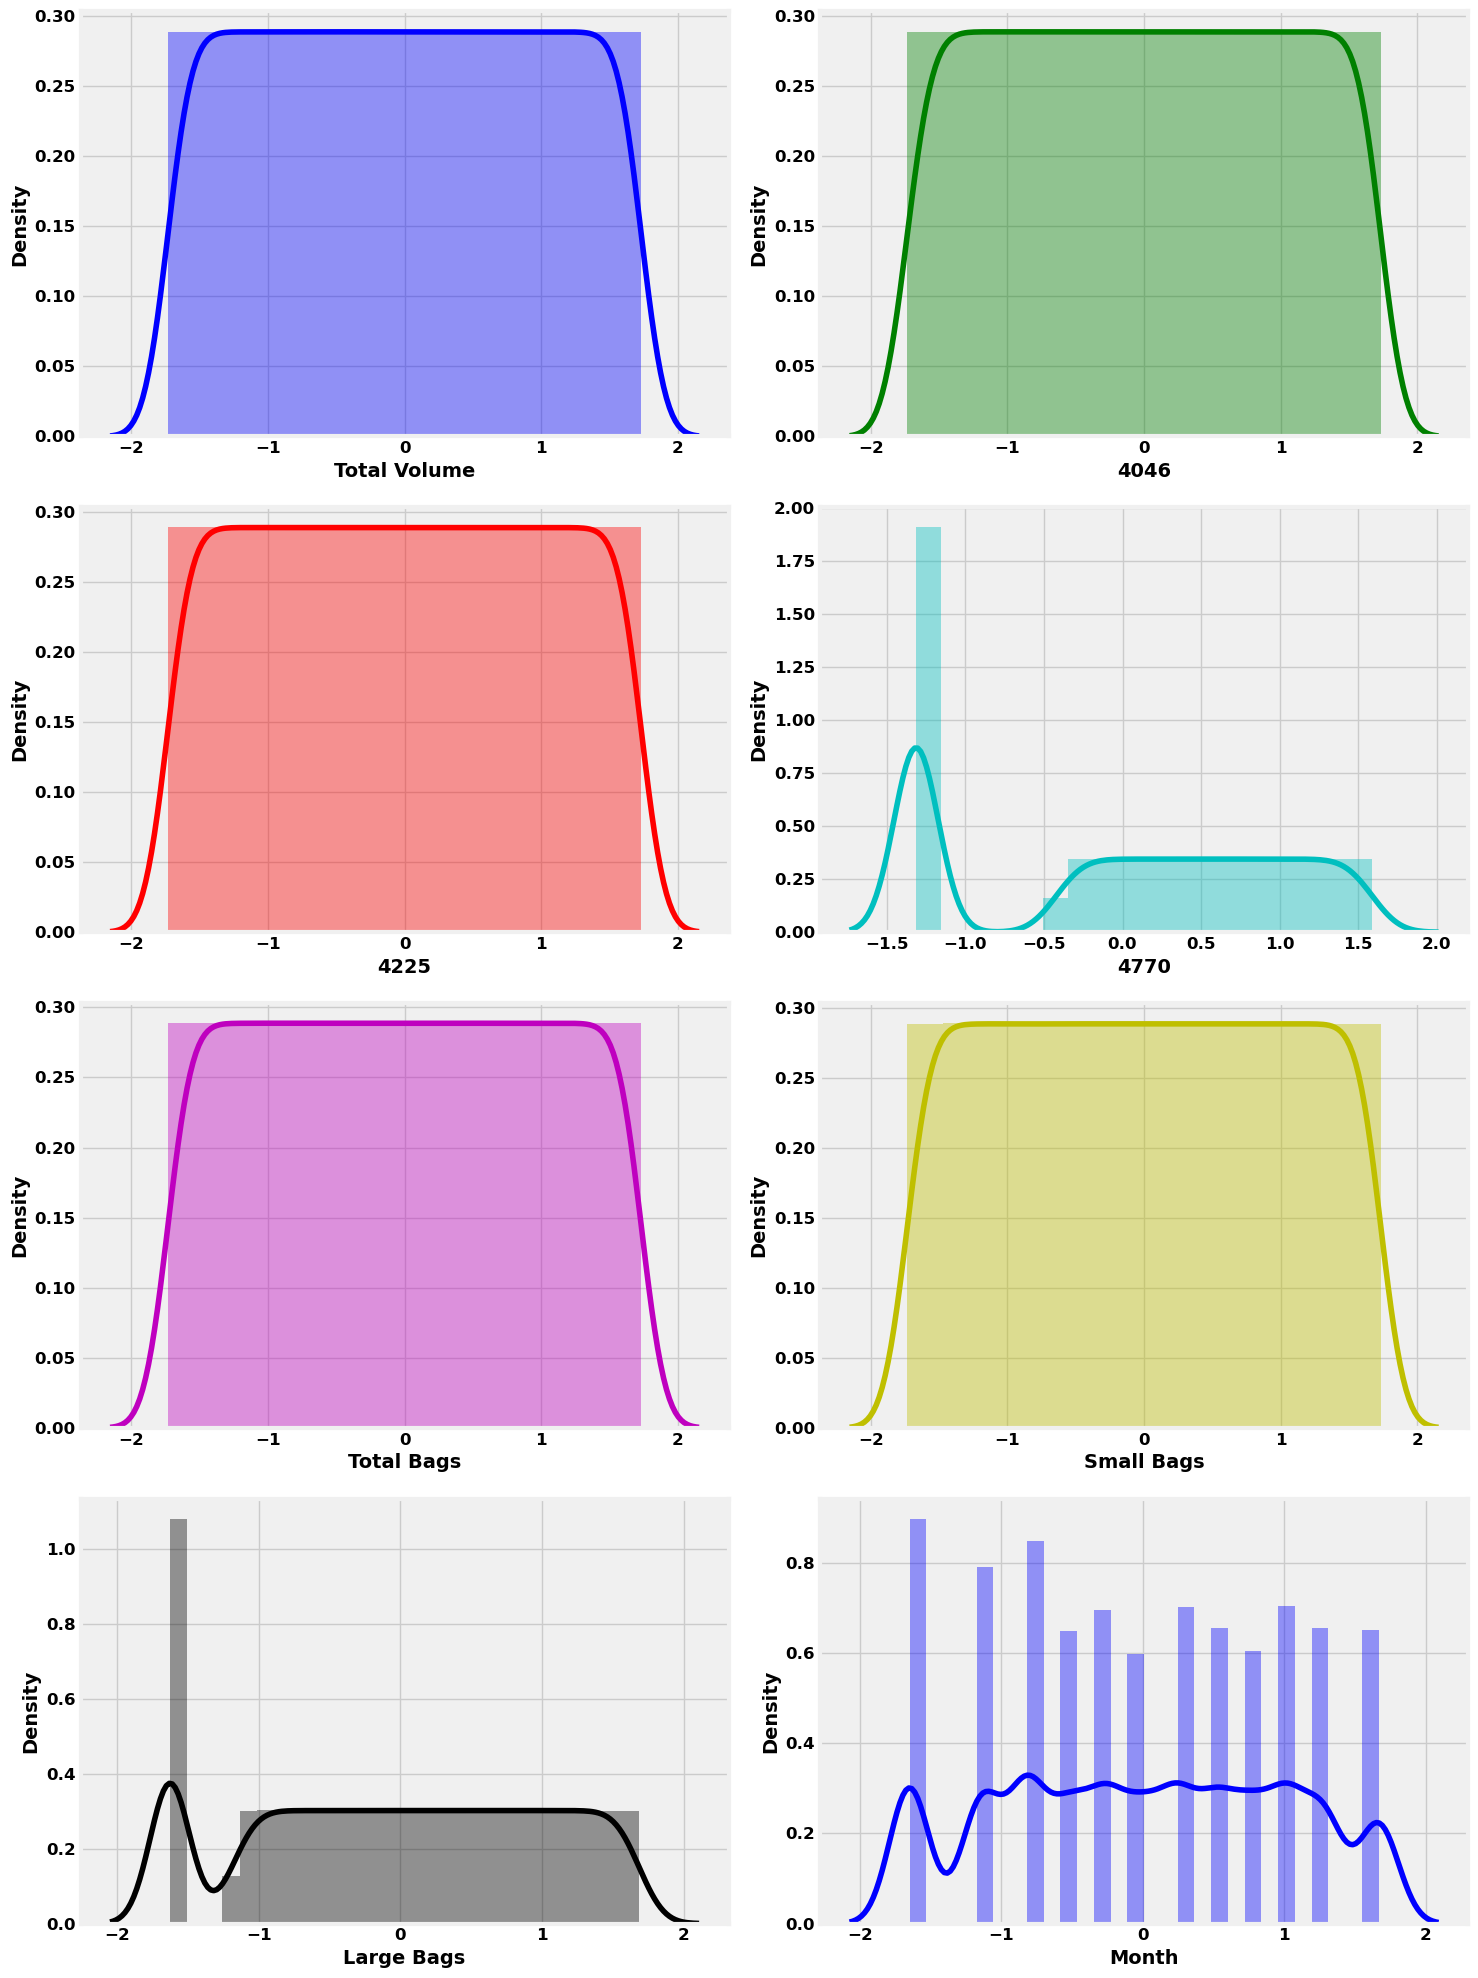

In [118]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_qtr:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Principal Component Analysis (PCA)

- **As the dataset has many X columns with multi-collinearity, I will use PCA technique to reduce the number of dimensions in a dataset while preserving the most important information in it**
- **Initially, I will calculate the number of components needed to explain the variance**
- **Based on that, I will choose no. of columns required be used in PCA**

In [119]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

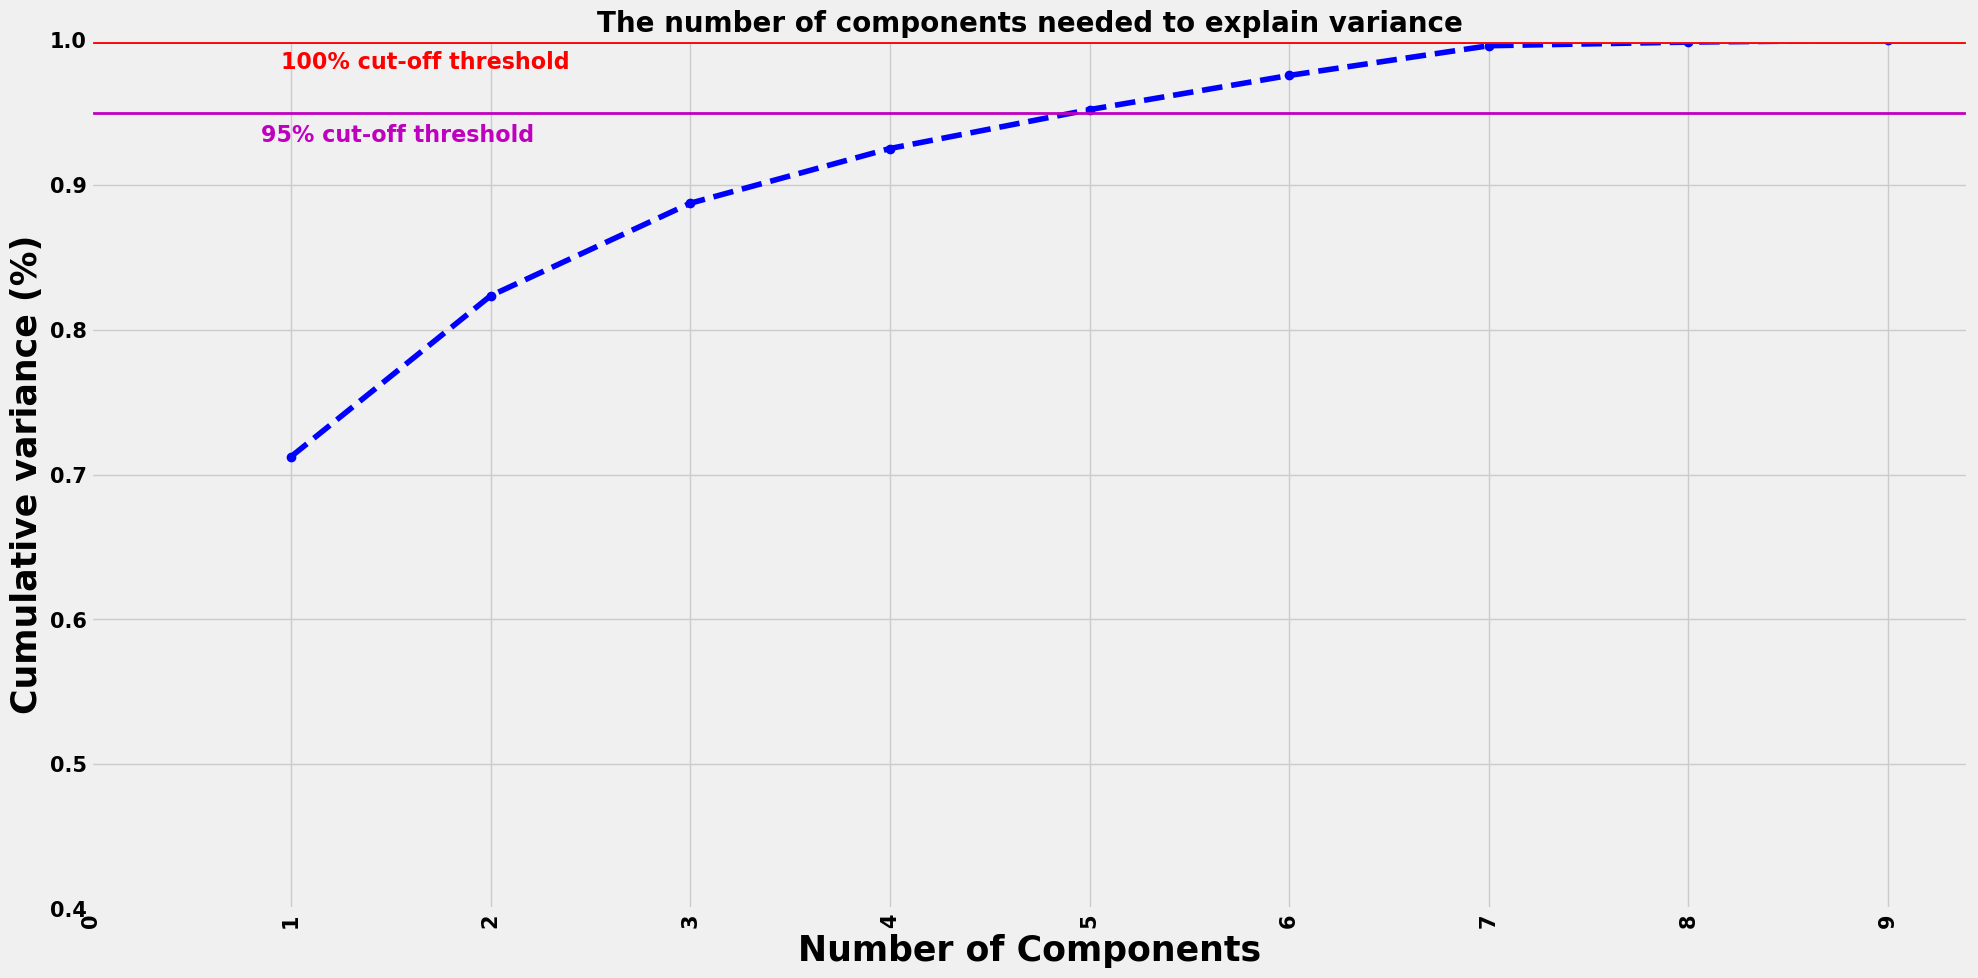

In [120]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, x.shape[1]+1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontsize=25,fontweight ='bold')
plt.xticks(np.arange(0, x.shape[1]+1, step=1)) 
plt.ylabel('Cumulative variance (%)',fontsize=25,fontweight ='bold')
plt.title('The number of components needed to explain variance',fontsize=20,fontweight ='bold')
plt.axhline(y=1, color='r', linestyle='-',linewidth = '5')
plt.text(0.95, 0.98, '100% cut-off threshold', color = 'red', fontsize=16,fontweight ='bold')
plt.axhline(y=0.95, color='m', linestyle='-',linewidth = '2')
plt.text(0.85, 0.93, '95% cut-off threshold', color = 'm', fontsize=16,fontweight ='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.grid(axis = 'x')
plt.grid(True)
plt.ylim(0.4,1.0)
plt.tight_layout()
plt.show()

#### Observations:
- **As per the graph, we can see that 5 principal components attribute for 95% of variation in the data. Hence I will pick 5 components for our prediction**
- **I will use 5 features as no. of components in PCA to reduce the dimensions**

In [121]:
# Applying PCA transformation on X data to reduce the no. of columns
pca=PCA(n_components=5)
x_reg=pca.fit_transform(x)
x_reg=pd.DataFrame(x_reg)
x_reg.head()

0         1         2         3         4
0 -0.525853  1.705992  1.083057 -0.713830 -0.071657
1 -0.604263  1.708686  1.063902 -0.737076  0.011241
2 -0.260546  1.704173  1.173919 -0.831098  0.188744
3 -0.522704  1.702422  1.096469 -0.900061 -0.074461
4 -0.677811  1.321922  1.004307 -0.945183 -0.121302

#### Observations:
- **After applying PCA transformation, X dataset is reduced to 5 dimensions. This X data can be used for model training**

## Checking Multicollinearity again after PCA transformation

In [122]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_reg[list(x_reg.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF  Column
0  1.0       0
1  1.0       1
2  1.0       2
3  1.0       3
4  1.0       4

#### Observations:
- **No multicollinearity is noticed after PCA transformation as VIF < 5 for all features**

In [123]:
y_reg.shape

(17867,)

In [124]:
x_reg.shape

(17867, 5)

# CLASSIFICATION TASK EDA (To Be Continued)

In [125]:
# Checking Multicollinearity between features using variance_inflation_factor (VIF)
# We calculate VIF only for numerical data as the variance is applicable only for numerical data

In [126]:
# Identifying the columns with numerical data after dropping the columns identified in previous steps

In [127]:
df_clas.head(3)

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   

   Large Bags  XLarge Bags  region  
0       93.25          0.0       0  
1       97.49          0.0       0  
2      103.14          0.0       0

In [128]:
df_clas_numerical=df_clas.drop(["region"],axis=1)
df_clas_numerical.head(3)

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   

   Large Bags  XLarge Bags  
0       93.25          0.0  
1       97.49          0.0  
2      103.14          0.0

In [129]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_clas_numerical[list(df_clas_numerical.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF        Column
4  2.502000e+14    Total Bags
5  1.429714e+14    Small Bags
6  1.521486e+13    Large Bags
7  7.853860e+10   XLarge Bags
0  5.194565e+09  Total Volume
1  6.923184e+08          4046
2  6.311271e+08          4225
3  4.956326e+06          4770

#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As there are multiple features with VIF values > 10, I will use PCA to reduce the no. of features**

### Checking Outliers

In [130]:
# We check outliers on numerical data
df_outliers=df_clas_numerical.copy()
df_outliers.head(5)

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3      78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4      51039.60   941.48   43838.39   75.78     6183.95     5986.26   

   Large Bags  XLarge Bags  
0       93.25          0.0  
1       97.49          0.0  
2      103.14          0.0  
3      133.76          0.0  
4      197.69          0.0

In [131]:
df_outliers.shape

(18249, 8)

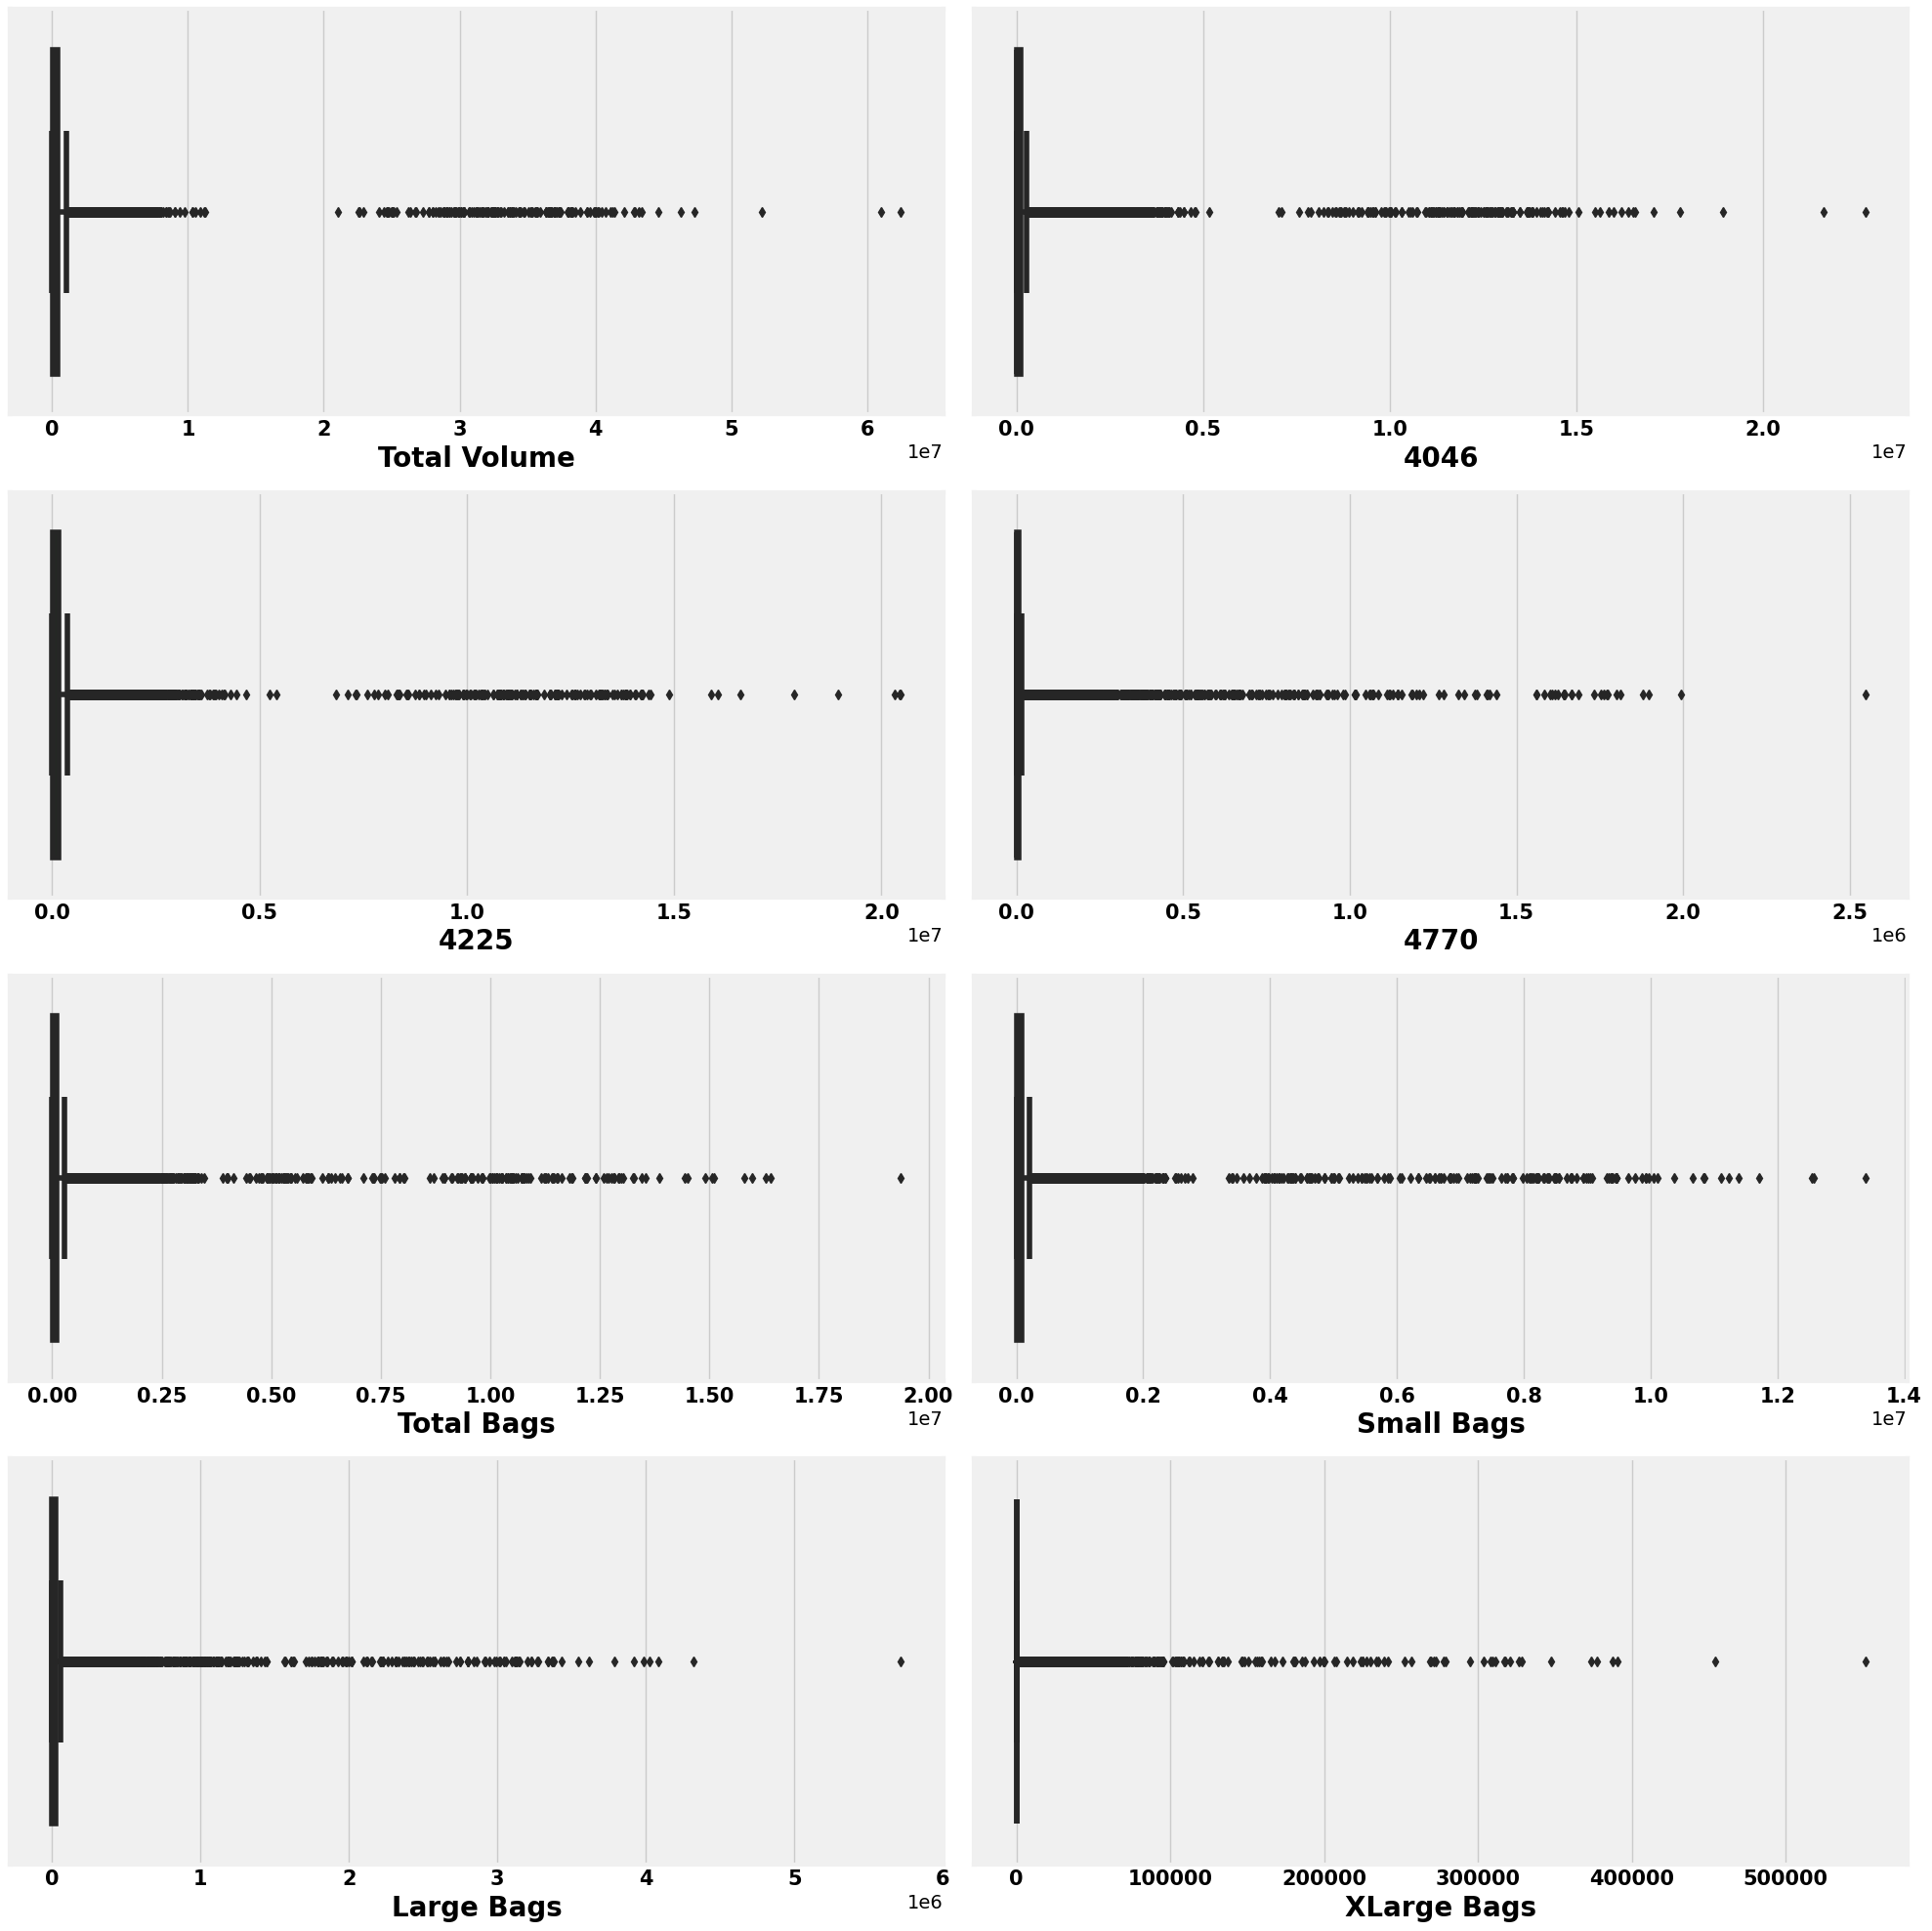

In [132]:
# Checking outliers visually before removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_clas[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in all the columns**

### Removing Outliers using z-score method

In [133]:
df_outliers.shape

(18249, 8)

In [134]:
df_clas.shape

(18249, 9)

In [135]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [136]:
# Removing the rows in the dataframe where the outliers are present in x features with numerical data
df_clas_1=df_clas[(z<3).all(axis=1)]
df_outliers_del=df_outliers[(z<3).all(axis=1)]

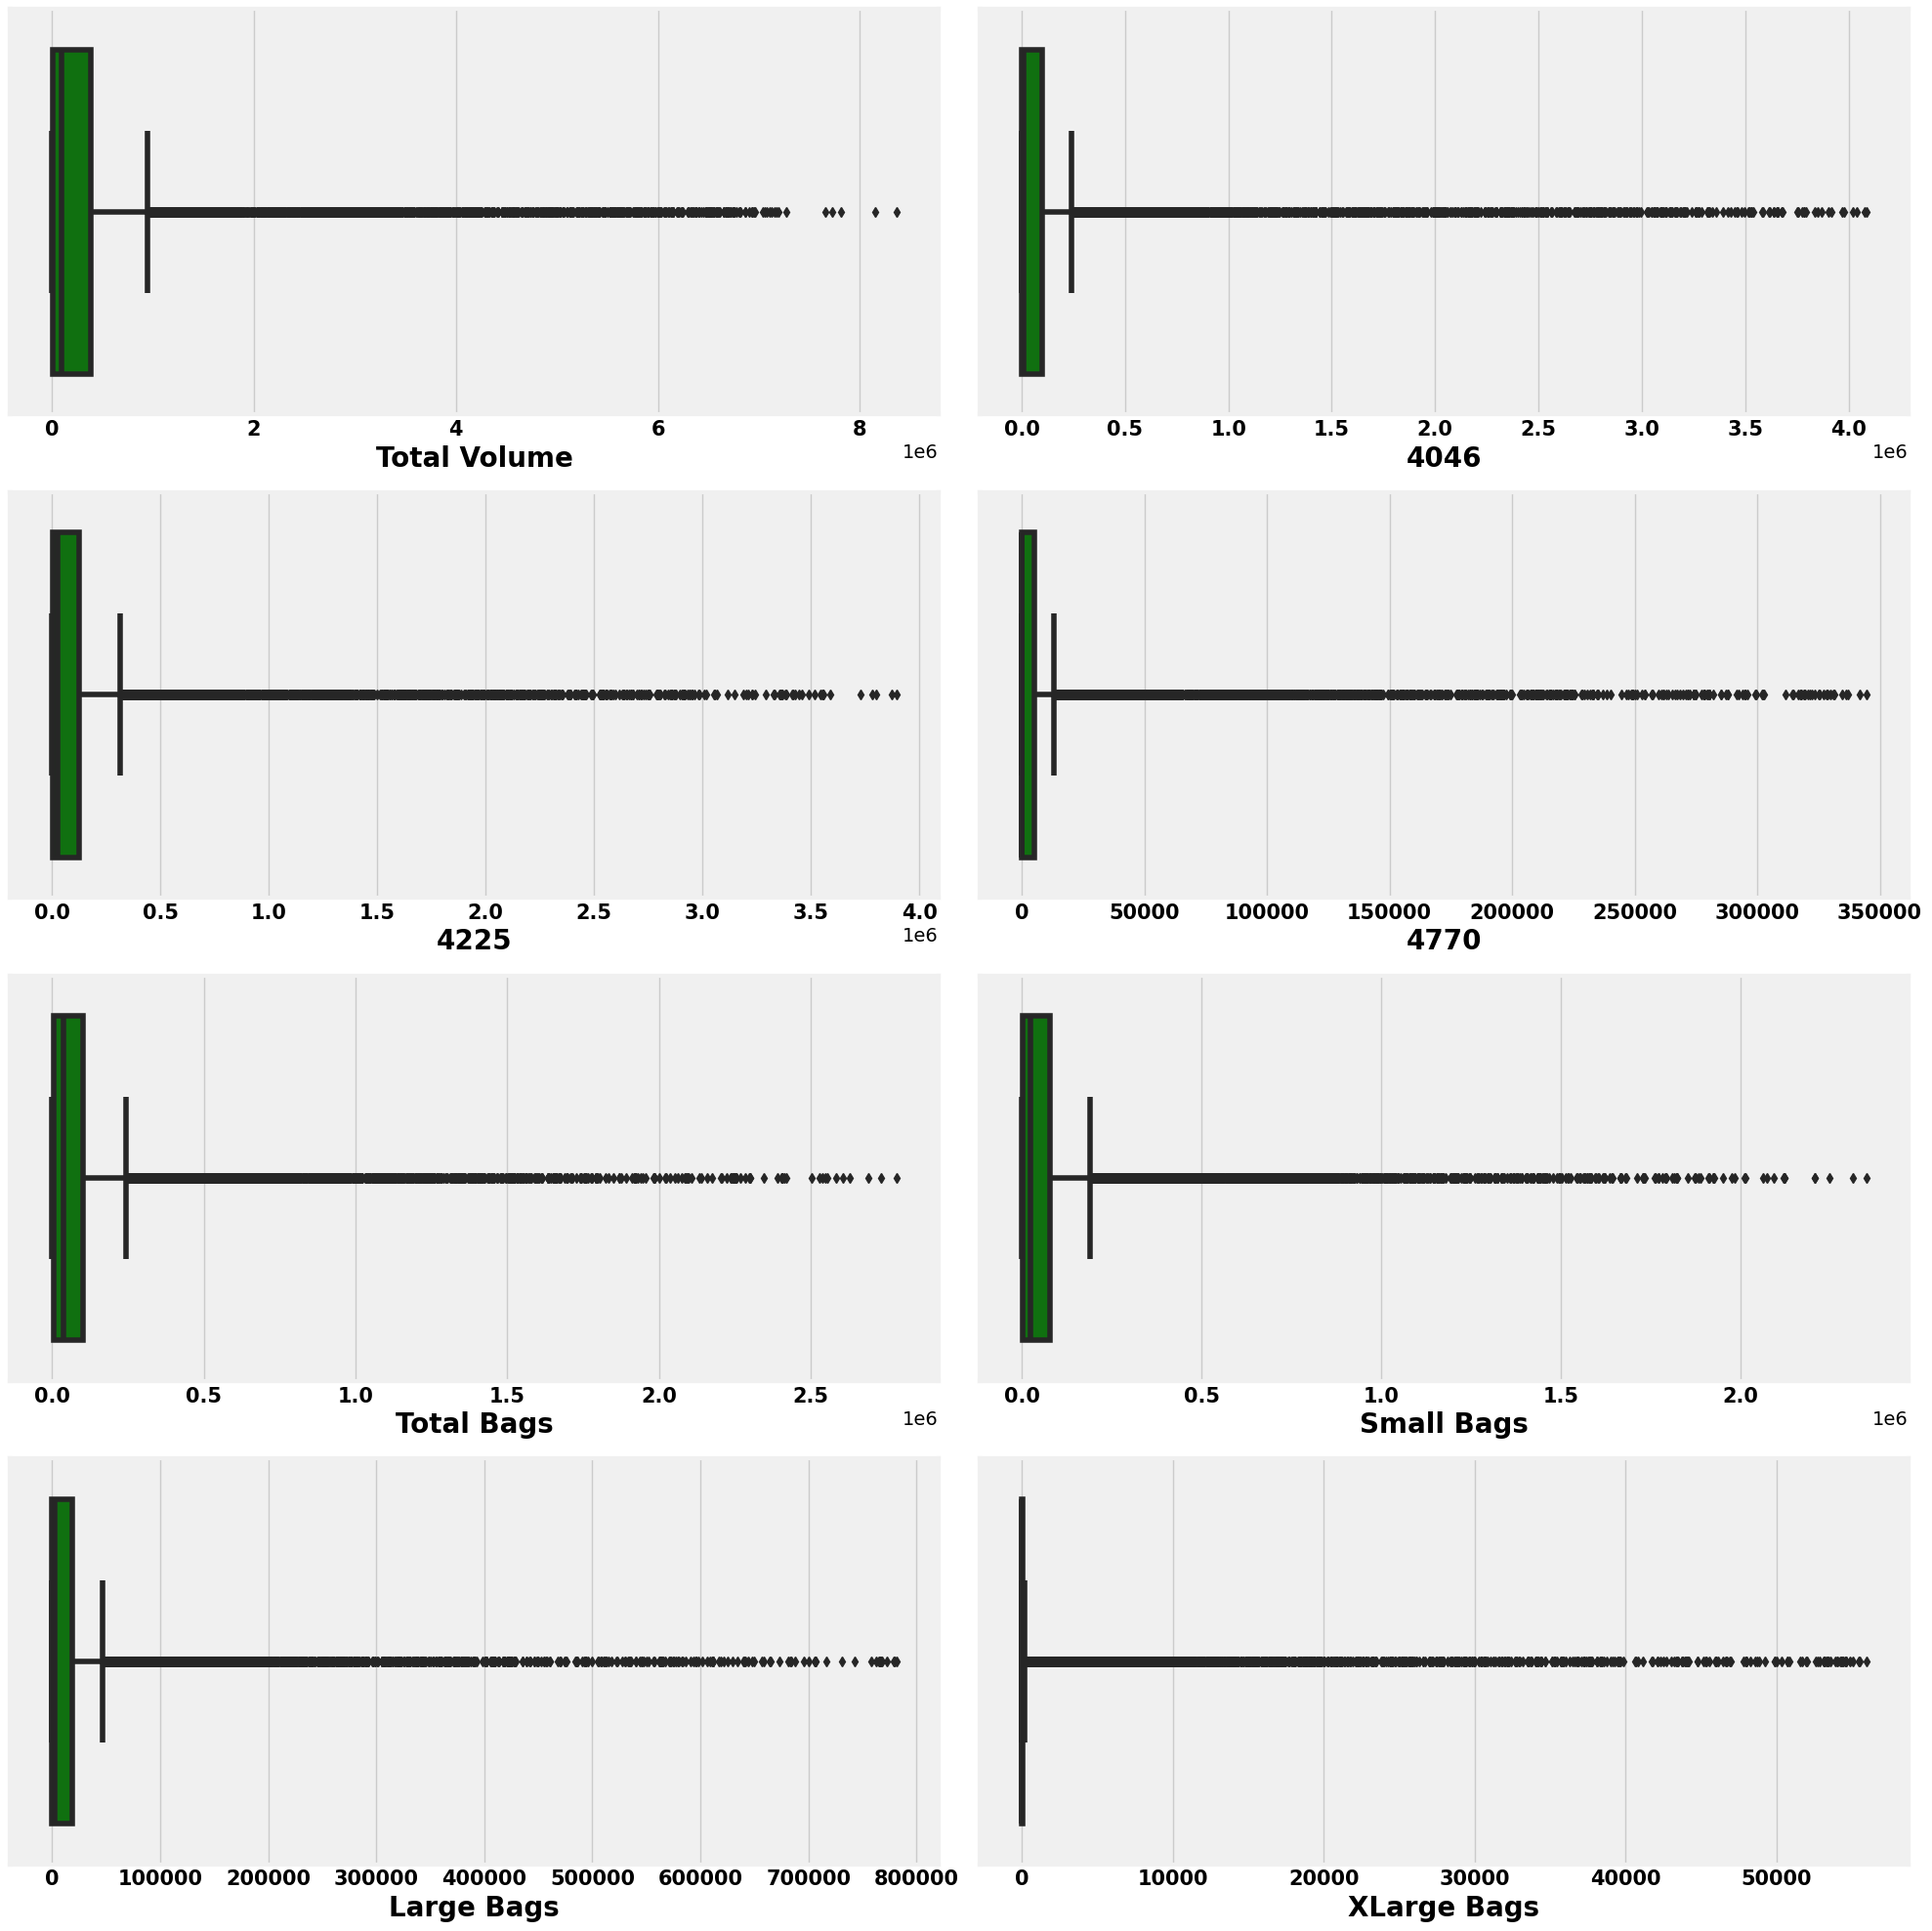

In [137]:
# Checking outliers visually after removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_del.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_clas_1[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features per z-score threshold**

In [138]:
df_clas_1.shape

(17782, 9)

In [139]:
df_clas.shape

(18249, 9)

In [140]:
# Data loss calculation with z-score method
loss_percent_zscore=round((df_clas.shape[0]-df_clas_1.shape[0])/df_clas.shape[0]*100,1)
loss_percent_zscore

2.6

#### Observations:
- **Data loss with z-score method is 2.6%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

### Removing Outliers using IQR method

In [141]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_outliers_upd = df_outliers[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_clas_2 = df_clas[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

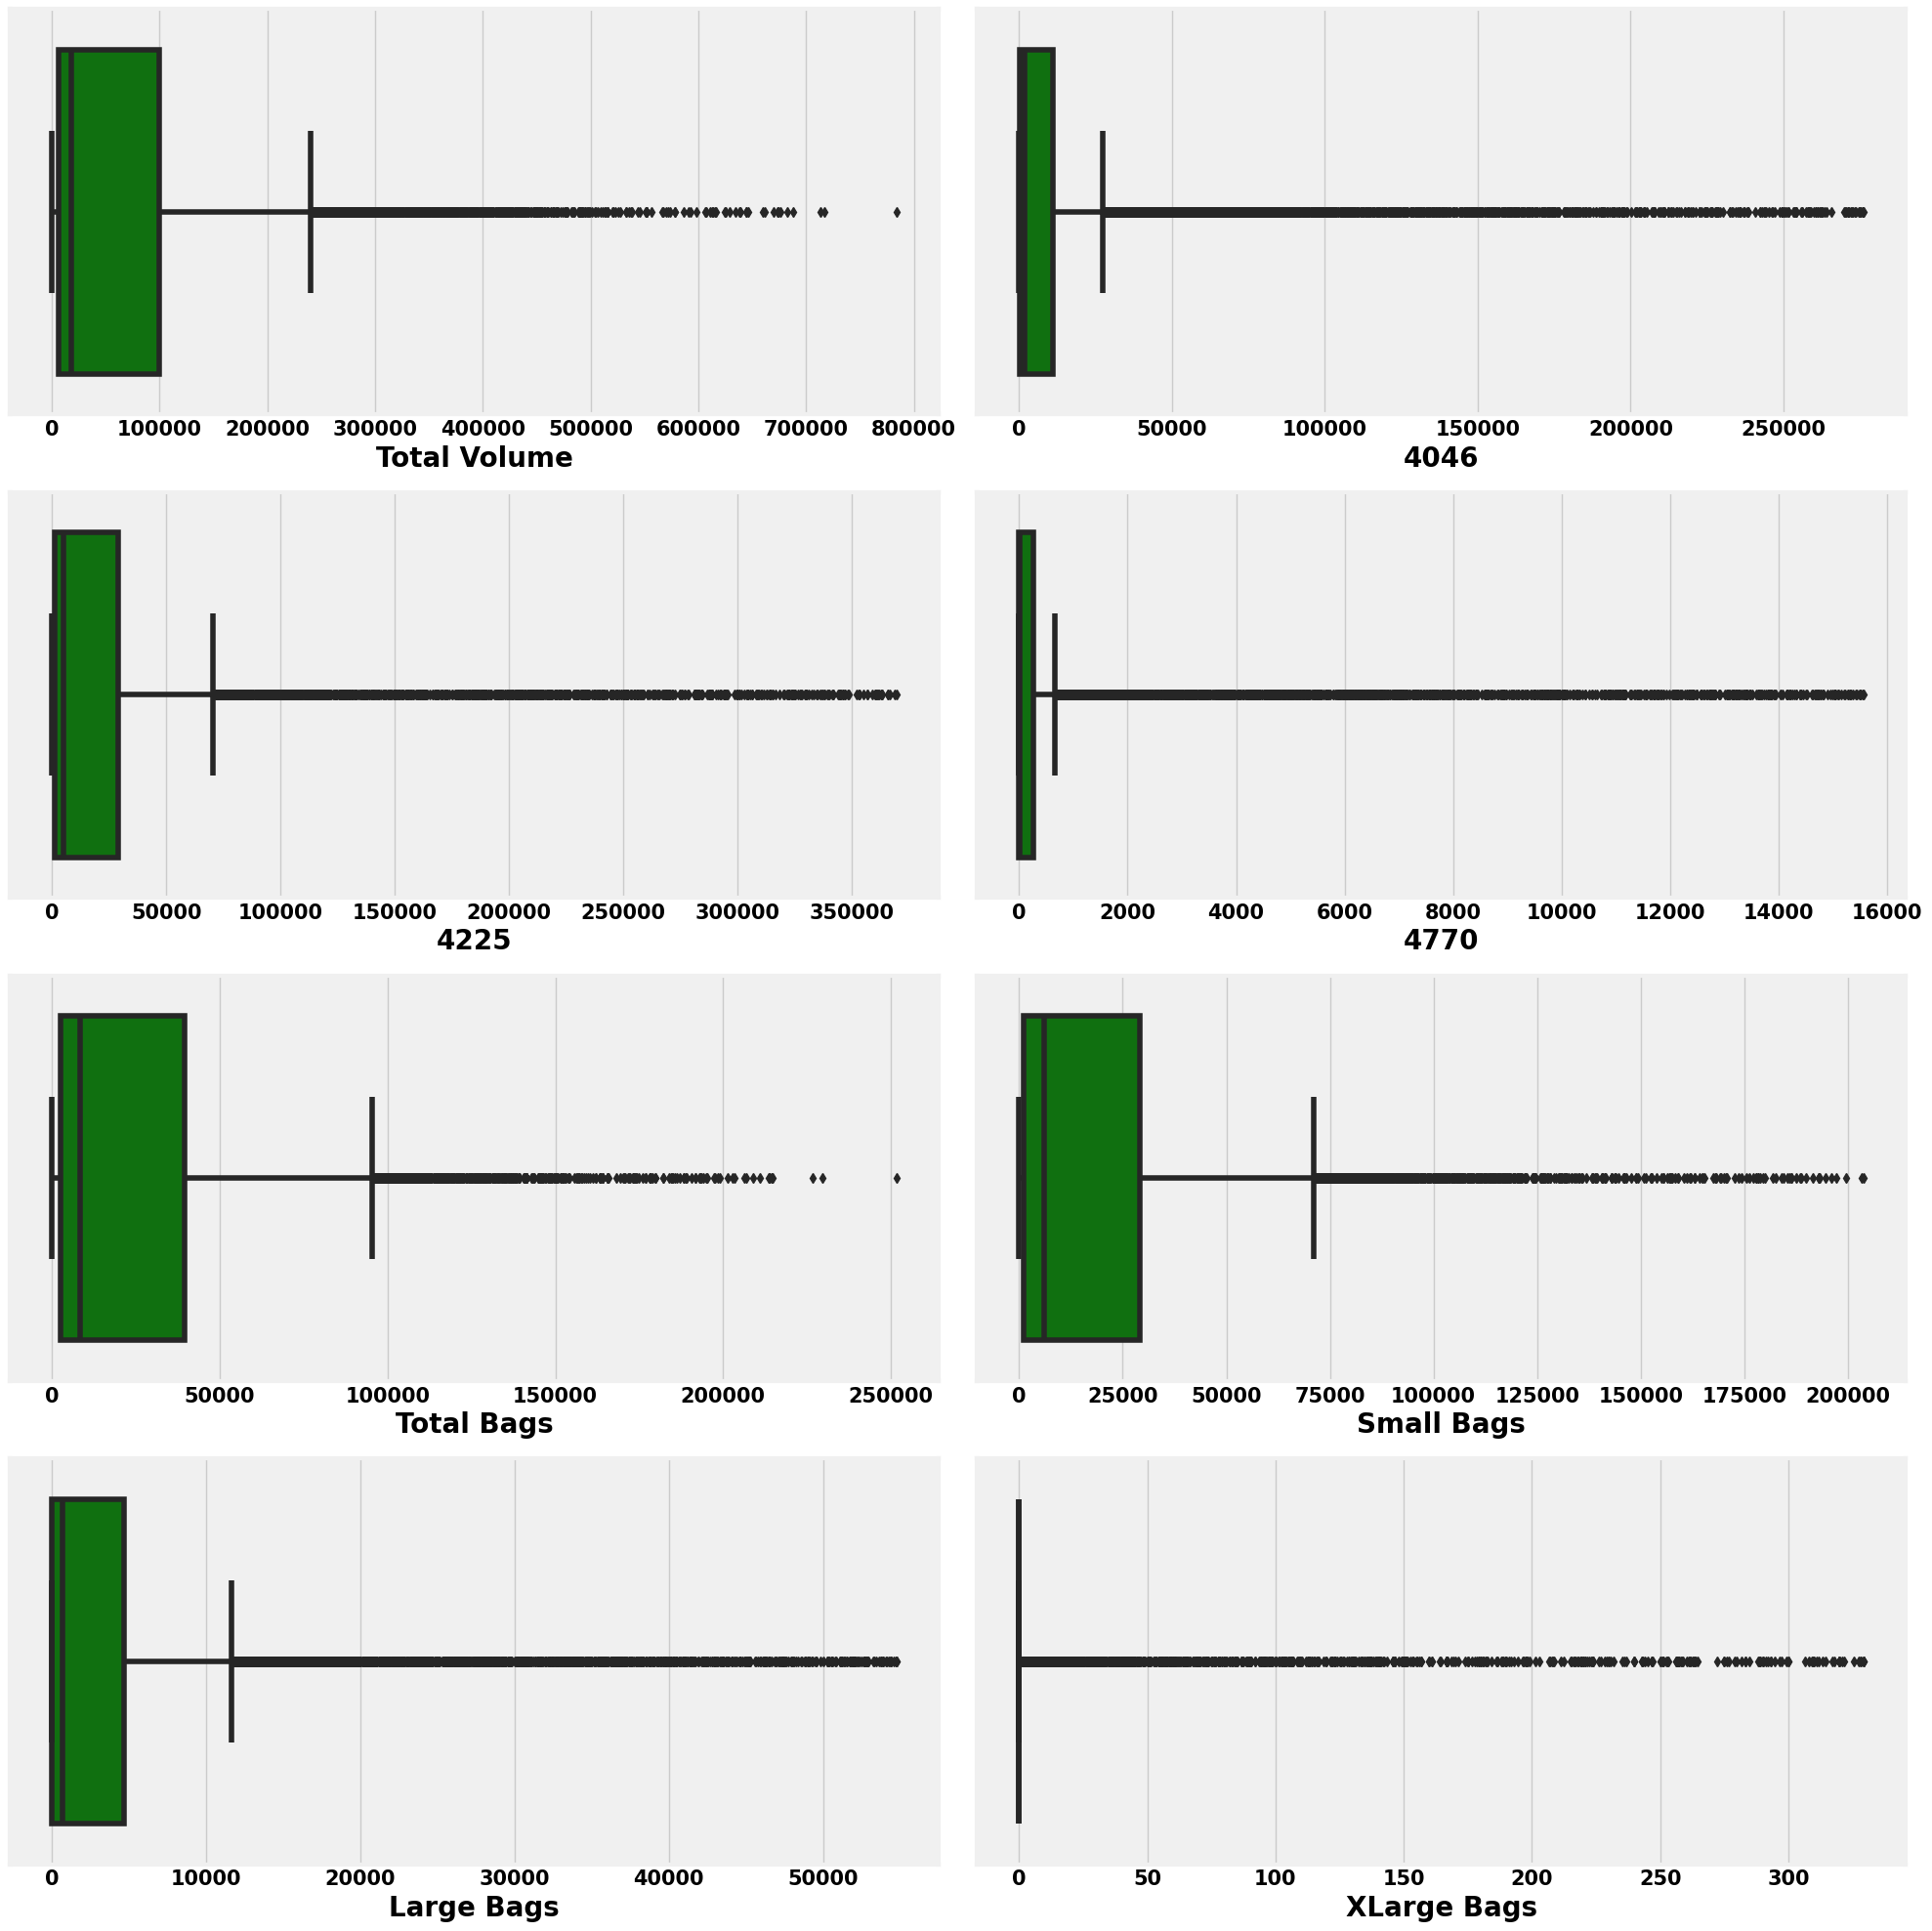

In [142]:
# Checking outliers visually after removing outliers using IQR method
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_upd.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_clas_2[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from all features based on IQR range**

In [143]:
df_clas_2.shape

(11747, 9)

In [144]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df_clas.shape[0]-df_clas_2.shape[0])/df_clas.shape[0]*100,1)
display(loss_percent_IQR)

35.6

#### Observations: 
- **Data loss with IQR is 35.6% which is higher than data loss with z-score (2.6%). Data loss with z-score method is < 10% which is acceptable hence considering x & y data after removing outliers using zscore method for model building**

In [145]:
df_clas_1.head(3)

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   

   Large Bags  XLarge Bags  region  
0       93.25          0.0       0  
1       97.49          0.0       0  
2      103.14          0.0       0

In [146]:
x_clas=df_clas_1.drop(['region'],axis=1)
y_clas=df_clas_1["region"].copy()
df_clas=df_clas_1

In [147]:
x_clas.head(3)

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   

   Large Bags  XLarge Bags  
0       93.25          0.0  
1       97.49          0.0  
2      103.14          0.0

In [148]:
y_clas.head(3)

0    0
1    0
2    0
Name: region, dtype: int32

### Skewness Check

In [149]:
# We don't remove skewness from categorical X data and from target variable hence checking skewness on X features with numerical data 
# Segregating numerical X features to check skewness
df_num=x_clas.copy()

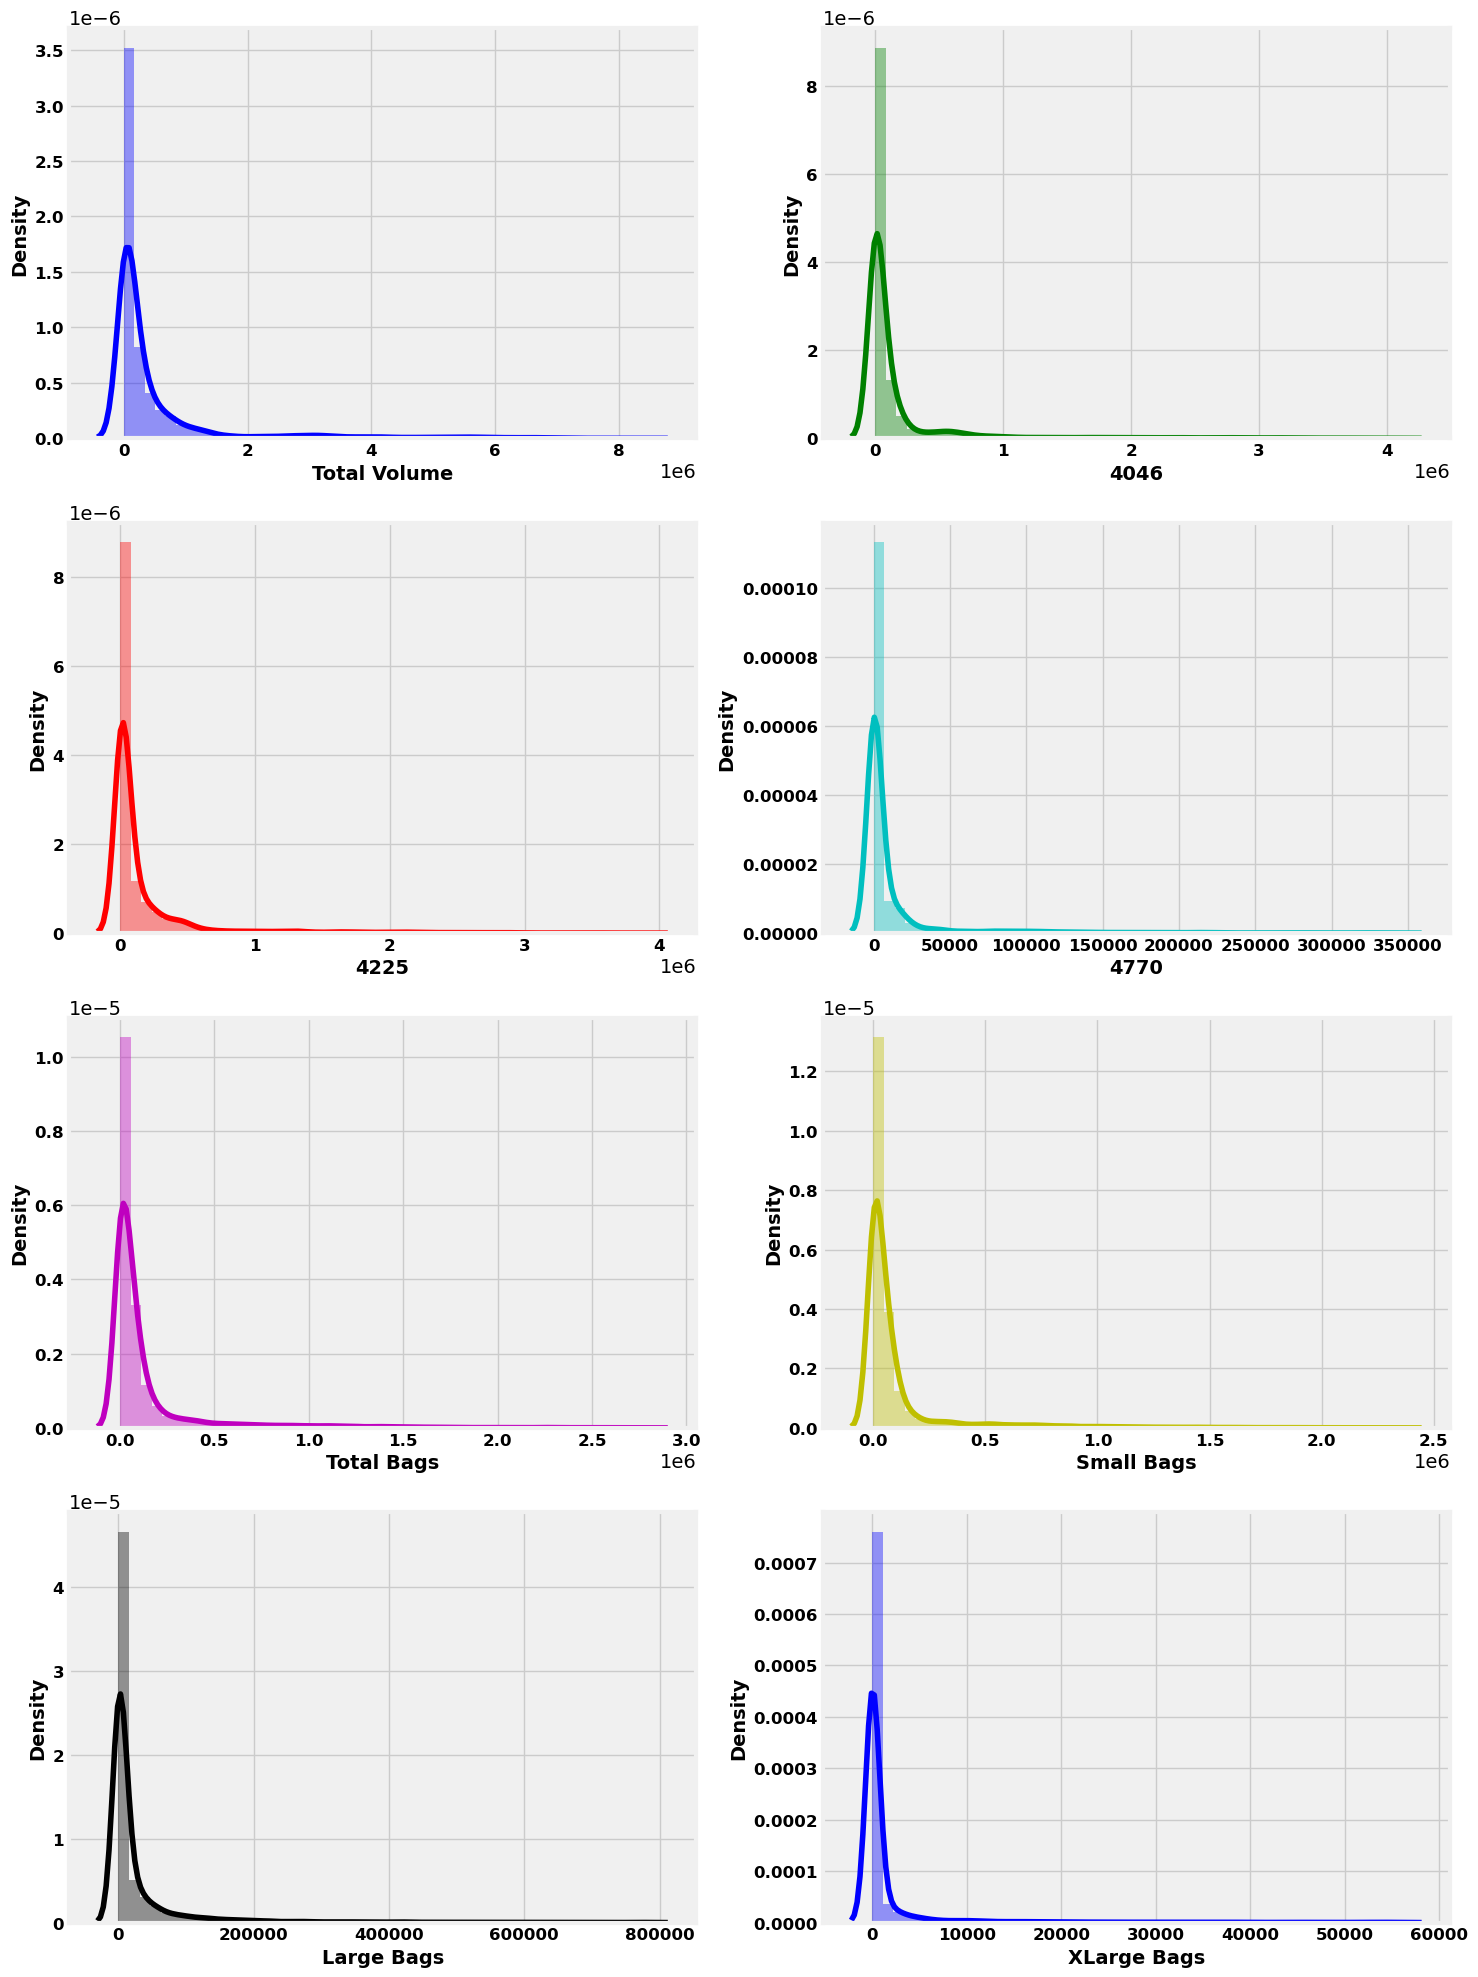

In [150]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_num.columns:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(df_num[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to reduce the skewness of all these features to get better model performance**

In [151]:
df_num.skew().sort_values(ascending=False) 

XLarge Bags     6.159391
4770            5.137120
Large Bags      5.072468
4046            4.928850
4225            4.472729
Small Bags      4.238647
Total Bags      4.082103
Total Volume    3.782060
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are multiple variables beyond this range**
- **I will apply various transformation techniques to reduce the skewness and will consider the one with lowest skewness**

### Transforming data to remove skewness

In [152]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_num)
x_tra=pd.DataFrame(data=x_pwr,columns=df_num.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

XLarge Bags     0.860603
4770            0.028015
Total Volume   -0.006809
Total Bags     -0.021531
Small Bags     -0.024657
4046           -0.038259
4225           -0.043246
Large Bags     -0.110061
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method**
- **Skewness range: (-0.8,+0.8) which is outside the range of -0.5 to 0.5**

In [153]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_num)
x_qtr=pd.DataFrame(data=x_qt,columns=df_num.columns)
x_qtr.skew().sort_values(ascending=False)

XLarge Bags     0.815916
Total Volume   -0.000008
Total Bags     -0.000013
4225           -0.000102
Small Bags     -0.000846
4046           -0.001850
Large Bags     -0.113013
4770           -0.150640
dtype: float64

#### Observations:
- **Skewness is reduced using QuantileTransformer method**
- **Skewness range: (-0.8,+0.8) which is outside the range of -0.5 to 0.5 however it is better than Power Transformer Method**

In [154]:
# Method3: Using Log Transformation
data_log = np.log(df_num)
data_logr=pd.DataFrame(data=data_log,columns=df_num.columns)
data_logr.skew().sort_values(ascending=False)

Total Volume   -0.039183
4046                 NaN
4225                 NaN
4770                 NaN
Total Bags           NaN
Small Bags           NaN
Large Bags           NaN
XLarge Bags          NaN
dtype: float64

In [155]:
# Method4: Using square root transformer
data_sqrt = np.sqrt(df_num)
data_sqrtr=pd.DataFrame(data=data_sqrt,columns=df_num.columns)
data_sqrtr.skew().sort_values(ascending=False)

XLarge Bags     3.327055
4770            2.648191
4046            2.507960
Large Bags      2.245866
4225            2.138625
Small Bags      2.100896
Total Bags      2.017875
Total Volume    1.972539
dtype: float64

In [156]:
# Method5: Using Inverse transformer
data_inv = 1/df_num
data_invr=pd.DataFrame(data=data_inv,columns=df_num.columns)
data_invr.skew().sort_values(ascending=False)

Total Volume    14.797731
4046                  NaN
4225                  NaN
4770                  NaN
Total Bags            NaN
Small Bags            NaN
Large Bags            NaN
XLarge Bags           NaN
dtype: float64

- **Here I selected the transformed data from QuantileTransformer method as it is best compared to all methods tried**

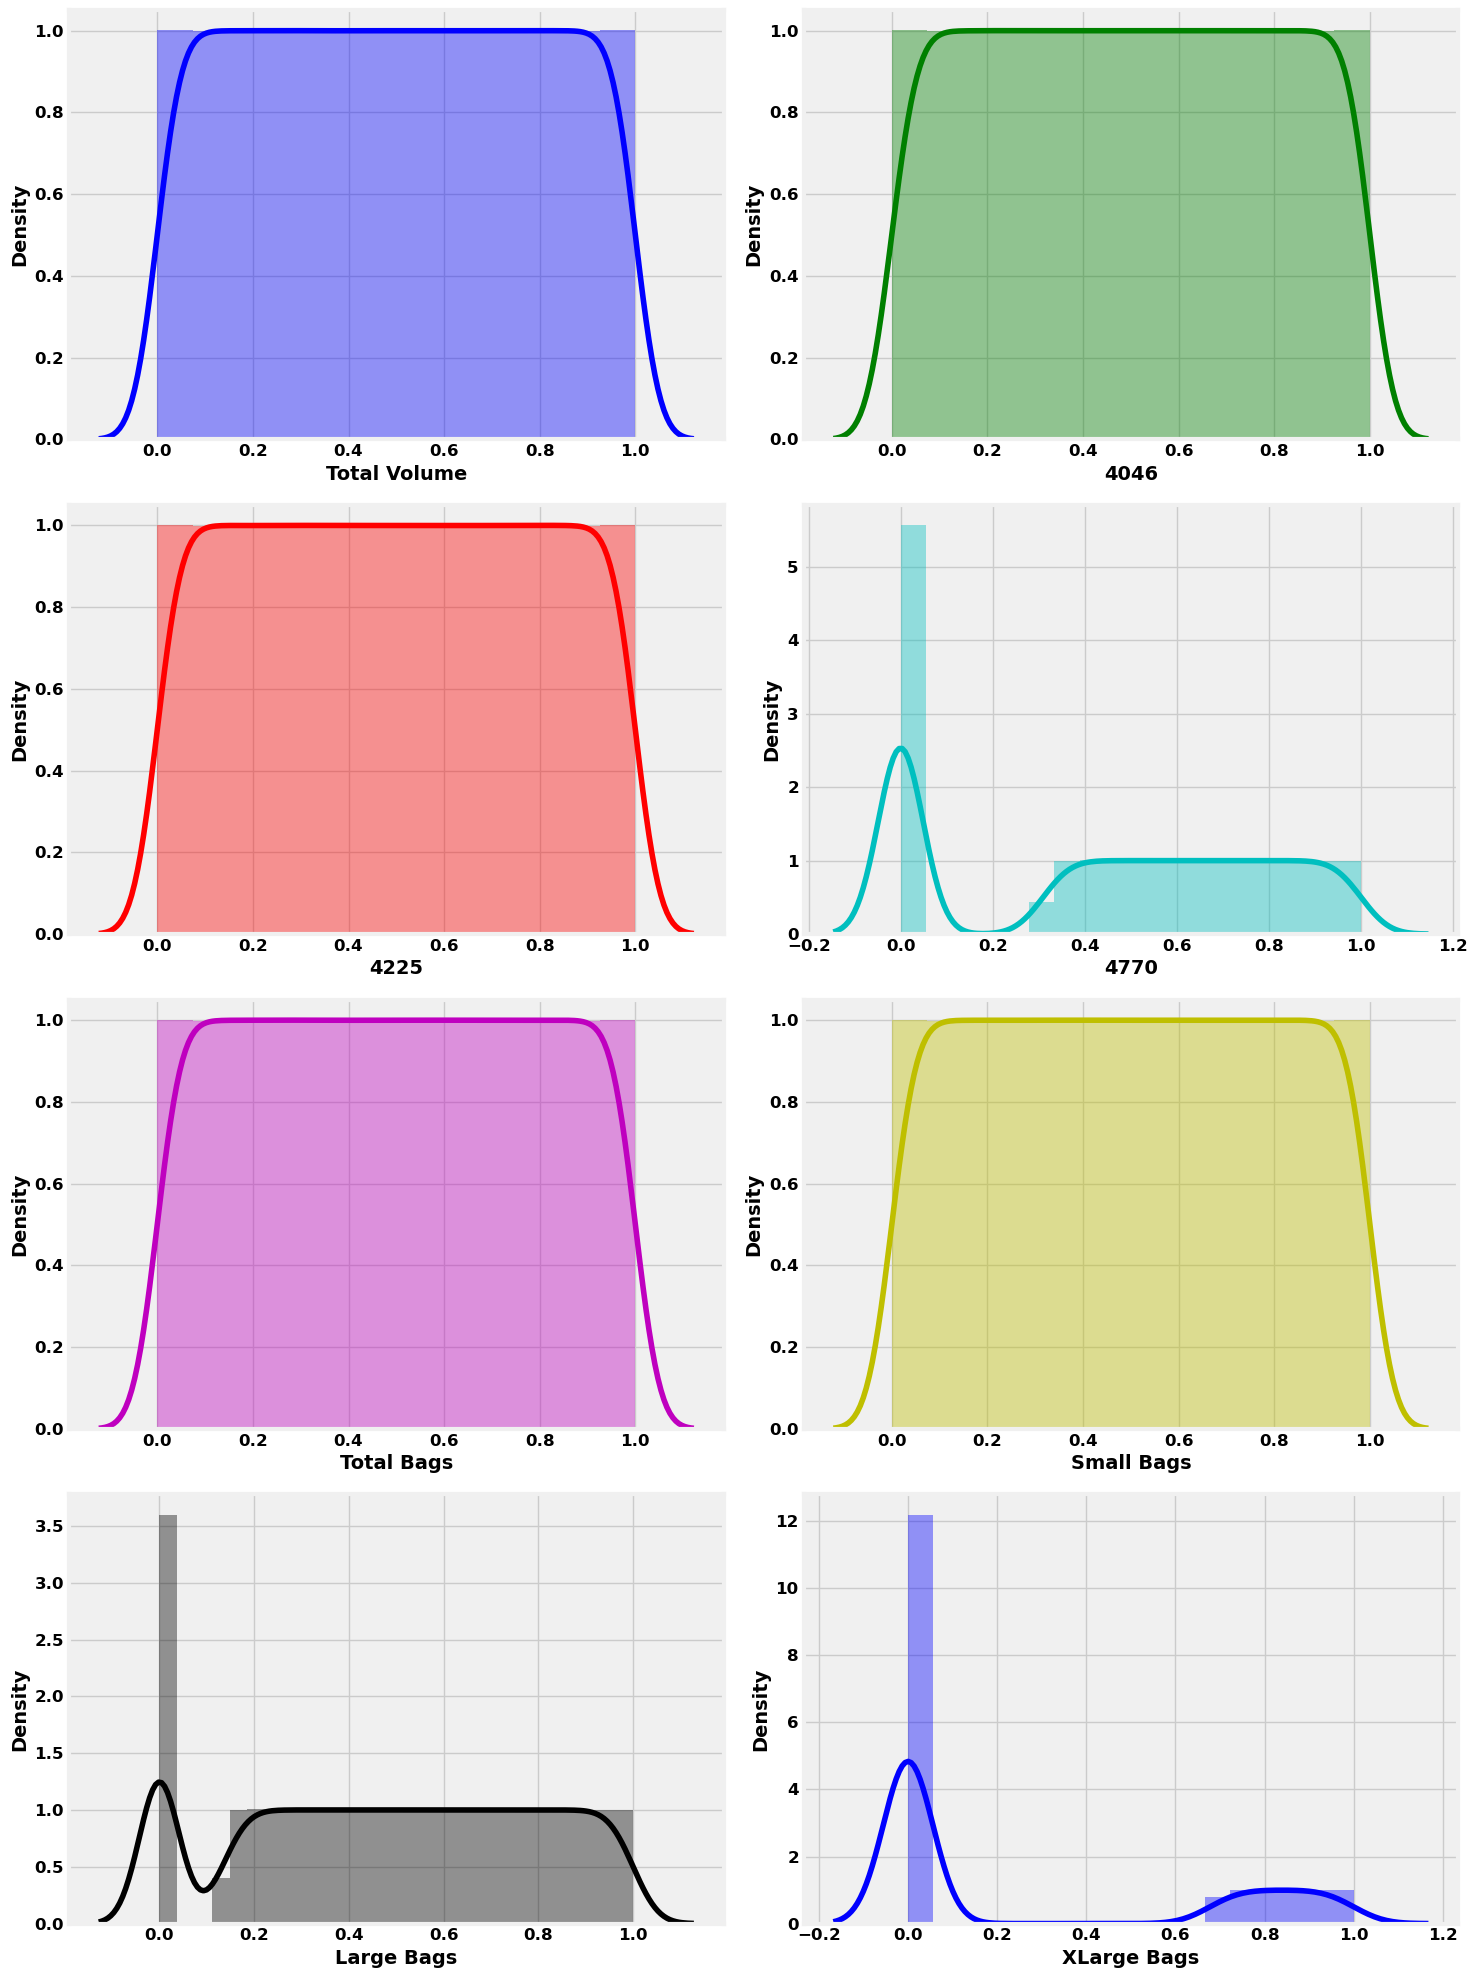

In [157]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(x_qtr[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **As the skewness is least using "Quantile transformer" for most of the features, I am using transformed x data from "Quantile transformer" for model building**   

### Grouping both transformed numerical and categorical data 

In [158]:
x_clas.shape

(17782, 8)

In [159]:
x_clas.tail(5) # x data including both numerical and categorical features

Total Volume     4046     4225    4770  Total Bags  Small Bags  \
18244      17074.83  2046.96  1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70  3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92  2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63  2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77  2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  
18244      431.85          0.0  
18245      324.80          0.0  
18246       42.31          0.0  
18247       50.00          0.0  
18248       26.01          0.0

In [160]:
new_x=x_clas.reset_index(drop=True)  # reset the index of x data

In [161]:
new_x.tail(5) # x data including both numerical and categorical features after resetting the index

Total Volume     4046     4225    4770  Total Bags  Small Bags  \
17777      17074.83  2046.96  1529.20    0.00    13498.67    13066.82   
17778      13888.04  1191.70  3431.50    0.00     9264.84     8940.04   
17779      13766.76  1191.92  2452.79  727.94     9394.11     9351.80   
17780      16205.22  1527.63  2981.04  727.01    10969.54    10919.54   
17781      17489.58  2894.77  2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  
17777      431.85          0.0  
17778      324.80          0.0  
17779       42.31          0.0  
17780       50.00          0.0  
17781       26.01          0.0

In [162]:
x_qtr.head(5)  # Transformed numerical data

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0      0.446625  0.276463  0.619635  0.415585    0.333480    0.376968   
1      0.430562  0.232845  0.582588  0.426682    0.346448    0.387914   
2      0.528580  0.248572  0.731712  0.484843    0.324195    0.368336   
3      0.471608  0.285625  0.668963  0.440172    0.274245    0.326321   
4      0.424675  0.265992  0.579444  0.443082    0.282456    0.332318   

   Large Bags  XLarge Bags  
0    0.243941          0.0  
1    0.245324          0.0  
2    0.247696          0.0  
3    0.258457          0.0  
4    0.279031          0.0

In [163]:
for i in x_qtr.columns:
    new_x[i]=x_qtr[i]

In [164]:
new_x.shape

(17782, 8)

In [165]:
new_x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

### Scaling data

In [166]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.184888 -0.773577  0.414420 -0.106212   -0.576804   -0.425918   
1     -0.240528 -0.924584  0.286098 -0.074043   -0.531886   -0.388011   
2      0.098999 -0.870138  0.802630  0.094567   -0.608968   -0.455810   
3     -0.098350 -0.741858  0.585279 -0.034935   -0.781989   -0.601311   
4     -0.260923 -0.809828  0.275207 -0.026500   -0.753545   -0.580544   

   Large Bags  XLarge Bags  
0   -0.817794     -0.68386  
1   -0.813221     -0.68386  
2   -0.805374     -0.68386  
3   -0.769770     -0.68386  
4   -0.701699     -0.68386

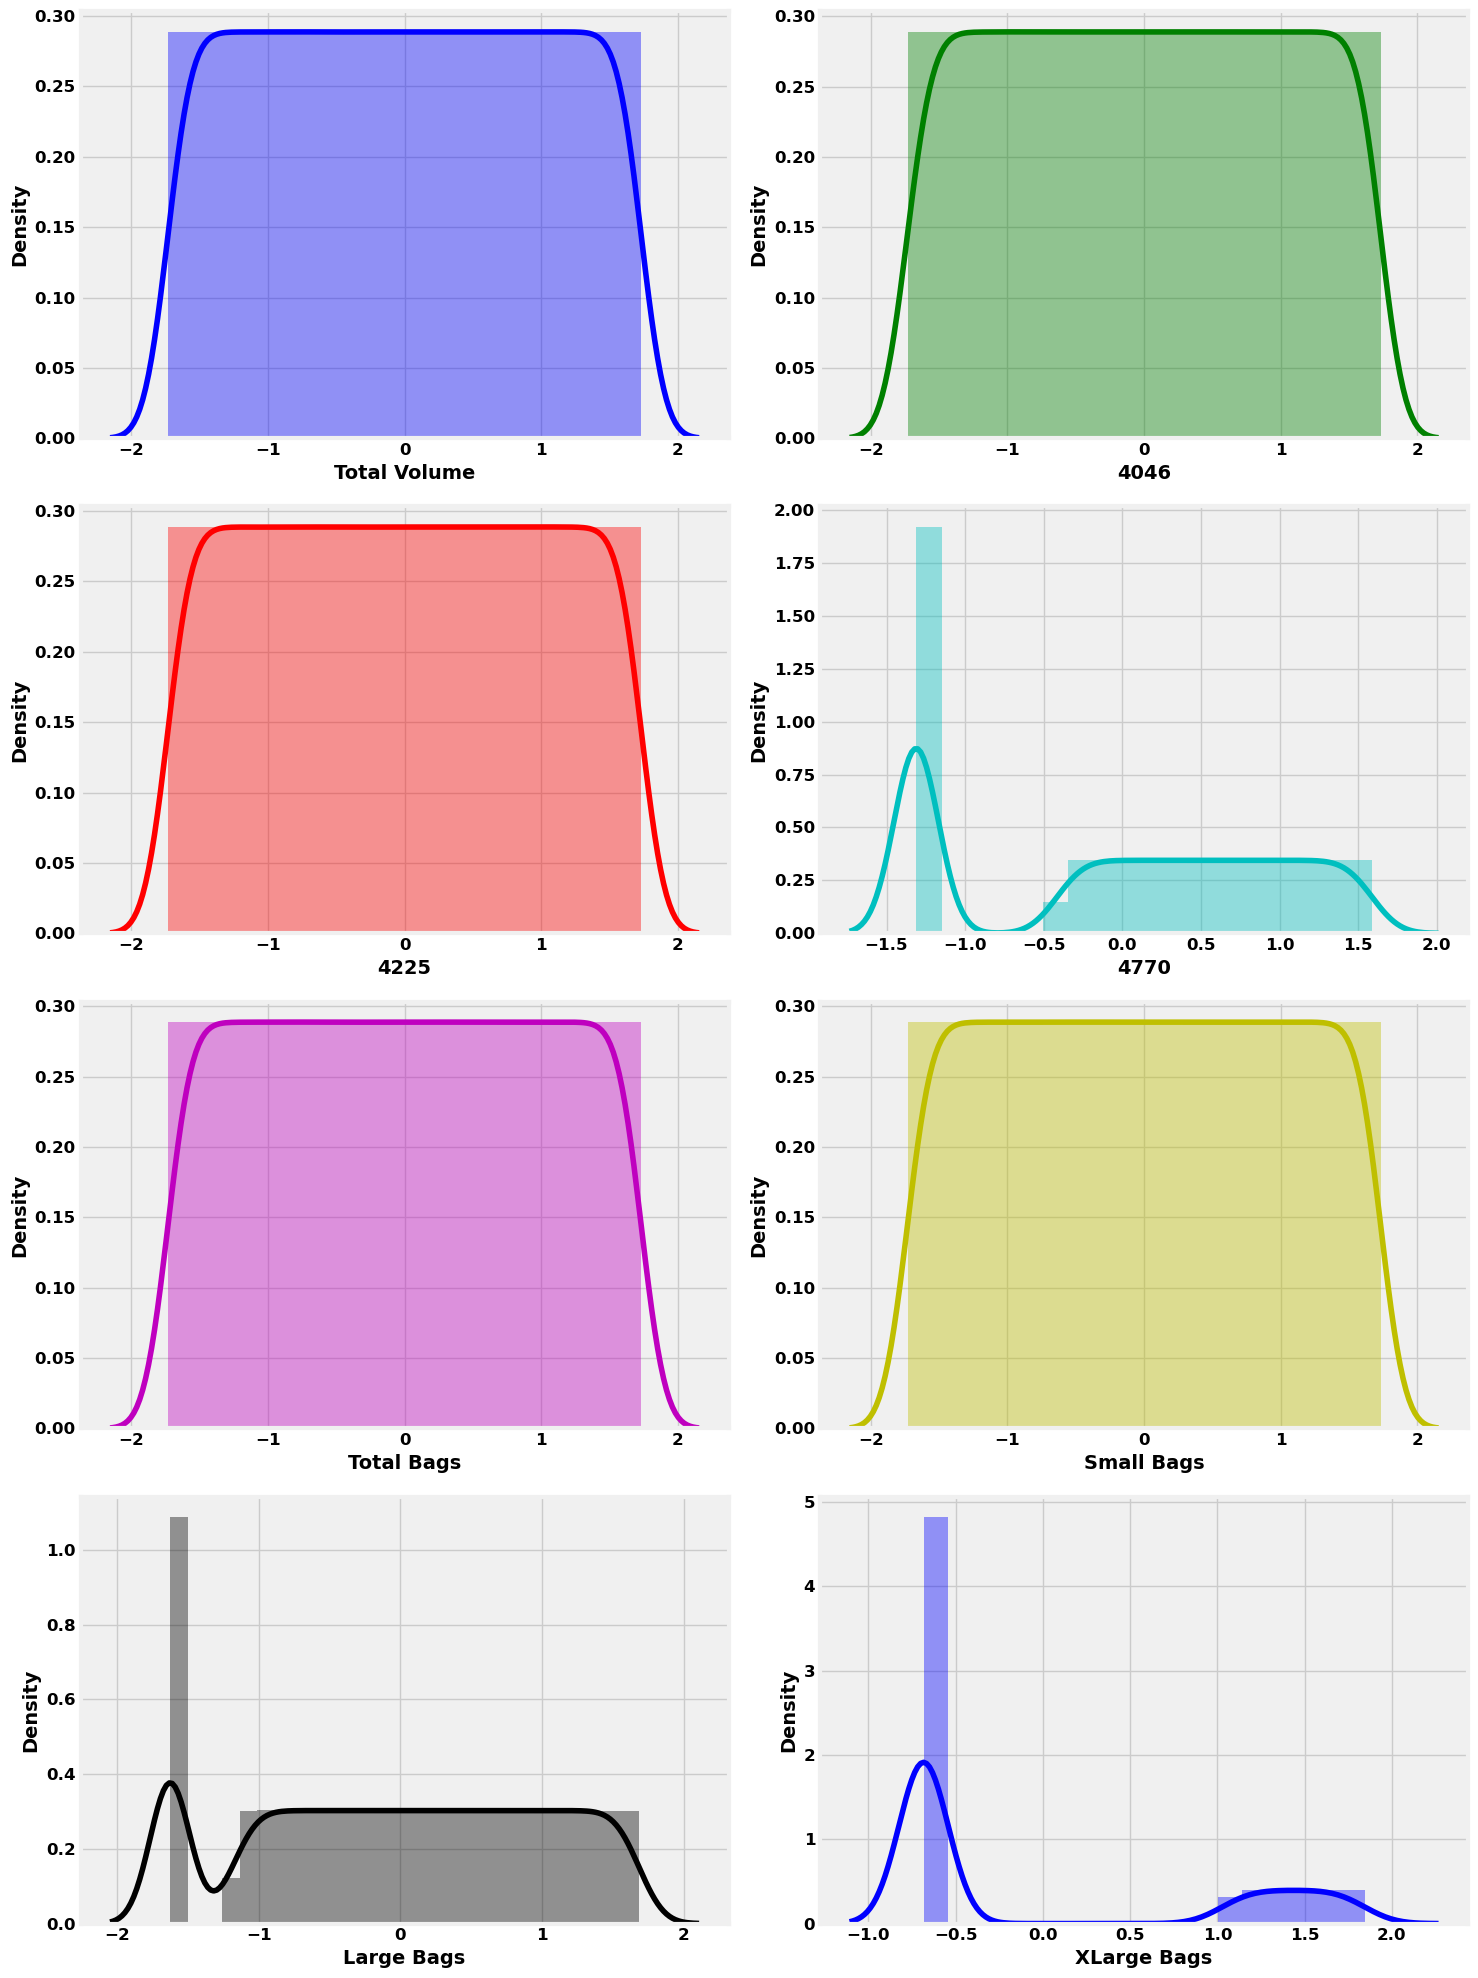

In [167]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_qtr:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Principal Component Analysis (PCA)

- **As the dataset has many X columns with multi-collinearity, I will use PCA technique to reduce the number of dimensions in a dataset while preserving the most important information in it**
- **Initially, I will calculate the number of components needed to explain the variance**
- **Based on that, I will choose no. of columns required be used in PCA**

In [168]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

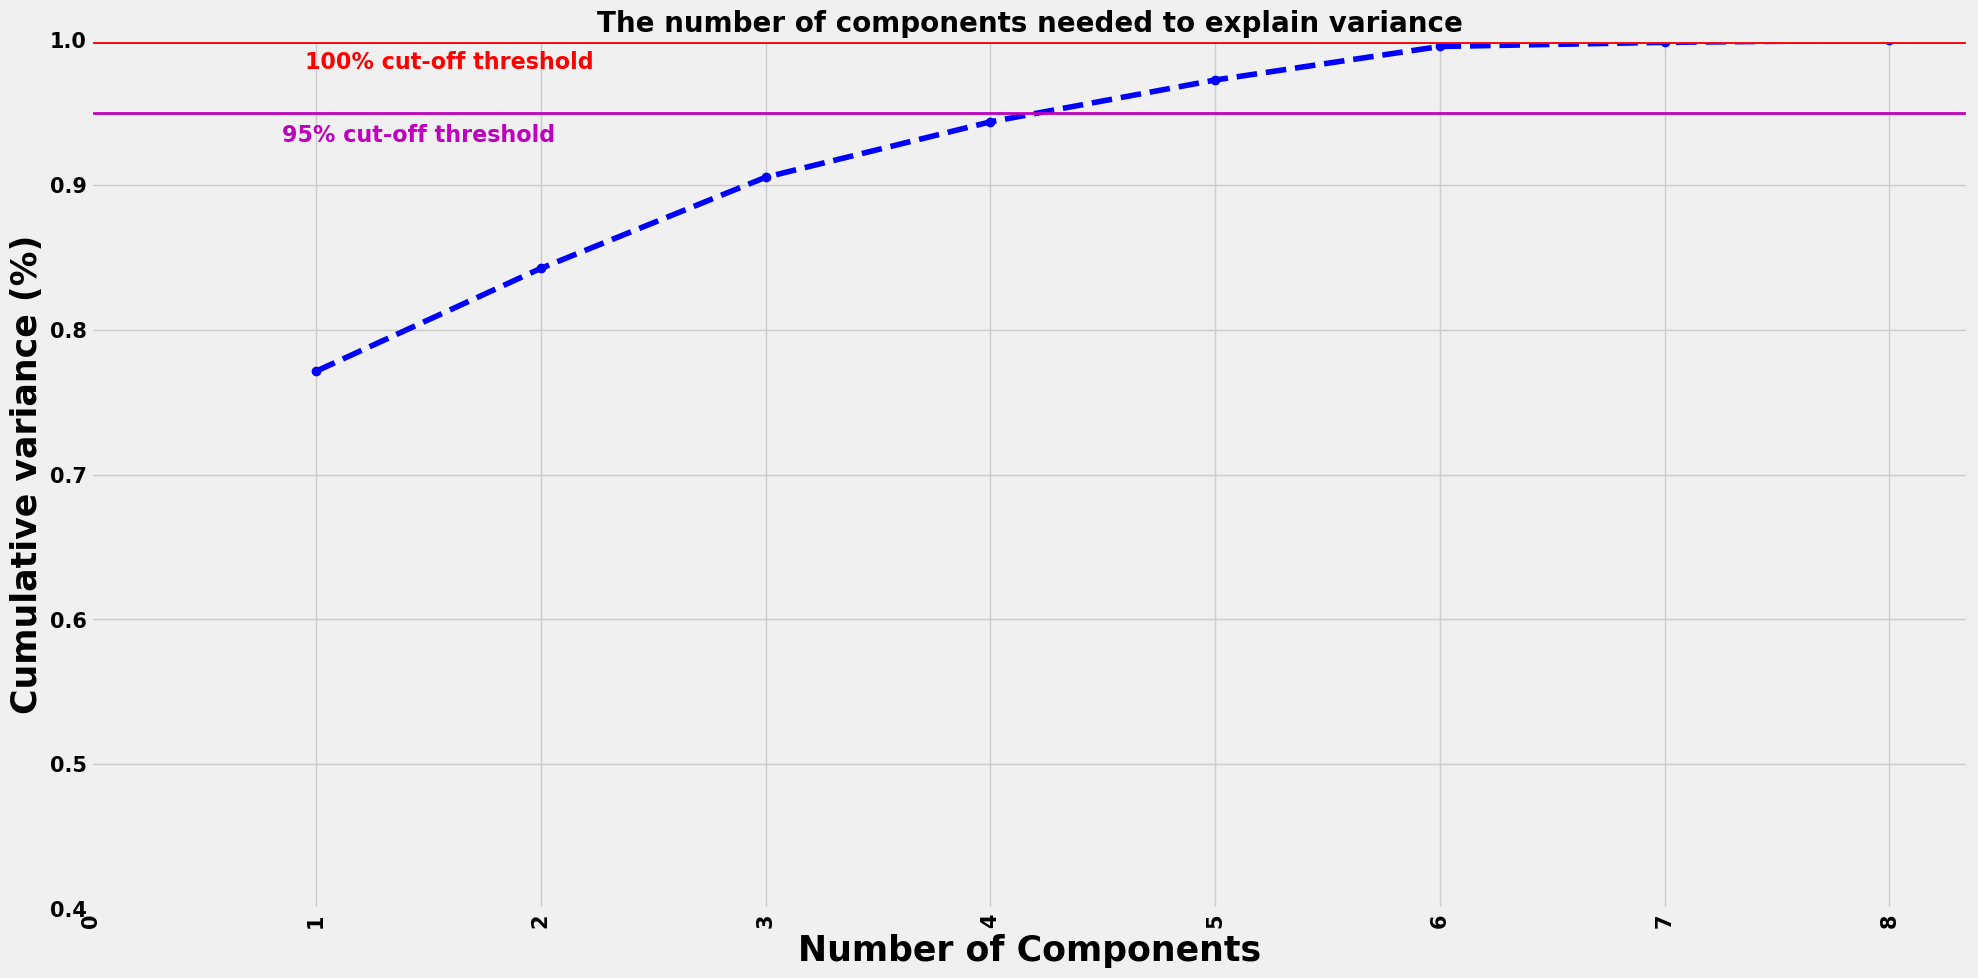

In [169]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, x.shape[1]+1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontsize=25,fontweight ='bold')
plt.xticks(np.arange(0, x.shape[1]+1, step=1)) 
plt.ylabel('Cumulative variance (%)',fontsize=25,fontweight ='bold')
plt.title('The number of components needed to explain variance',fontsize=20,fontweight ='bold')
plt.axhline(y=1, color='r', linestyle='-',linewidth = '5')
plt.text(0.95, 0.98, '100% cut-off threshold', color = 'red', fontsize=16,fontweight ='bold')
plt.axhline(y=0.95, color='m', linestyle='-',linewidth = '2')
plt.text(0.85, 0.93, '95% cut-off threshold', color = 'm', fontsize=16,fontweight ='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.grid(axis = 'x')
plt.grid(True)
plt.ylim(0.4,1.0)
plt.tight_layout()
plt.show()

#### Observations:
- **As per the graph, we can see that 4 principal components attribute for 95% of variation in the data. Hence I will pick 4 components for our prediction**
- **I will use 4 features as no. of components in PCA to reduce the dimensions**

In [170]:
# Applying PCA transformation on X data to reduce the no. of columns
pca=PCA(n_components=4)
x_clas=pca.fit_transform(x)
x_clas=pd.DataFrame(x_clas)
x_clas.head()

0         1         2         3
0 -1.055171  0.178111  0.733376 -0.490548
1 -1.134822  0.181813  0.686031 -0.496797
2 -0.785103  0.211223  0.863764 -0.758225
3 -1.052589  0.182781  0.716774 -0.705078
4 -1.213922  0.139546  0.577215 -0.662529

#### Observations:
- **After applying PCA transformation, X dataset is reduced to 4 dimensions. This X data can be used for model training**

### Checking Multicollinearity again after PCA transformation

In [171]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_clas[list(x_clas.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF  Column
0  1.0       0
1  1.0       1
2  1.0       2
3  1.0       3

#### Observations:
- **No multicollinearity is noticed after PCA transformation as VIF < 5 for all features**

In [172]:
y_clas.shape

(17782,)

In [173]:
x_clas.shape

(17782, 4)

# Model Building - REGRESSION

- **Starting with "LinearRegression" to build the model**

In [174]:
x=x_reg
y=y_reg

In [175]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # Defining instance for linearregression

# Finding the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Finding the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


Random State  Training R2 Score  Testing R2 Score  Difference in R2 Score
22           729          43.928845         43.930021                0.001176
27           874          43.931972         43.933871                0.001899
13           436          43.931001         43.929073                0.001928
21           720          43.932794         43.936733                0.003939
15           474          43.930883         43.935792                0.004909
26           872          43.922683         43.928366                0.005683
19           672          43.927992         43.935317                0.007325
20           694          43.925761         43.949341                0.023580
25           793          43.939892         43.910545                0.029347
28           876          43.935639         43.898977                0.036661
24           771          43.942559         43.900848                0.041711
4            197          43.941876         43.897587                0.044289
11           407          43.933436         43.886874                0.046562
9            381          43.939983         43.890080                0.049904
16           608          43.943169         43.890705                0.052464
14           447          43.938937         43.885800                0.053137
7            315          43.938043         43.884157                0.053886
23           760          43.931211         43.875336                0.055875
29           976          43.943233         43.887350                0.055883
2             79          43.943232         43.884704                0.058528
8            330          43.937913         43.872599                0.065314
18           664          43.947134         43.877946                0.069188
5            209          43.948816         43.878376                0.070439
1             34          43.948866         43.877840                0.071026
0             11          43.944673         43.873375                0.071298
6            216          43.949705         43.864584                0.085121
3            109          43.937422         43.851951                0.085471
17           644          43.948986         43.858011                0.090975
10           382          43.949168         43.853978                0.095190
12           418          43.948521         43.850815                0.097707

#### Observations:
- **From the above table, as multple random states give same training and testing accuarcy scores, taking one of this  from the below code**

In [176]:
# Getting the best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BRS=np.array(RSN)[0]
BRS

729

#### Observation:
- **Considering random state=729 for the model building**

In [177]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [178]:
# Training the model and checking  metrics with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.4393002114423097
Mean Absolute Error(MAE) :  0.23702459536385287
Mean Squared Error(MSE) :  0.09343471767511856
Root Mean Squared Error(RMSE) :  0.3056709303730379


## Cross Validation for Linear Regression

In [179]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the delta is small between cross validation score and model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation table


No of Folds  Cross Validation R2 Score  Model R2 Score  \
8           10                  -7.135199       43.930021   
7            9                  -7.699173       43.930021   
6            8                 -12.371229       43.930021   
3            5                 -13.334473       43.930021   
5            7                 -13.823311       43.930021   
4            6                 -17.037158       43.930021   
2            4                 -25.788163       43.930021   
1            3                 -31.213623       43.930021   
0            2                -373.552085       43.930021   

   Difference in R2 Score  
8                0.510652  
7                0.516292  
6                0.563013  
3                0.572645  
5                0.577533  
4                0.609672  
2                0.697182  
1                0.751436  
0                4.174821

#### Observations: 
- **Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=10 from the above table**

In [180]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
BCV

10

In [181]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: -7.1351992006418135 
The model r2 score is: 43.93002114423097
Difference is: 0.5106522034487279


## Other Regression Algorithms

In [182]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# Defining the list with all Algorithms

models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # Appending "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         # Appending "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          # Appending "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))# Appending "RMSE" to the list 
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("Table with performance of the models")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["Difference in R2 Score"],ascending=True)  # sorting the score table using the difference

Table with performance of the models


Model  Model R2 Score  Cross Validation R2 Score  \
3                SGDRegressor()       43.897042                  -7.059802   
6                       Ridge()       43.929716                  -7.134478   
0            LinearRegression()       43.930021                  -7.135199   
4                         SVR()       59.872725                   8.379818   
10  GradientBoostingRegressor()       58.281810                   5.437869   
11          AdaBoostRegressor()       45.585569                 -20.822352   
12               XGBRegressor()       68.535418                  -0.001194   
9         ExtraTreesRegressor()       79.309490                   2.351439   
8       RandomForestRegressor()       75.746482                  -3.159049   
2         KNeighborsRegressor()       72.220649                 -19.280242   
7                  ElasticNet()       10.088520                 -97.247642   
5                       Lasso()       -0.033015                -122.236288   
1       DecisionTreeRegressor()       54.978066                 -68.350656   

    Difference in R2 Score       MAE       MSE      RMSE  
3                 0.509568  0.237711  0.093490  0.305761  
6                 0.510642  0.237026  0.093435  0.305672  
0                 0.510652  0.237025  0.093435  0.305671  
4                 0.514929  0.190705  0.066868  0.258588  
10                0.528439  0.201995  0.069519  0.263665  
11                0.664079  0.240522  0.090676  0.301124  
12                0.685366  0.169875  0.052432  0.228981  
9                 0.769581  0.132007  0.034479  0.185684  
8                 0.789055  0.144144  0.040416  0.201037  
2                 0.915009  0.152150  0.046291  0.215154  
7                 1.073362  0.310322  0.149828  0.387076  
5                 1.222033  0.329841  0.166694  0.408282  
1                 1.233287  0.182778  0.075024  0.273906

#### Observations: 
- **Cross-validation score is not good in any of the models**
- **Based on the r2 score and RMSE values for multiple models, I have considered "ExtraTreesRegressor()" is the best model as the ExtraTreesRegressor gave max R2 score and min RMSE value among all the models** 
- **Hyper parameter tuning will be pefromed for "ExtraTreesRegressor()"**

## Hyper Parameter Tuning

In [183]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesRegressor

# Number of trees in Extra Tree
n_estimators = [50,200,500]
# Scoring criterion
criterion=["squared_error", "absolute_error", "friedman_mse"]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,4,7]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [184]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [185]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=ExtraTreesRegressor(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)

print("Model : ExtraTreesRegressor")
print("R2 Score : ",r2_score(y_test,pred))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred)))

Model : ExtraTreesRegressor
R2 Score :  0.4975545723299335
Mean Absolute Error(MAE) :  0.2246323428495148
Mean Squared Error(MSE) :  0.08372724163543466
Root Mean Squared Error(RMSE) :  0.28935659943300873


In [186]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV R2 score is:",score*100,"\nThe model R2 score is:",r2_score(y_test,pred)*100)
print("Difference is:",r2_score(y_test,pred)-score)

The CV R2 score is: -4.186172552417043 
The model R2 score is: 49.75545723299335
Difference is: 0.5394162978541039


#### Observations for Hyper Parameter Tuning: 
- **Hyper Parameter Tuned model didn't give good R2 score compared to the model with default parameters for ExtraTreesRegressor, hence considered the final model with default parameters for saving**
- **I couldn't try with updated hyper parameters or with higher range as it took nearly 4 to 5 hrs to run the Hyper Parameter Tuning with this large dataset, hence taken the final decision based on the available results with default parameters and with one set of hyper parameter tuned model, however this regression model score can be improved if I have large computational capability by exploring the expanded range of hyper parameters**
- **There is a improvement required in this dataset to improve the performance of the model**

## Save Final Regression Model

In [187]:
import pickle
filename='Avacado-Price-Prediction.pkl'
pickle.dump(models[8][1], open(filename,'wb'))  # saving the Hyper Parameter Tuned ExtraTreeRegressor model

# Model Building - CLASSIFICATION

- **Here I didn't balance the dataset as the target variable "region" has many classes. Instead of using "accuracy_score", I will use "F1_score" as main metrics to decide the best model**
- **For imbalanced datasets, F1 score is generally a better metric than accuracy score to evaluate the performance of a machine learning model. The reason for this is that accuracy score can be misleading in the presence of class imbalance, as a model that simply predicts the majority class for every sample can achieve a high accuracy score, even if it performs poorly on the minority class(es). F1 score, on the other hand, takes into account both precision and recall, and provides a better measure of overall performance that is not affected by class imbalance. By calculating the F1 score for each class separately and then taking the weighted average, where the weights are the number of samples in each class, we can get a better sense of how well the model is performing on each class, including the minority class(es).**
- **I didn'try Logistic Regression first as the target variable "region" has more than 2 classes, hence starting with DecisionTreeClassifier to findout the best random state**

In [188]:
x=x_clas
y=y_clas

In [189]:
# Defining the required libraries
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve

dtc=DecisionTreeClassifier()  # Defining instance for DecisionTreeClassifier

# Finding the best random state value where training f1_score = testing f1_score

Random_State=[]
Training_f1_score=[]
Testing_f1_score=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dtc.fit(x_train,y_train)
    pred_test=dtc.predict(x_test)
    pred_train=dtc.predict(x_train)

    Random_State.append(i)
    Training_f1_score.append(f1_score(y_train,pred_train, average='weighted')*100)
    Testing_f1_score.append(f1_score(y_test,pred_test, average='weighted')*100)
    Difference.append(abs((f1_score(y_test,pred_test, average='weighted')*100)-(f1_score(y_train,pred_train, average='weighted')*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training f1_score":Training_f1_score,"Testing f1_score":Testing_f1_score,"Difference":Difference})
print("Table of f1_score for top 10 random states where the delta b/w train and test is small")
RS_table.sort_values(by=["Difference"],ascending=True)[:10]

Table of f1_score for top 10 random states where the delta b/w train and test is small


Random State  Training f1_score  Testing f1_score  Difference
160           160              100.0         52.403900   47.596100
946           946              100.0         51.768494   48.231506
653           653              100.0         51.660688   48.339312
758           758              100.0         51.608526   48.391474
611           611              100.0         51.483776   48.516224
262           262              100.0         51.428298   48.571702
417           417              100.0         51.414639   48.585361
221           221              100.0         51.358387   48.641613
234           234              100.0         51.343547   48.656453
869           869              100.0         51.206468   48.793532

#### Observations: 
- **From the above table, as multple random states give same training and testing accuarcy scores, taking one of this  from the below code**

In [190]:
# Getting the best random state where training f1 score equal to testing f1 score
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

160

#### Observations: 
- **Considering random state=160 for the model building**

In [191]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [192]:
# Training the model and checking  f1 score with the fixed random state
dtc.fit(x_train,y_train)
pred_test=dtc.predict(x_test)
print(f1_score(y_test,pred_test, average='weighted'))

0.5166842794852091


In [193]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_test))

0.5161653078436885


In [194]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.58      0.60      0.59        67
           1       0.48      0.46      0.47        68
           2       0.51      0.70      0.59        54
           3       0.53      0.52      0.53        61
           4       0.61      0.61      0.61        74
           5       0.40      0.34      0.37        70
           6       0.73      0.67      0.70        57
           7       0.60      0.49      0.54        69
           8       0.72      0.78      0.75        68
           9       0.55      0.66      0.60        64
          10       0.33      0.34      0.33        68
          11       0.79      0.64      0.71        77
          12       0.53      0.59      0.56        71
          13       0.56      0.45      0.50        76
          14       0.44      0.59      0.51        64
          15       0.69      0.80      0.74        55
          16       0.35      0.42      0.38        48
          17       0.45    

In [195]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[40  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  1 ... 23  0  1]
 [ 0  1  0 ...  0 36  0]
 [ 0  5  3 ...  5  0 23]]


### Cross Validation for Decision Tree Classifier

In [196]:
from sklearn.metrics import make_scorer

pred_dtc=dtc.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=f1_score(y_test,pred_test, average='weighted')

# Finding the optimized folds from Decision Tree Classification 

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    weighted_f1 = make_scorer(f1_score, average='weighted')
    lsscore=cross_val_score(dtc,x,y,cv=j, scoring=weighted_f1)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


No of Folds  Cross Validation Score  Model Score  Difference
8           10               34.136522    51.668428    0.175319
7            9               33.609305    51.668428    0.180591
6            8               32.902845    51.668428    0.187656
5            7               31.645249    51.668428    0.200232
4            6               28.281631    51.668428    0.233868
3            5               27.667115    51.668428    0.240013
2            4               26.100354    51.668428    0.255681
1            3               21.439899    51.668428    0.302285
0            2                1.078382    51.668428    0.505900

#### Observations: 
- **Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=10 from the above table**

In [197]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

10

In [198]:
# Using best CV value and checking the cross validation score again to compare with model score
weighted_f1 = make_scorer(f1_score, average='weighted')
lsscore_selected=cross_val_score(dtc,x,y,cv=BCV, scoring=weighted_f1).mean()
print("The CV f1 score is:",lsscore_selected*100,"\nThe model f1 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)
acs=accuracy_score(y_test,pred_test)
print("The Accuracy Score is:",acs*100)

The CV f1 score is: 34.05046349438733 
The model f1 score is: 51.668427948520915
Difference is: 0.17617964454133583
The Accuracy Score is: 51.616530784368855


## Other Classification Algorithms

In [199]:
# from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
# from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier

# Defining the list with all Algorithms

models=[('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]

# Defining empty lists
Model=[dtc]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Accu_Score=[acs*100]
Difference=[abs(lss-lsscore_selected)]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(f1_score(y_test,pred_test, average='weighted')*100)  # Appending "f1 score" to the list
    Accu_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("F1 Score:")
    print(f1_score(y_test,pred_test, average='weighted')*100)               # Printing "f1_score"
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    weighted_f1 = make_scorer(f1_score, average='weighted')
    score=cross_val_score(model[1],x,y,cv=BCV, scoring=weighted_f1).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(f1_score(y_test,pred_test, average='weighted')-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Accuracy Score':Accu_Score,'F1 Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: KNeighborsClassifier()
F1 Score:
58.33170504344284
Accuracy Score:
58.61681192015744
Confusion Matrix:
[[47  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 1  0 35 ...  0  0  1]
 ...
 [ 0  0  1 ... 26  0  1]
 [ 0  1  0 ...  0 43  0]
 [ 0  4  2 ...  4  0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.70      0.58        67
           1       0.38      0.56      0.46        68
           2       0.53      0.65      0.58        54
           3       0.55      0.67      0.61        61
           4       0.65      0.68      0.66        74
           5       0.38      0.34      0.36        70
           6       0.86      0.77      0.81        57
           7       0.62      0.77      0.69        69
           8       0.73      0.76      0.75        68
           9       0.58      0.66      0.61        64
          10       0.39      0.47      0.42        68
          11       0.82      0.81      0.81        77
        

Model: RandomForestClassifier()
F1 Score:
60.5796408878561
Accuracy Score:
60.69721675569299
Confusion Matrix:
[[48  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  1]
 [ 0  0  0 ...  0 43  0]
 [ 0  3  3 ...  5  0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.72      0.63        67
           1       0.55      0.59      0.57        68
           2       0.66      0.72      0.69        54
           3       0.68      0.64      0.66        61
           4       0.67      0.64      0.65        74
           5       0.49      0.40      0.44        70
           6       0.87      0.70      0.78        57
           7       0.64      0.59      0.62        69
           8       0.81      0.90      0.85        68
           9       0.68      0.73      0.71        64
          10       0.45      0.43      0.44        68
          11       0.86      0.77      0.81        77
       

Model: AdaBoostClassifier()
F1 Score:
2.1468968839378566
Accuracy Score:
6.156873770030924
Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 11  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.00      0.00      0.00        68
           2       0.00      0.00      0.00        54
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00        74
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00        57
           7       0.00      0.00      0.00        69
           8       0.03      0.01      0.02        68
           9       0.00      0.00      0.00        64
          10       0.05      0.15      0.07        68
          11       0.00      0.00      0.00        77
         

Model  Accuracy Score   F1 Score  \
7          AdaBoostClassifier()        6.156874   2.146897   
2               SGDClassifier()        5.229126   3.072216   
3                         SVC()       40.371099  38.698800   
6  GradientBoostingClassifier()       47.455721  47.103080   
0      DecisionTreeClassifier()       51.616531  51.668428   
8               XGBClassifier()       56.114703  56.111295   
1        KNeighborsClassifier()       58.616812  58.331705   
5        ExtraTreesClassifier()       60.556649  60.513179   
4      RandomForestClassifier()       60.697217  60.579641   

   Cross Validation Score  Difference  
7                2.300927    0.001540  
2                2.235832    0.008364  
3               29.171478    0.095273  
6               30.899043    0.162040  
0               34.050463    0.176180  
8               37.892933    0.182184  
1               39.163583    0.191681  
5               39.874658    0.206385  
4               39.425678    0.211540

#### Observations: 
- **Cross-validation score is not good in any of the models**
- **Based on the F1 score, Accuracy score and cross validation score values for multiple models, I have considered "ExtraTreesClassifier()" is the best model as the ExtraTreesClassifier gave max F1 score, max accuracy score and max cross validation score among all the models. RandomForestClassifier is also performing equally well with ExtraTreesClassifier** 
- **Hyper parameter tuning will be pefromed for "ExtraTreesClassifier()"**

## Hyper Parameter Tuning

In [200]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesClassifier

# Number of trees in Extra Tree
n_estimators = [50,100,200]
# Scoring criterion
criterion=["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,4,7]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [201]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [202]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=ExtraTreesClassifier(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
weighted_f1 = make_scorer(f1_score, average='weighted')
print(f1_score(y_test,pred, average='weighted')*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

44.222659544560024
41.9922343855317
[[44  0  1 ...  0  0  0]
 [ 0 25  0 ...  0  1  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  1  0 ...  1 39  0]
 [ 0  0  6 ... 12  0  8]]
              precision    recall  f1-score   support

           0       0.32      0.66      0.43        67
           1       0.37      0.37      0.37        68
           2       0.38      0.70      0.50        54
           3       0.31      0.51      0.38        61
           4       0.48      0.39      0.43        74
           5       0.39      0.31      0.35        70
           6       0.72      0.72      0.72        57
           7       0.45      0.58      0.51        69
           8       0.48      0.74      0.58        68
           9       0.36      0.75      0.49        64
          10       0.43      0.09      0.15        68
          11       0.60      0.65      0.63        77
          12       0.62      0.44      0.51        71
          13       0.41      0.33      0.36        

In [203]:
weighted_f1 = make_scorer(f1_score, average='weighted')
score=cross_val_score(ht_model,x,y,cv=BCV, scoring=weighted_f1).mean()
print("The CV score is:",score*100,"\nThe f1 score is:",f1_score(y_test,pred, average='weighted')*100)
print("Difference is:",f1_score(y_test,pred, average='weighted')-score)

The CV score is: 28.703603379993183 
The f1 score is: 41.9922343855317
Difference is: 0.1328863100553852


#### Observations for Hyper Parameter Tuning: 
- **Hyper Parameter Tuned model didn't give good F1 score compared to the model with default parameters for ExtraTreesClassifier, hence considered the final model with default parameters for saving**
- **I couldn't try with updated hyper parameters or with higher range as it took nearly 4 to 5 hrs to run the Hyper Parameter Tuning with this large dataset, hence taken the final decision based on the available results with default parameters and with one set of hyper parameter tuned model, however this classification model score can be improved if I have large computational capability by exploring the expanded range of hyper parameters**
- **There is a improvement required in this dataset to improve the performance of the model**

## Model Saving - Classification

In [206]:
import pickle
filename='avacado-region-model.pkl'
pickle.dump(models[4][1], open(filename,'wb')) # saving the ExtraTreesClassifier model

## Conclusion - Prediction from Classification Model

In [208]:
loaded_model=pickle.load(open('avacado-region-model.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Score:",round(result*100,1))

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T.head(10)

Model Score: 60.6


Predicted  Original
0         20        29
1         34         0
2         48        19
3         38        38
4         35        35
5         23        23
6         16        10
7         21        21
8         28        28
9         31        49

## Overall Summary

- **After getting the insight of avocados dataset, we came to various conclusions that how much avocados has been sold in different regions every year**

- **Applied multiple techniques to visulalize the entire dataset and got more indepth information about the avocados**

- **This dataset was used to predict 2 datas: One was to predict the average price of avocados and the other was to predict the      city or region of the avocados sold**

- **Forecasted the yearly, monthly and day basis sales of avocados in different regions, and we had also observed that how the columns are correlated with each other using heatmap**

- **I completed EDA process in the dataset to analyze the data and also recorded the observations after each process** 

### Regression:

- **Applied various algorithms and saved the best model on the basis of R2 score and RMSE score for regression model**

- **Applied various regression algorithms to predict the Average price of Avocados, and found that ExtraTree Regressor is working well, on the basis of r2_score and less RMSE score**

- **Eventhough I applied techniques like Hyperparameter Tuning, Ensemble techniques and Regularization techniques, I could not     increase the score as there was insufficient and bad data in the dataset**

- **Selected ExtraTree Regressor as the final model because the RMSE score was very less and the R2 score was the highest among all.**

- **The model was considered to be underfit during Regression analysis as the difference between r2_score and cross validation     score was high in all the techniques and because of this we can conclude that more data is required for achieving good   scores as some of the cross validation scores were negative, which is bad. This dataset can be improved for Regression         analysis by adding more data, using less outliers, giving more accurate information to the target variable, having less         skewness, etc.**

### Classification:

- **Applied classification algorithms to predict the city or region and found that ExtraTreeClassifier algorithm was working    well as it obtained maximum F1 score, maximum accuracy score and maximum cross validation score compared to other algorithms** 

- **I tried to increase the accuracy by finding the best parameters during Hyperparameter Tuning technique but didn't notice any improvement**

- **I can conclude the dataset must be improved by adding more good data with lessskewness, less missing values, less number of errors in the data and with less number of outliers to get better predictions on regression and classification**